# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
pip install catboost

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

# Importar train data

In [416]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
df_entrenar = pd.read_csv("/content/drive/MyDrive/Machine Learning/telecom_churn_TRAINTEST.csv")
df_predecir = pd.read_csv("/content/drive/MyDrive/Machine Learning/telecom_churn_PREDICT.csv")

# EDA: Analisis Exploratorio

In [ ]:
df_entrenar.info()
#Vemos que en los datos para entrenar hay 100 columnas y 90000 filas. La gran mayoría de columnas tipo float o int.
#Pero hay bastantes columnas tipo object que se tendrán que cambiar después.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_predecir.info()
#Vemos que en los datos para entrenar hay 99 columnas (falta la target "churn") y 10000 filas. La gran mayoría de columnas tipo float o int.
#Pero hay bastantes columnas tipo object que se tendrán que cambiar después.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null  float64

In [ ]:
#Ahora vamos a comprobar la cantidad de nulos que hay por columna en los dos dataframes.

In [ ]:
df_entrenar.isnull().sum()

rev             134
mou             134
totmrc          134
da              134
ovrmou          134
               ... 
kid11_15       1451
kid16_17       1451
creditcd       1451
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [ ]:
df_predecir.isnull().sum()

rev            223
mou            223
totmrc         223
da             223
ovrmou         223
              ... 
kid11_15       281
kid16_17       281
creditcd       281
eqpdays          0
Customer_ID      0
Length: 99, dtype: int64

In [ ]:
#Hemos visto que en los dos dataframe existen muchas columnas con nulos. Más adelante se tendran que eliminar, modificar o rellenar.

## Distribución del target

array([[<Axes: title={'center': 'churn'}>]], dtype=object)

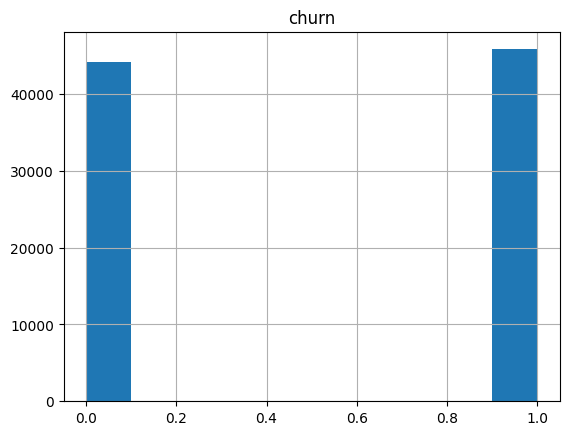

In [ ]:
df_entrenar.hist("churn")

## Analisis Univariable

* Distribucion de cada variable

###Analisis Univariable df_entrenar

In [ ]:
# Vamos a visualizar cada columna con sus variables para ver si hay datos "extraños" o outliers que puedan afectar más adelante a nuestro modelo.

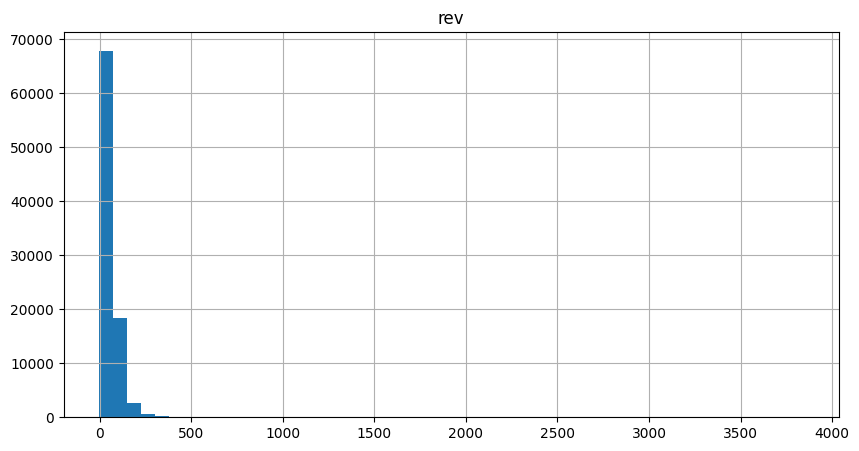

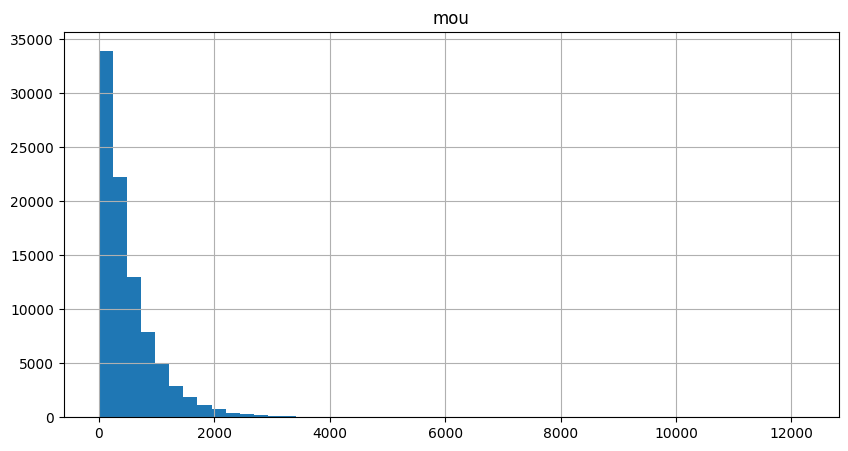

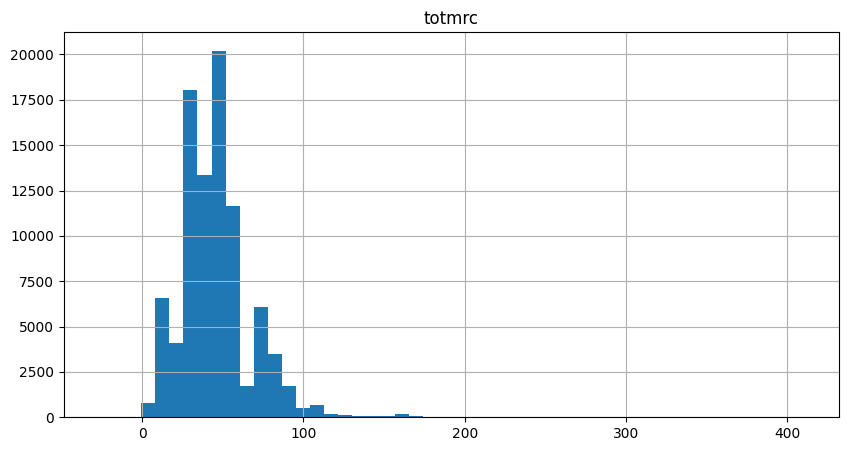

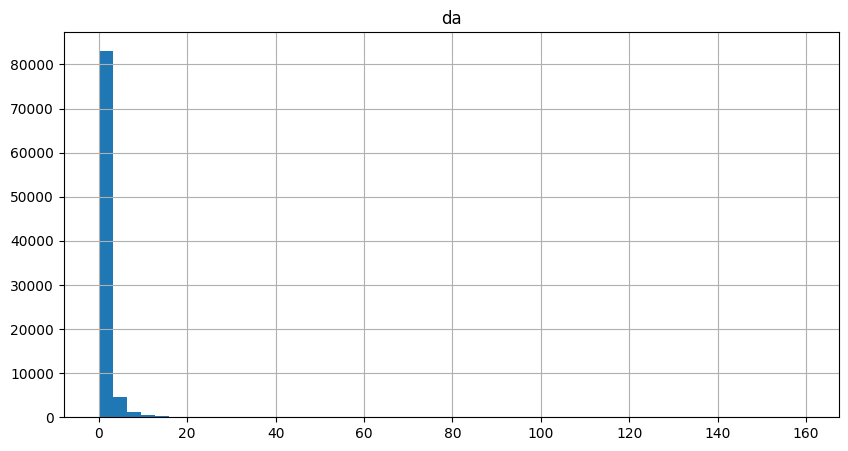

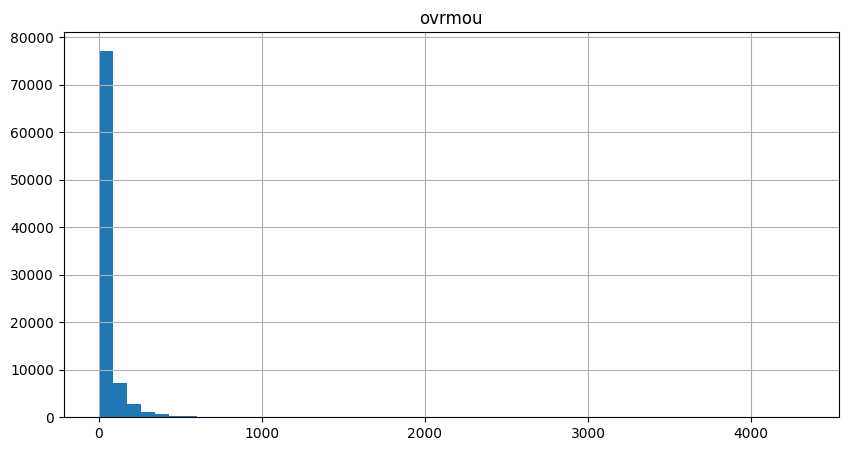

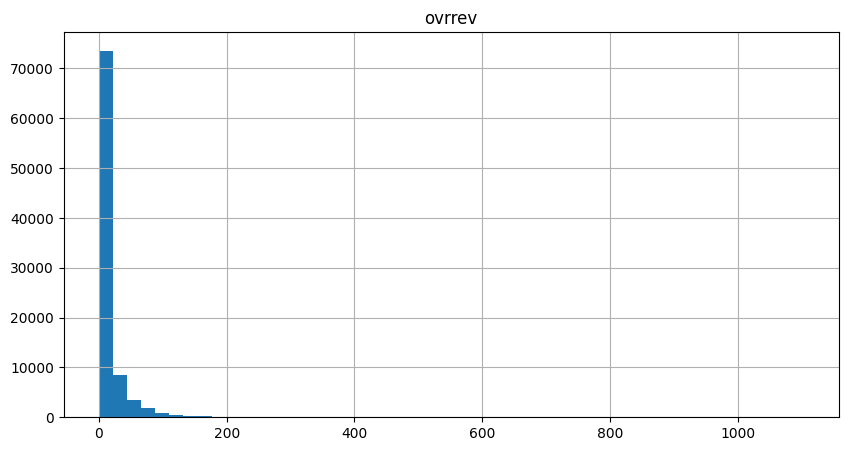

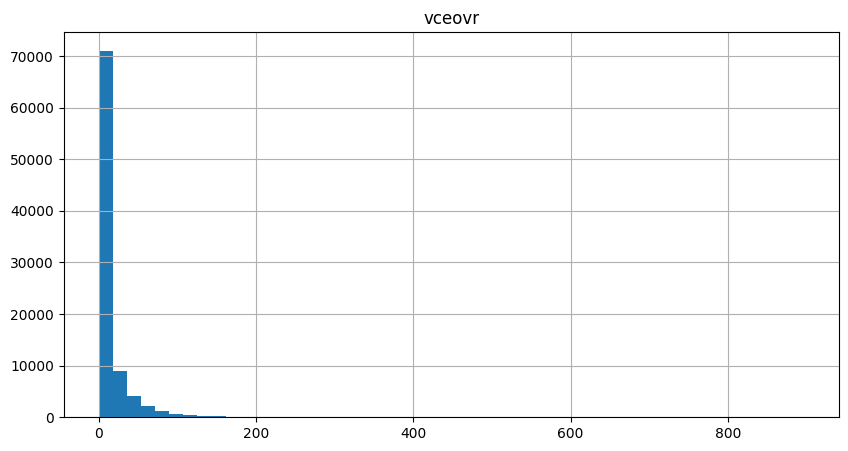

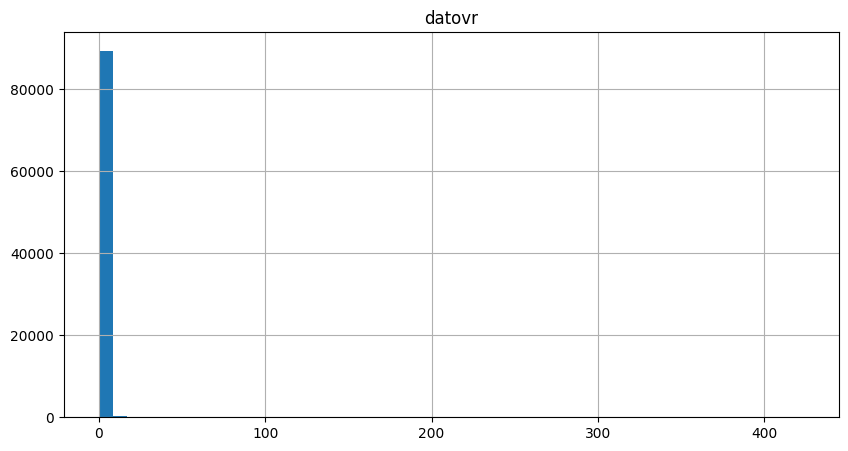

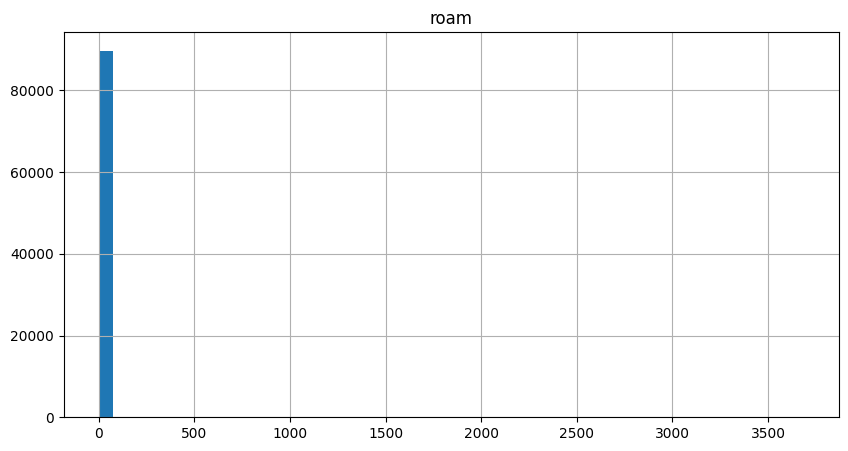

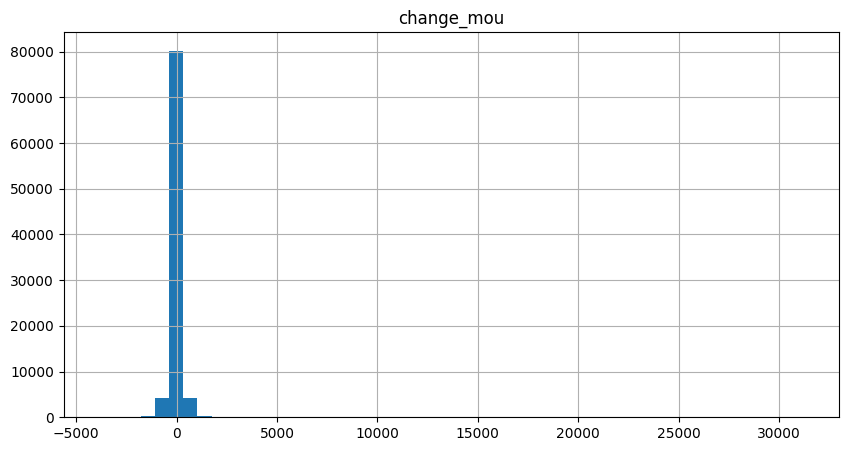

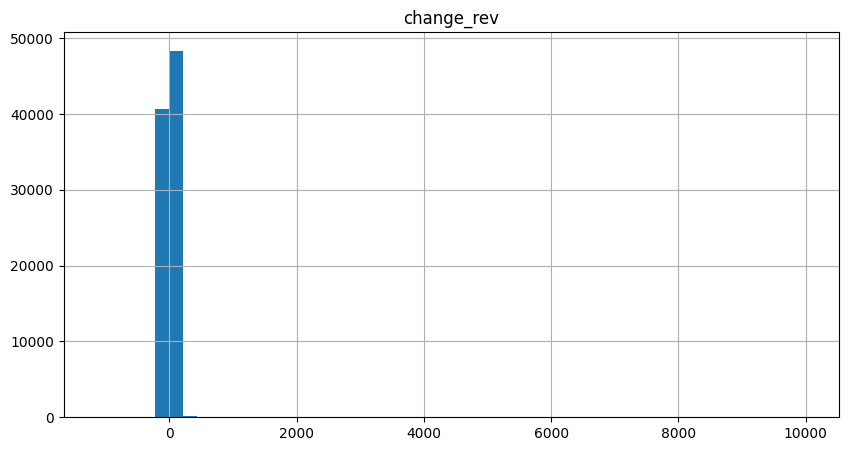

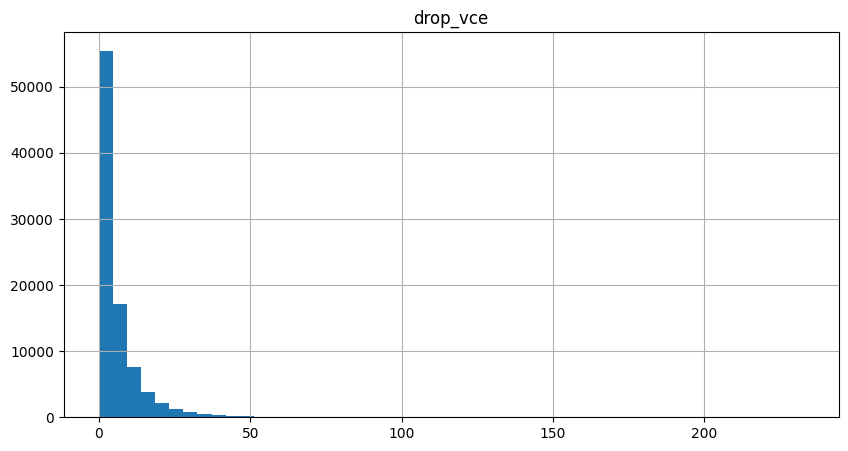

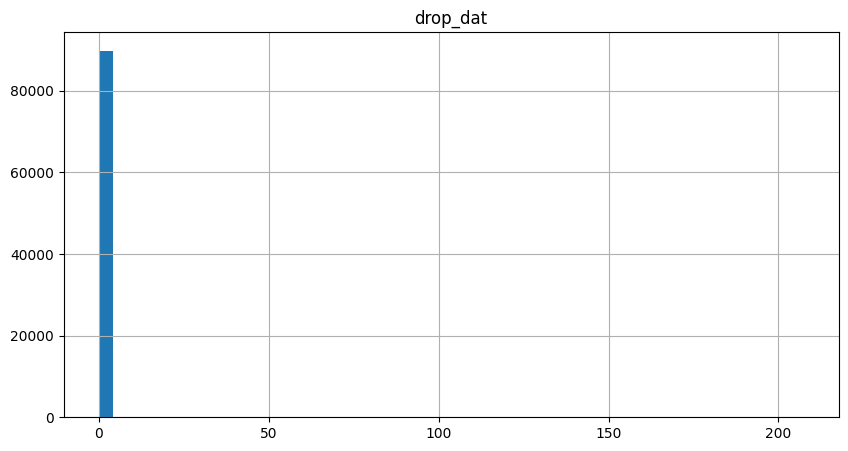

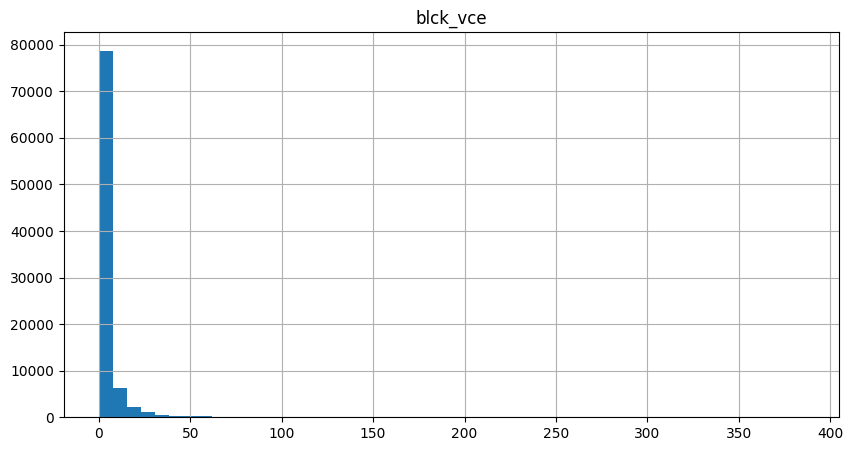

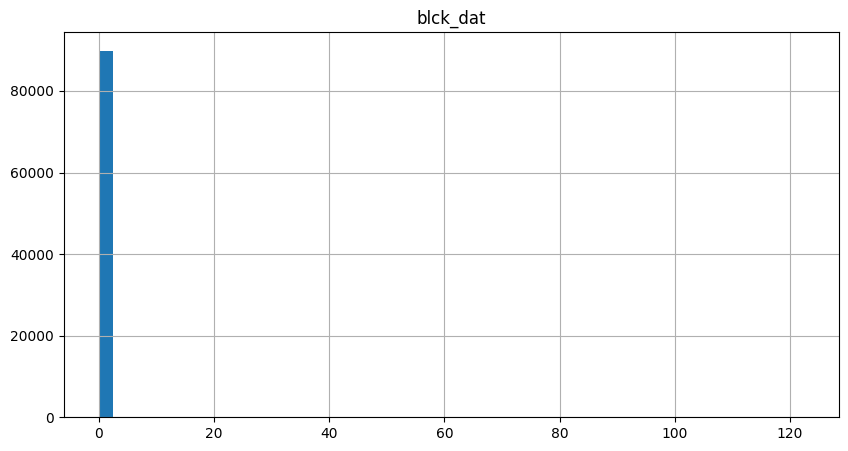

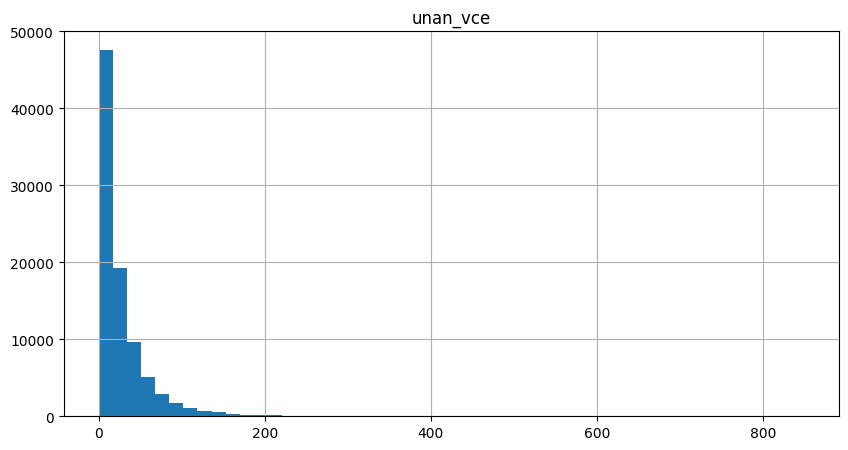

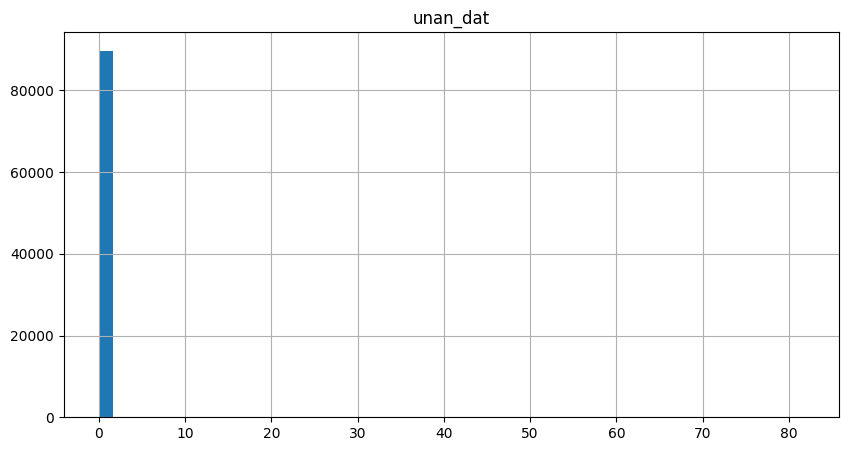

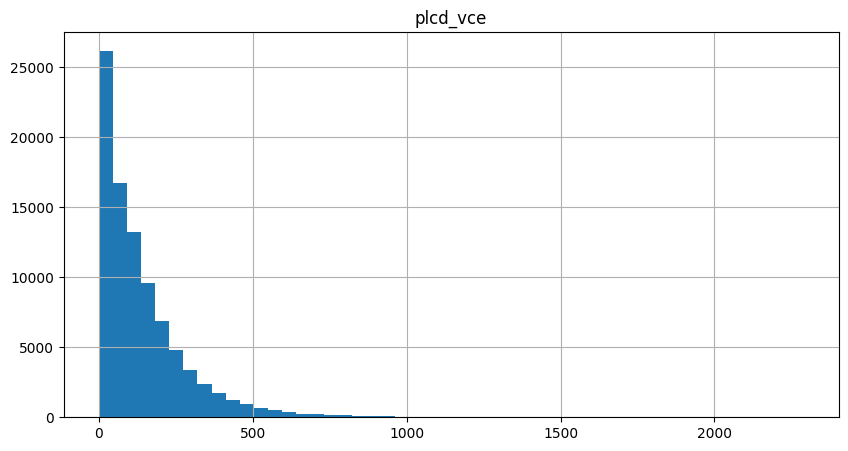

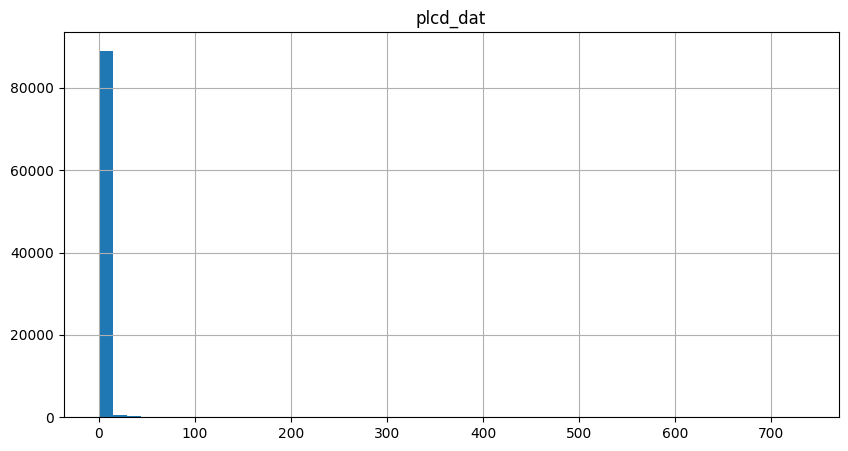

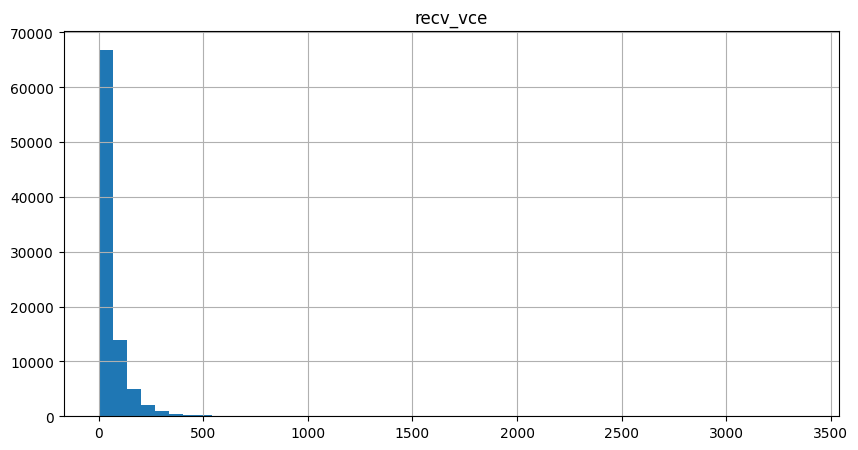

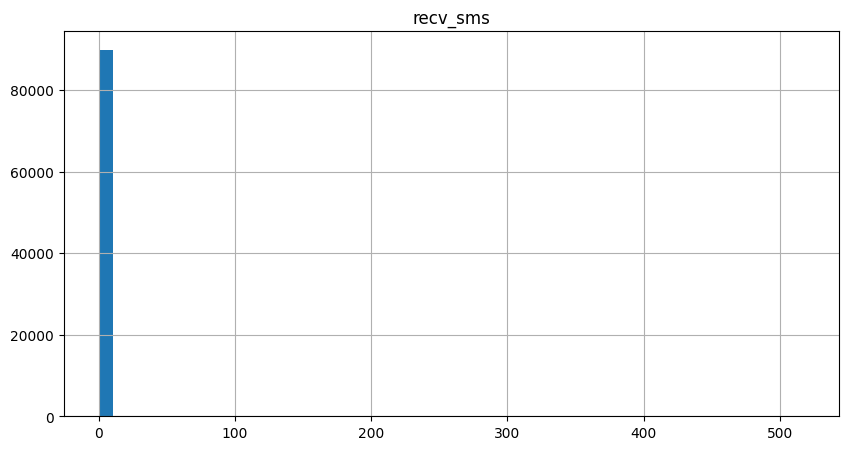

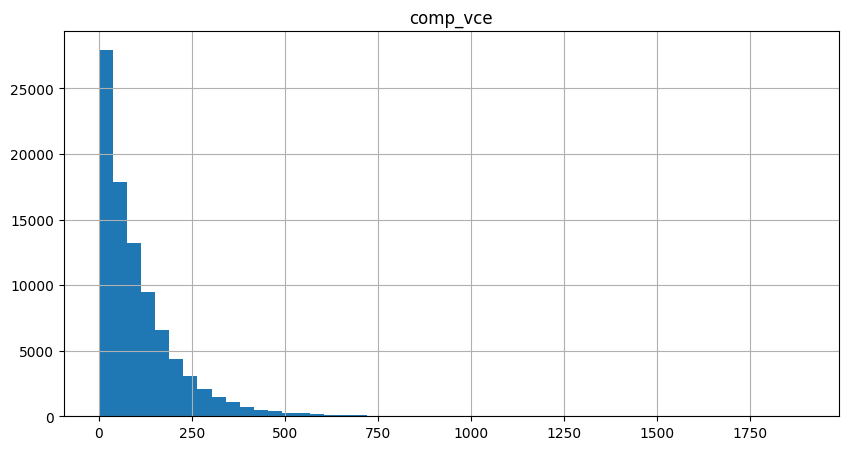

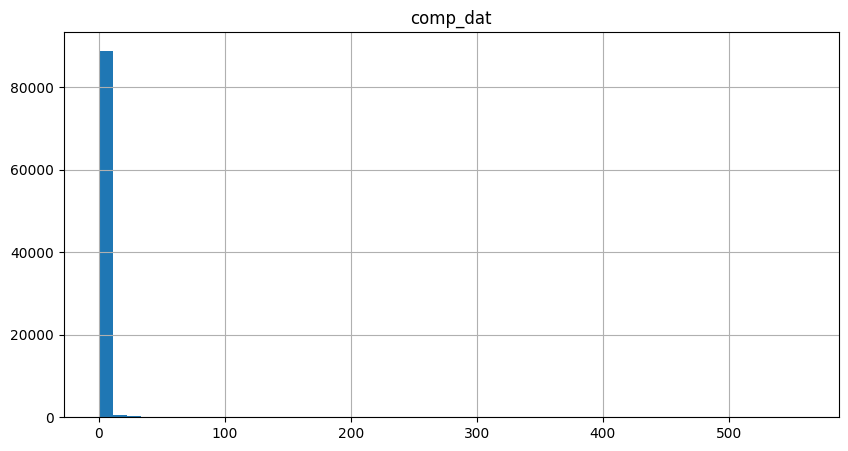

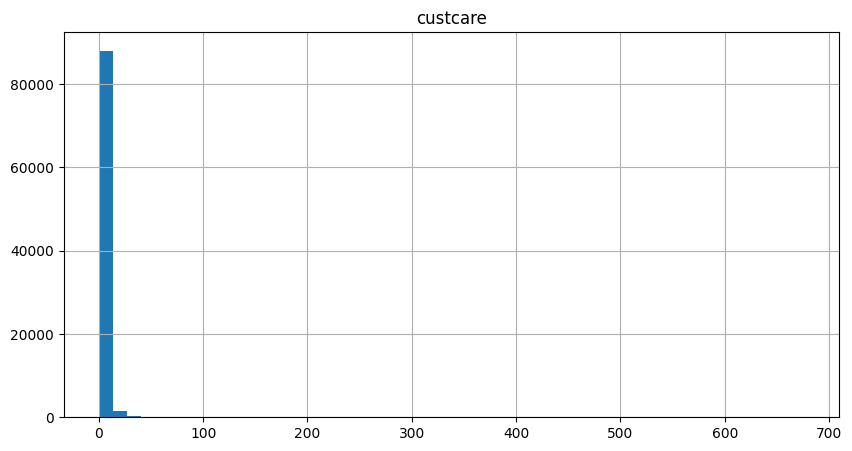

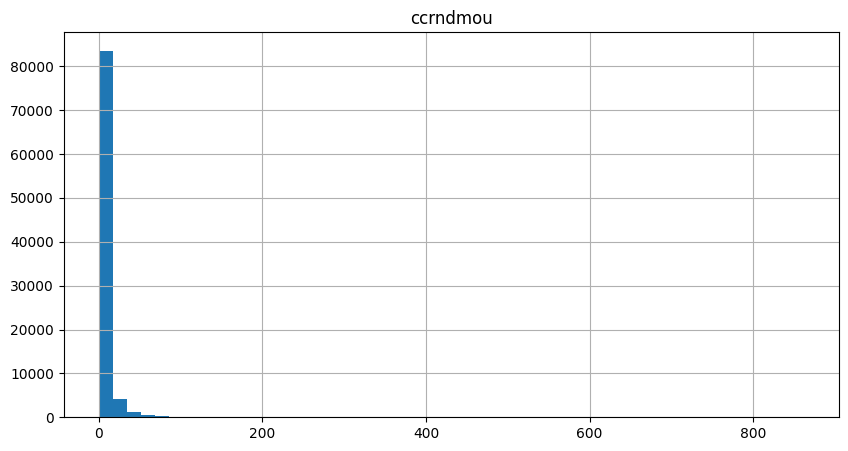

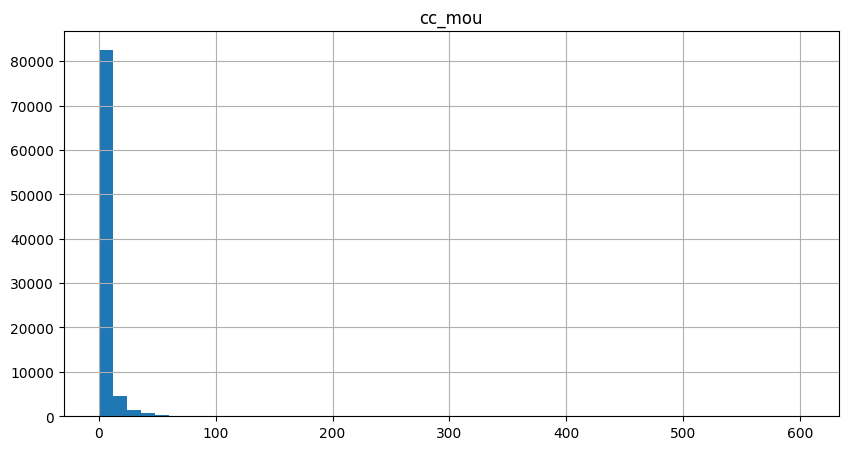

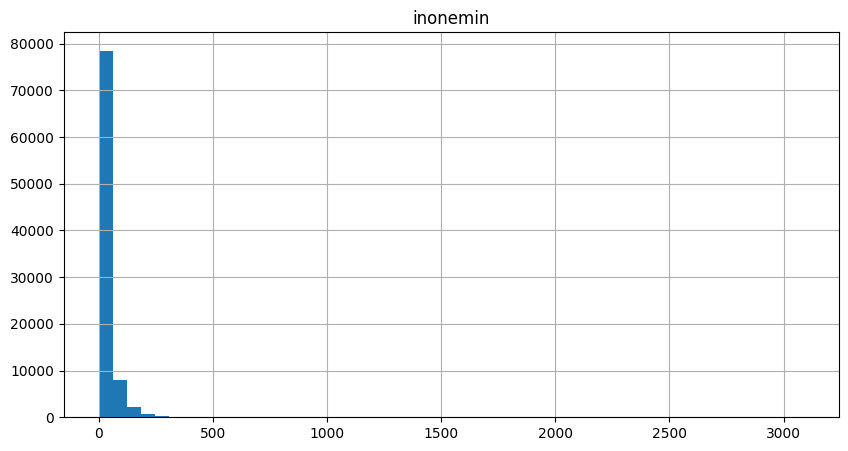

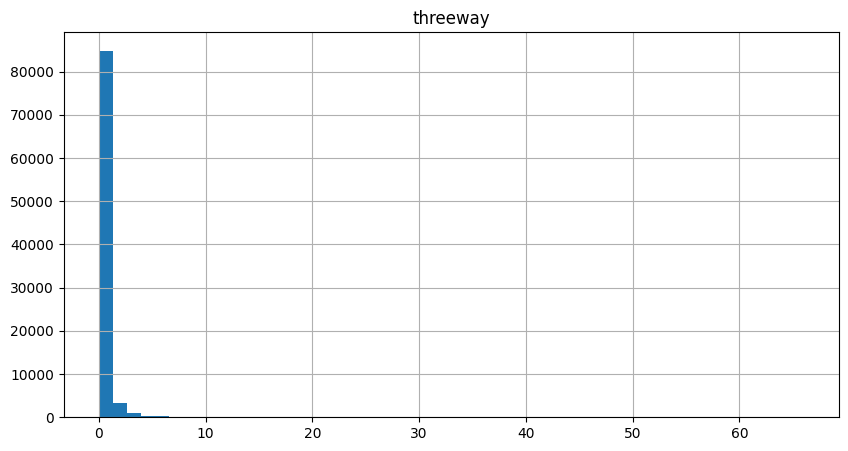

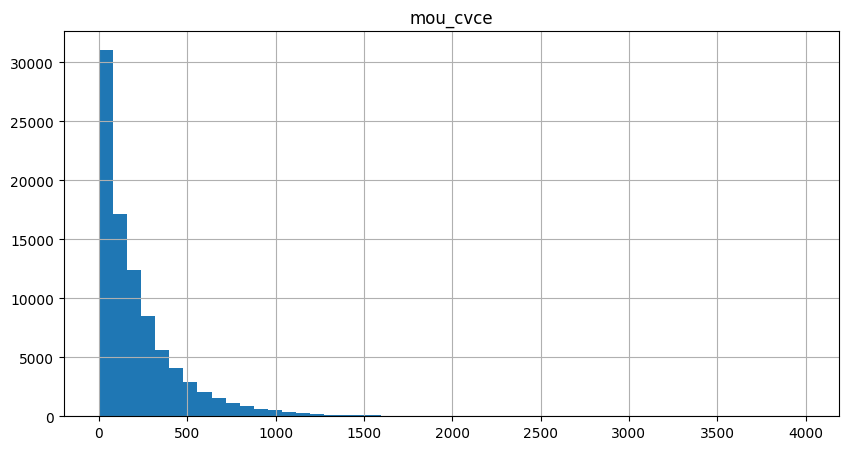

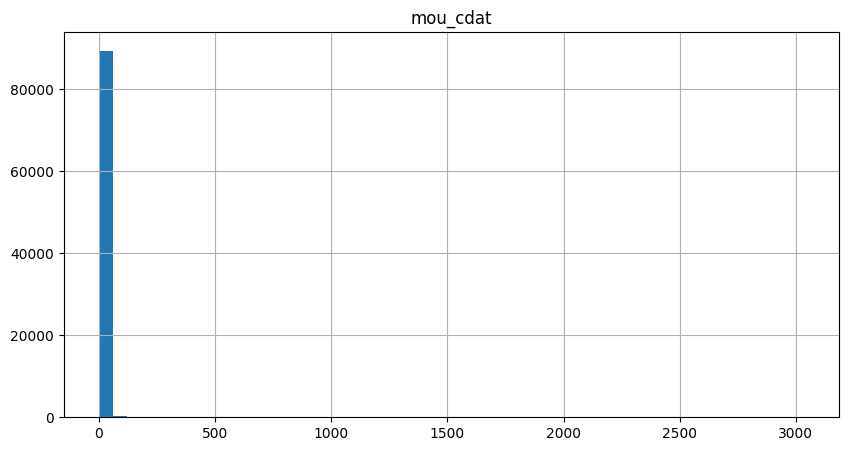

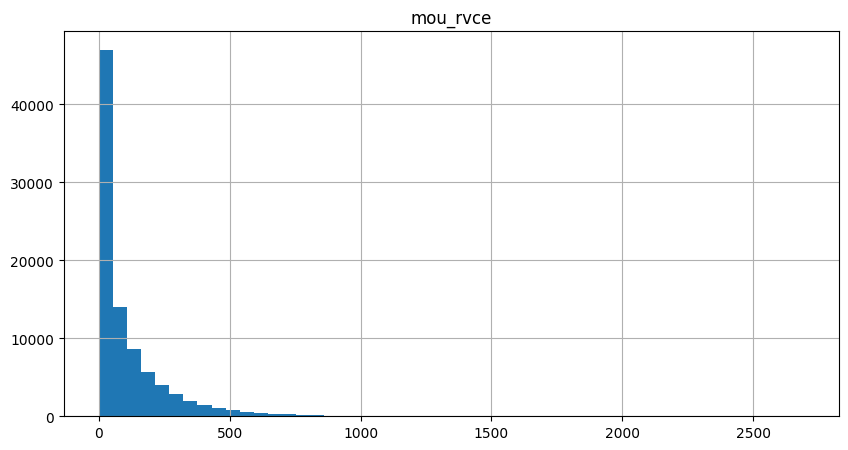

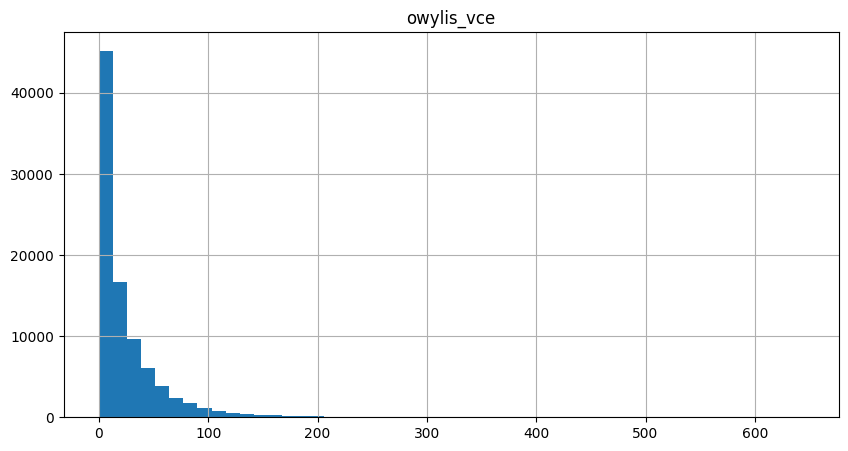

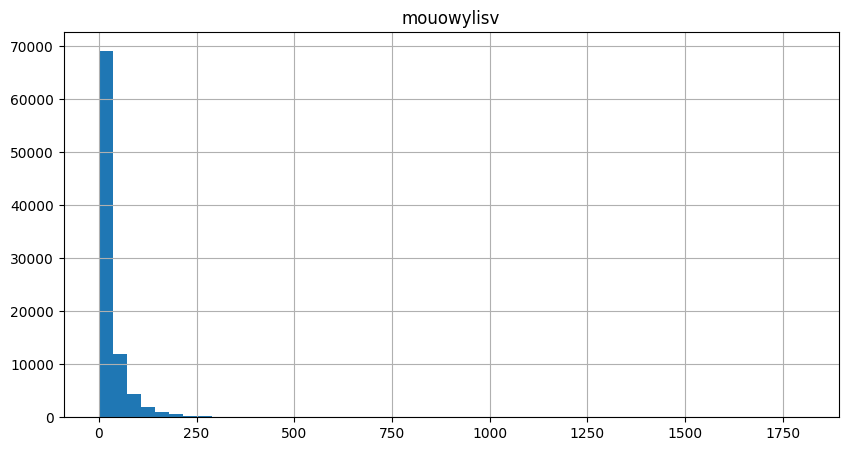

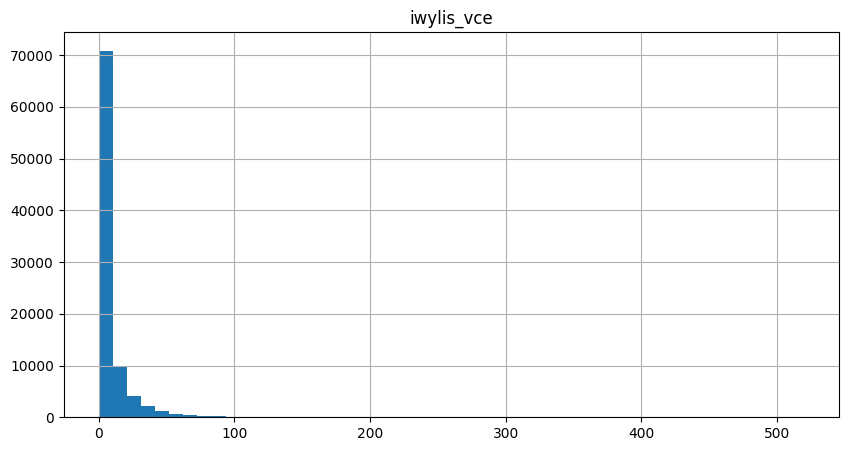

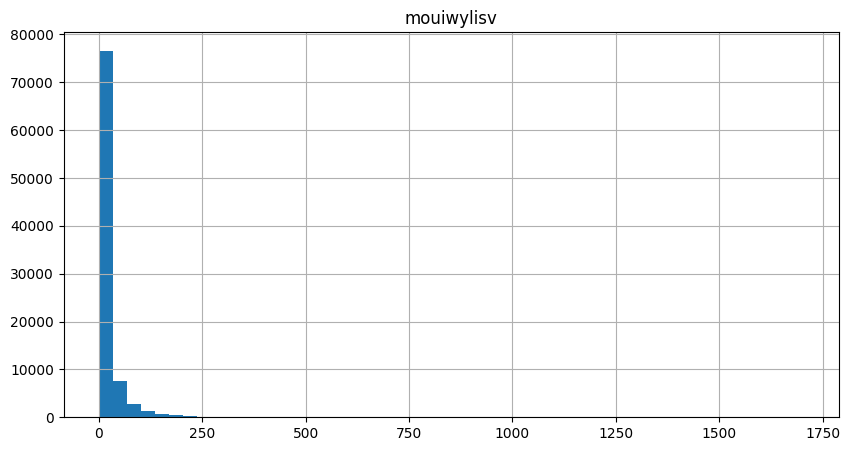

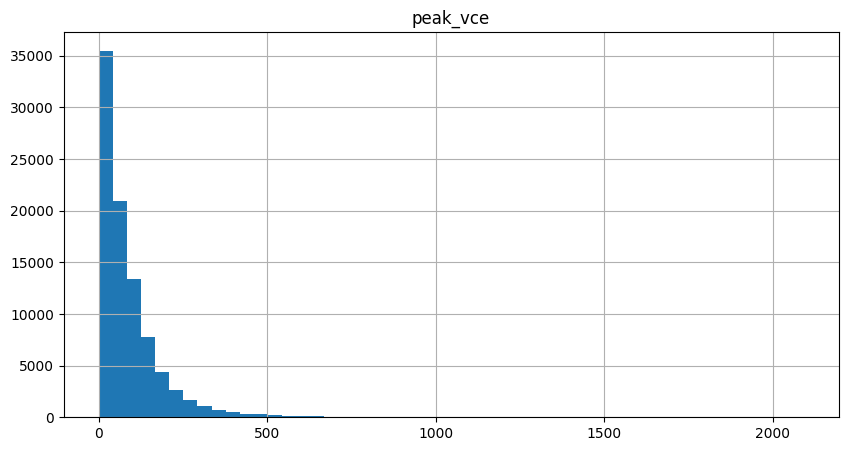

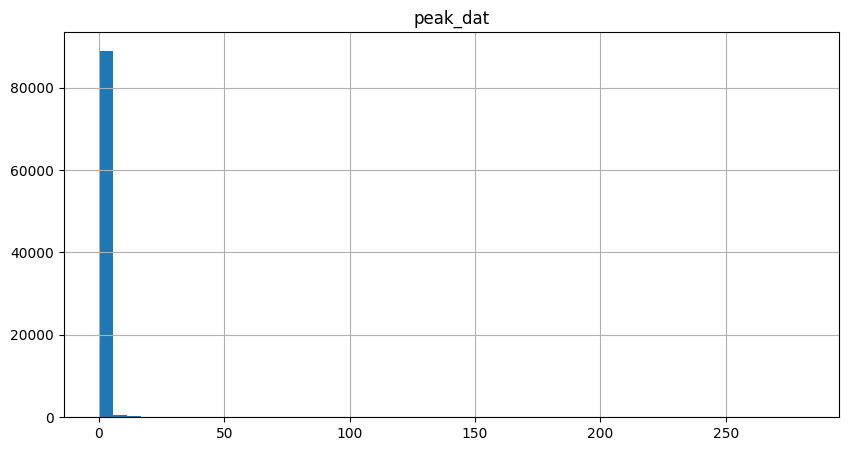

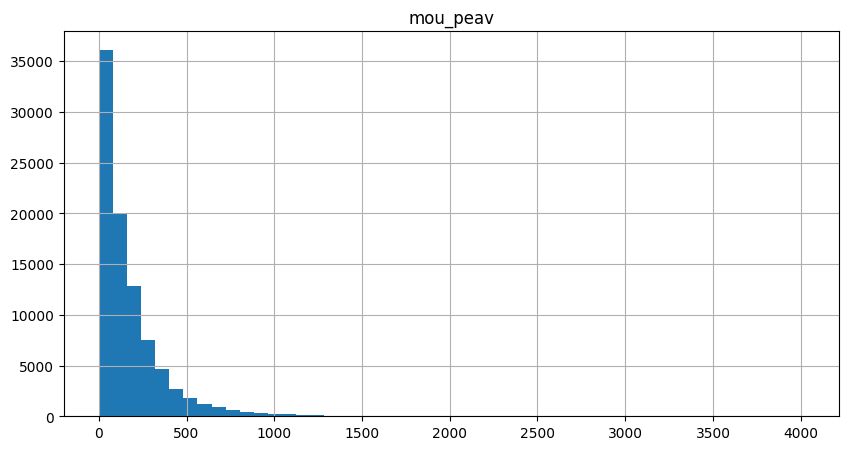

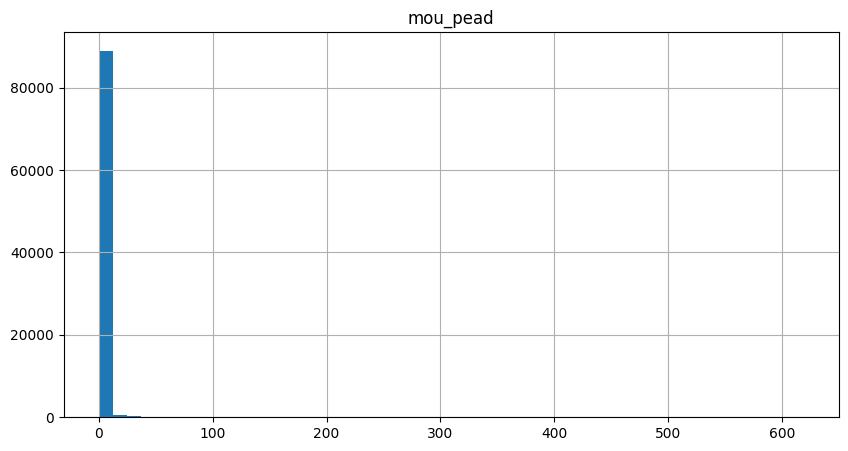

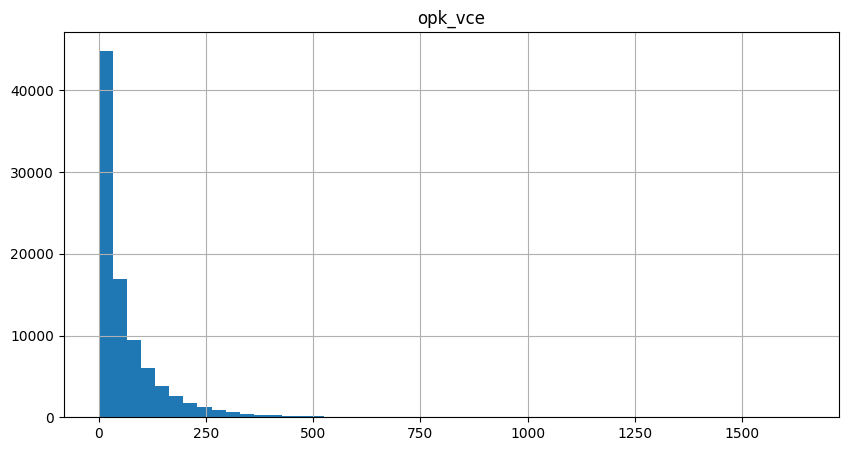

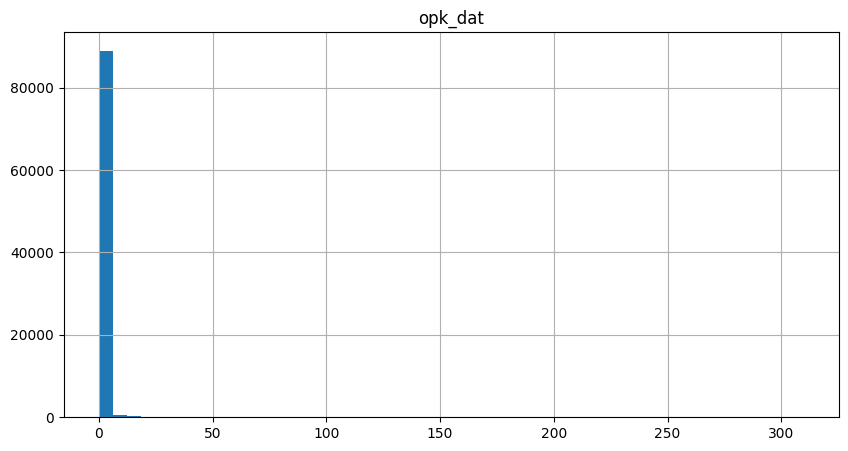

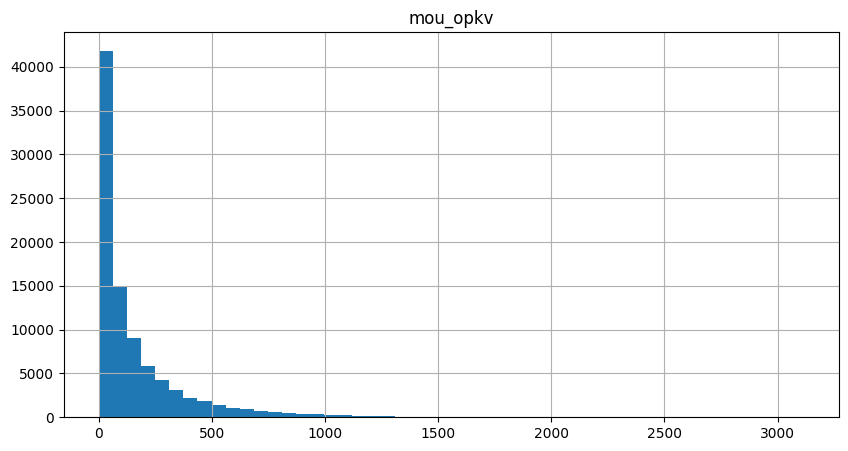

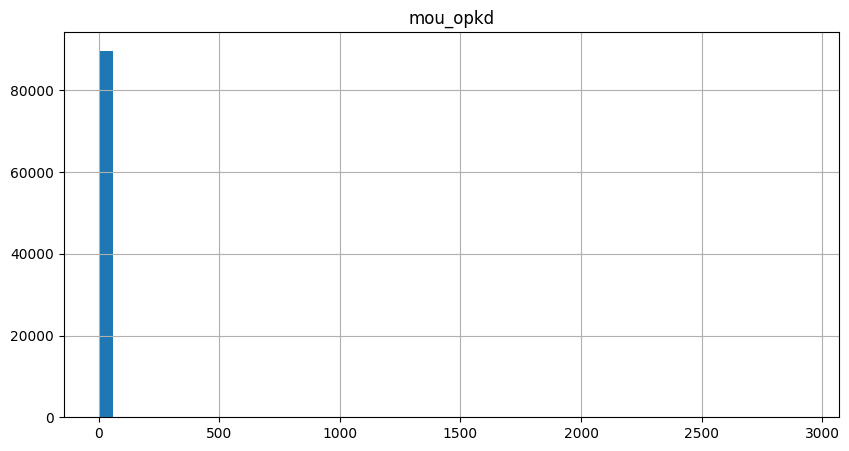

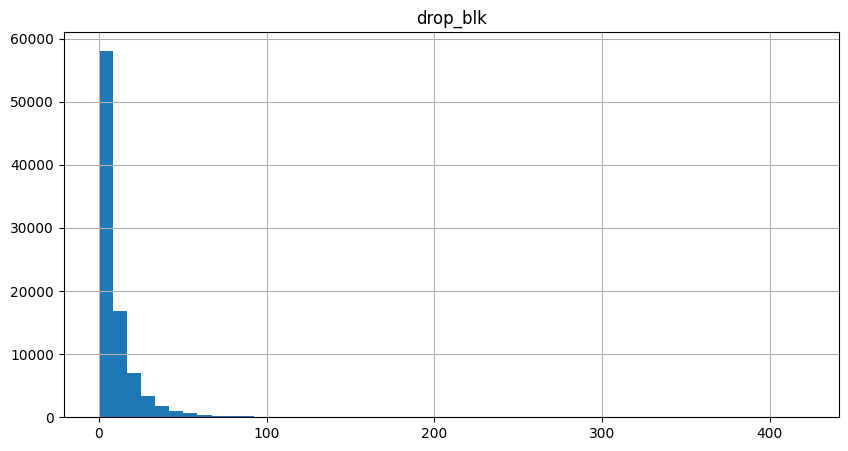

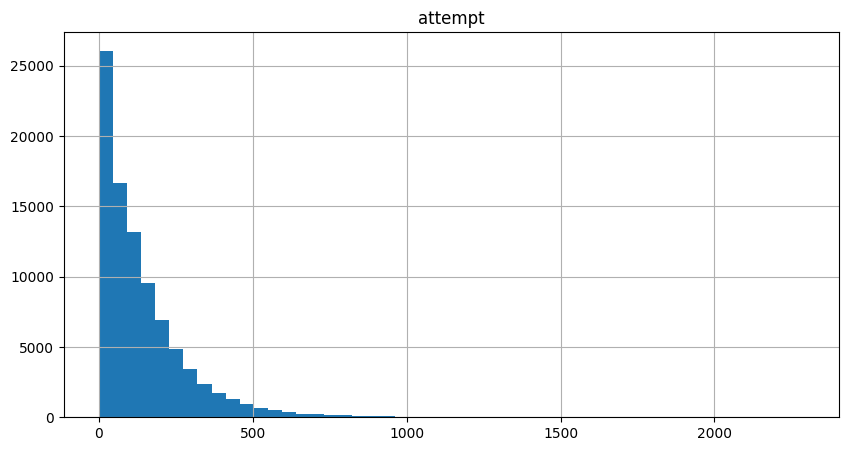

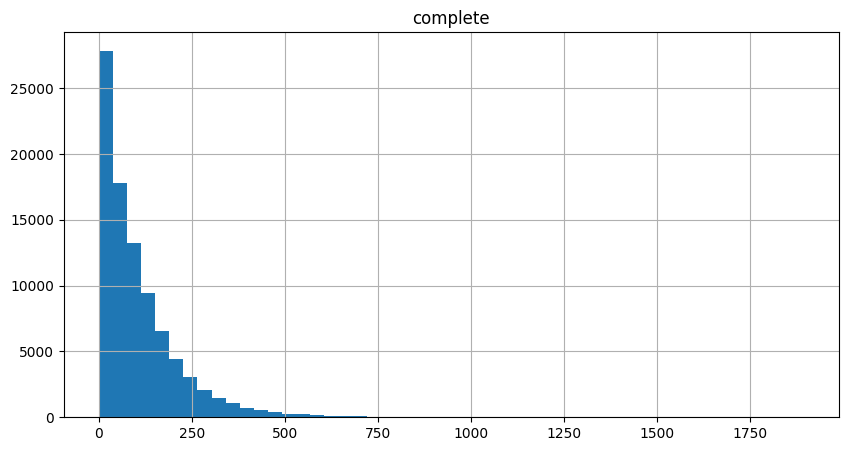

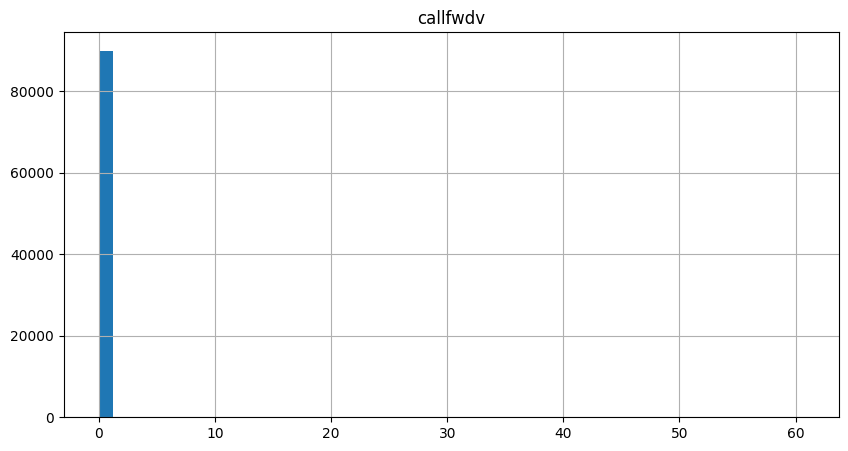

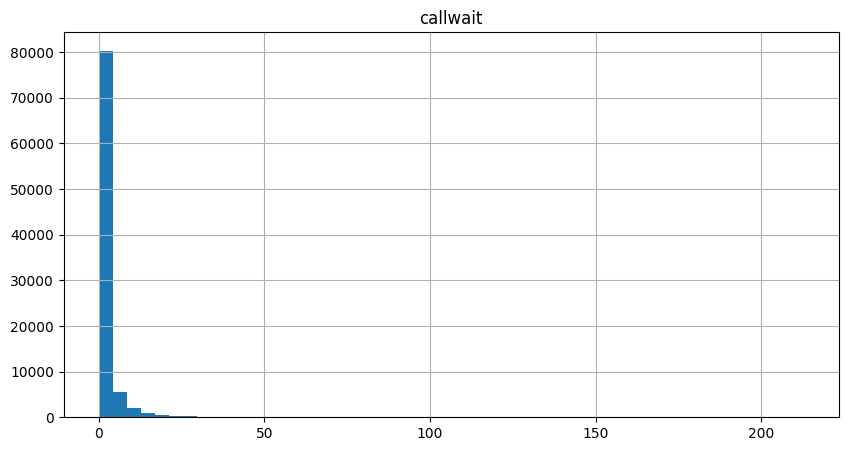

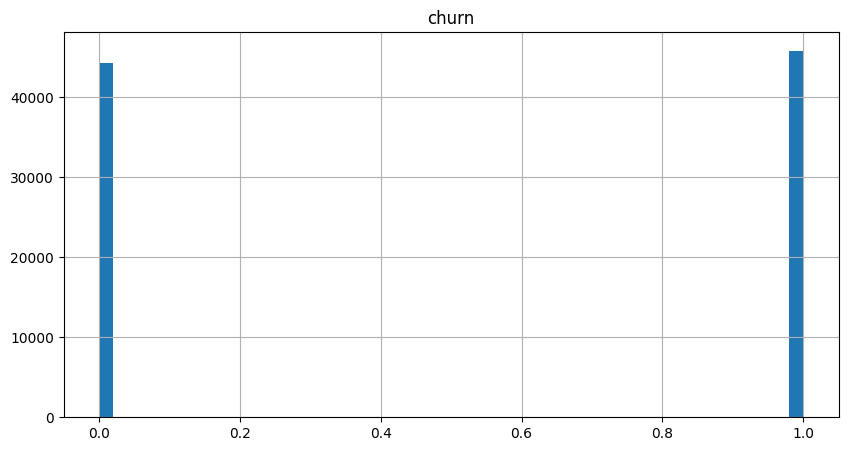

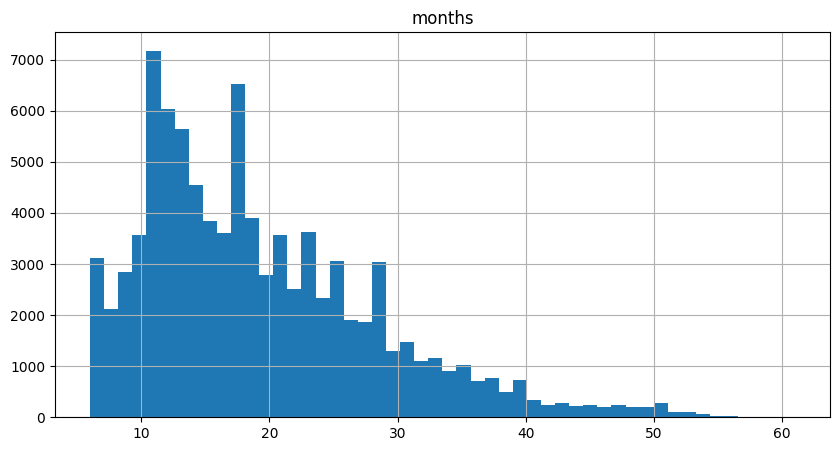

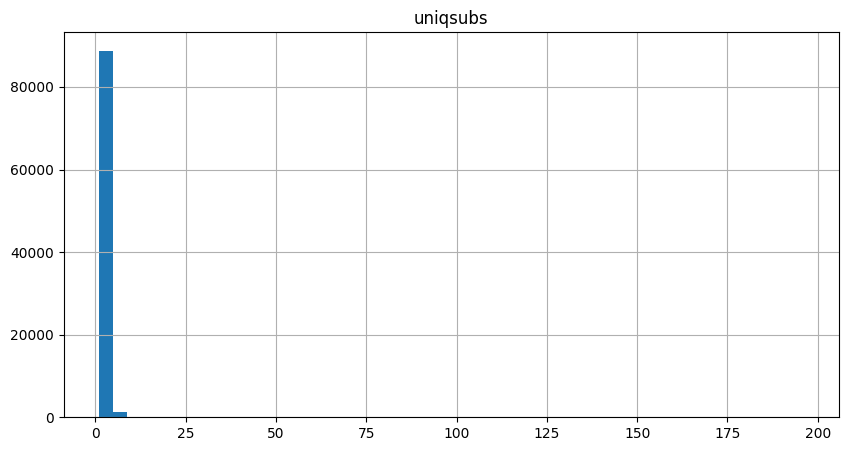

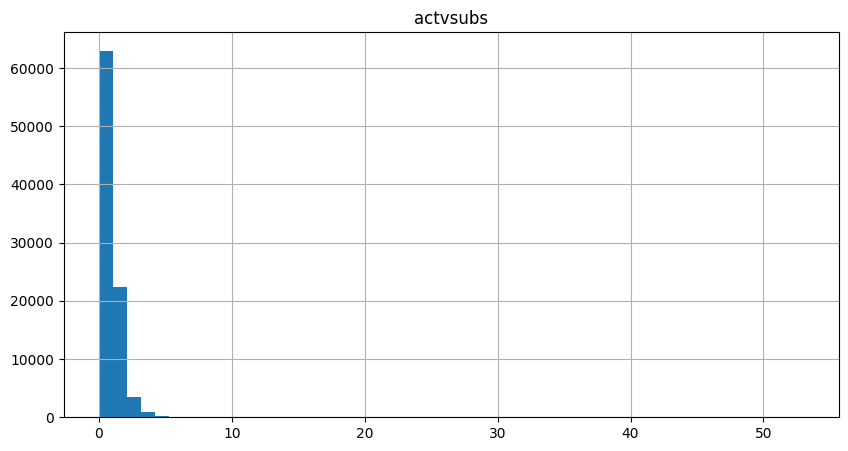

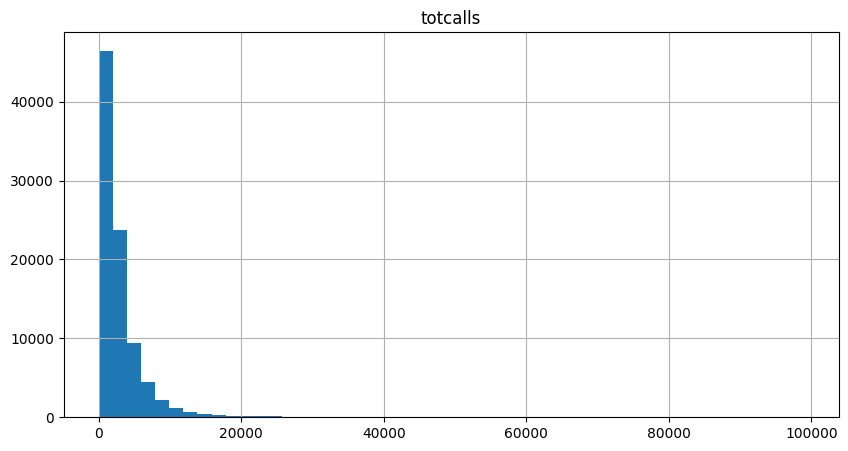

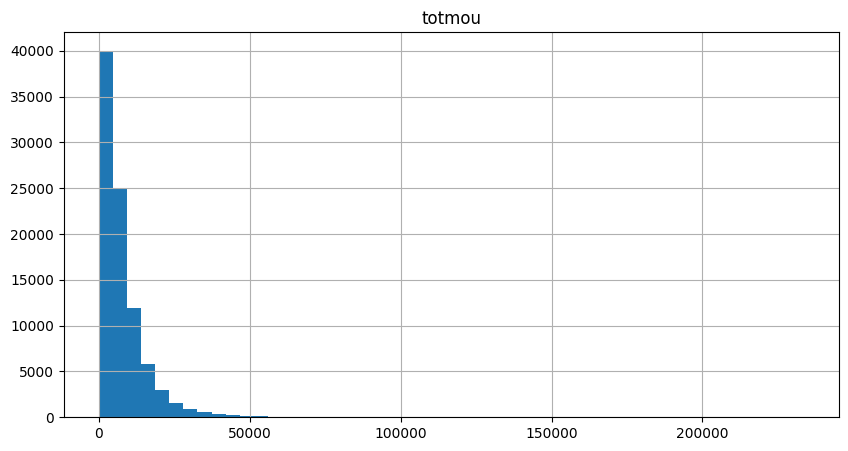

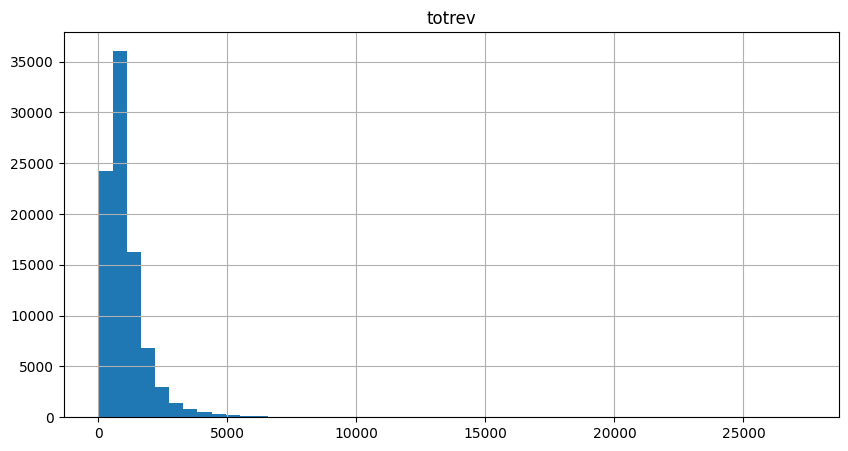

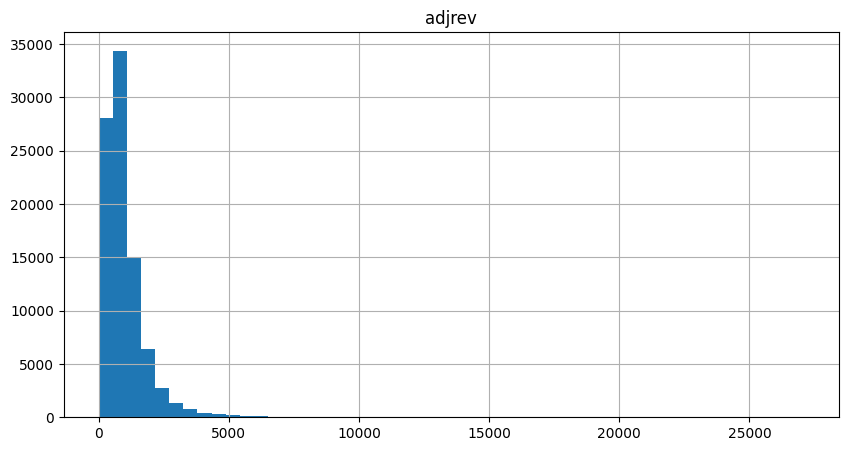

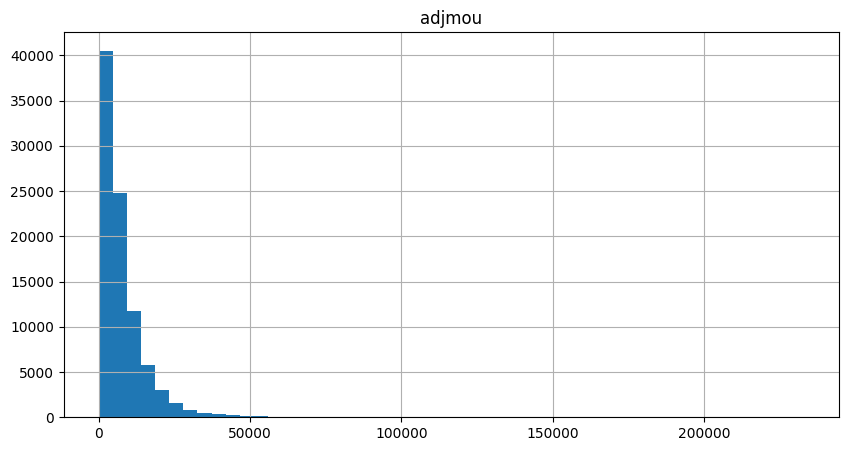

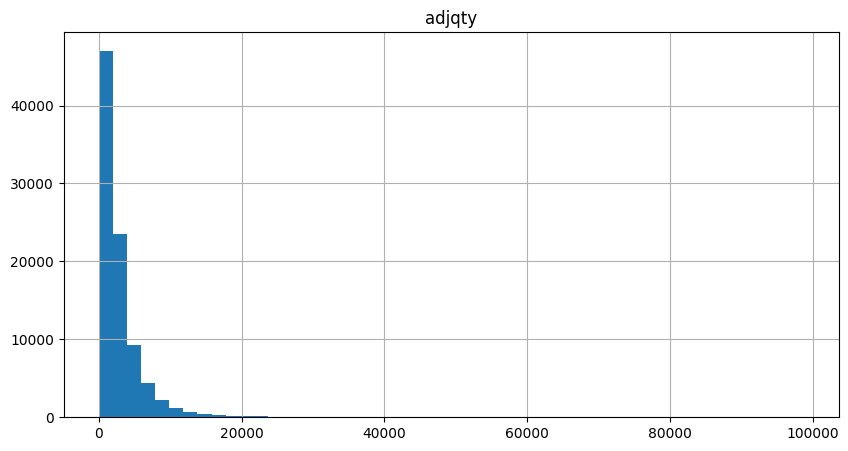

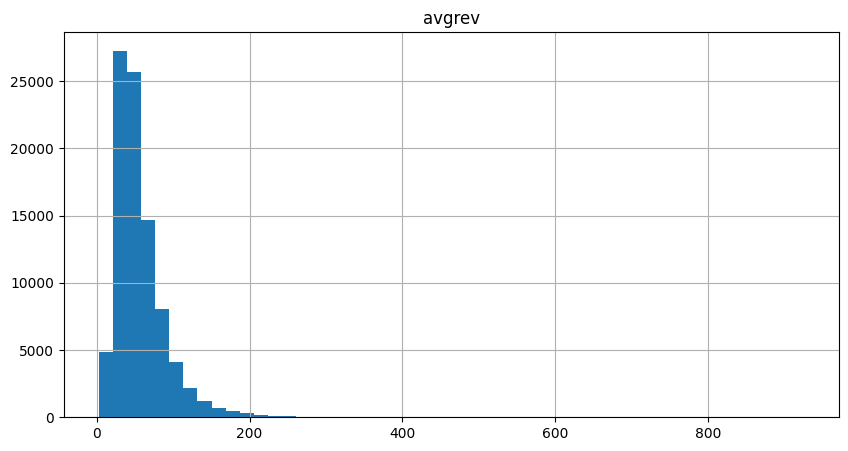

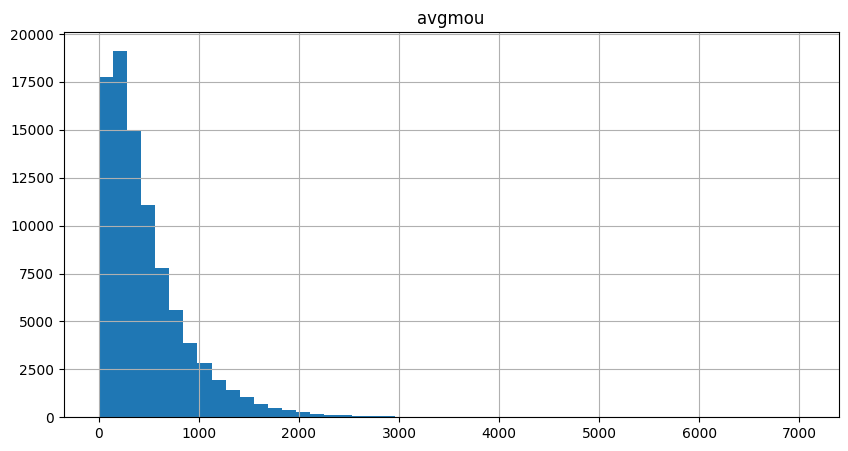

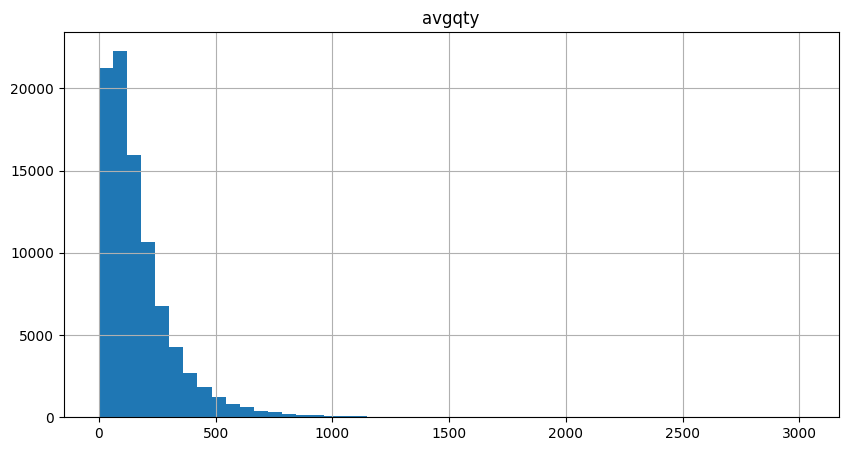

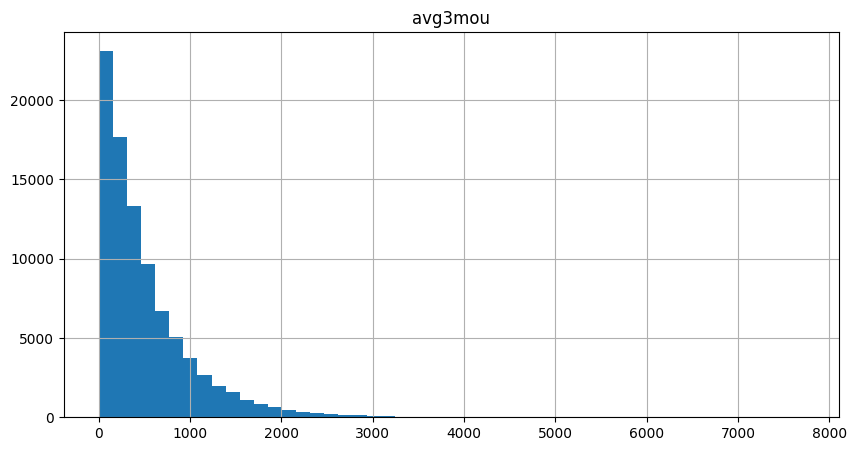

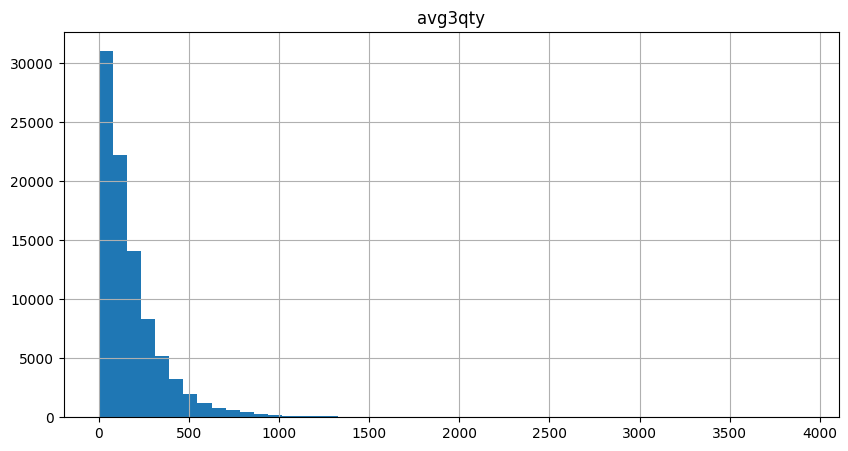

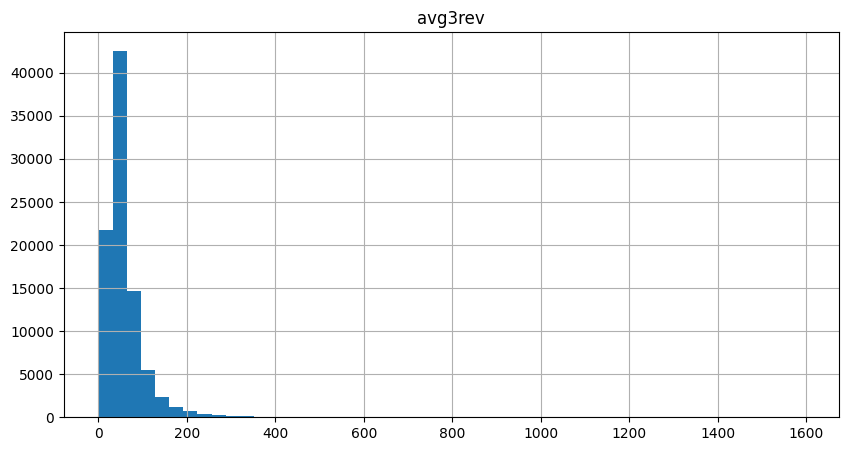

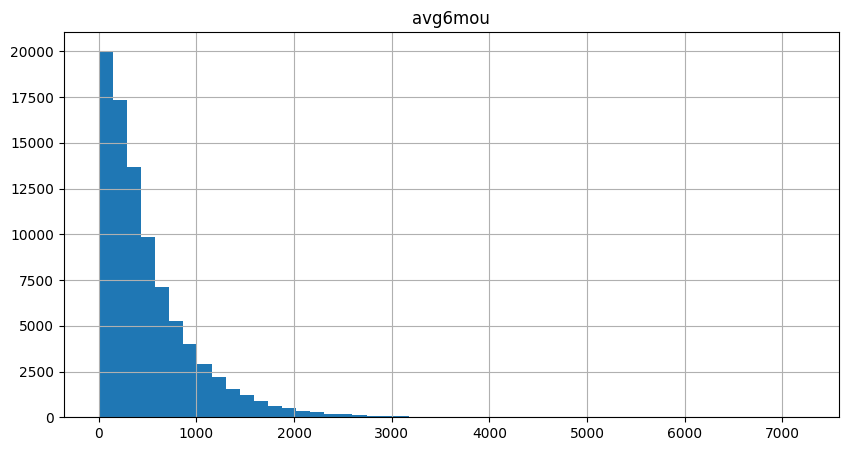

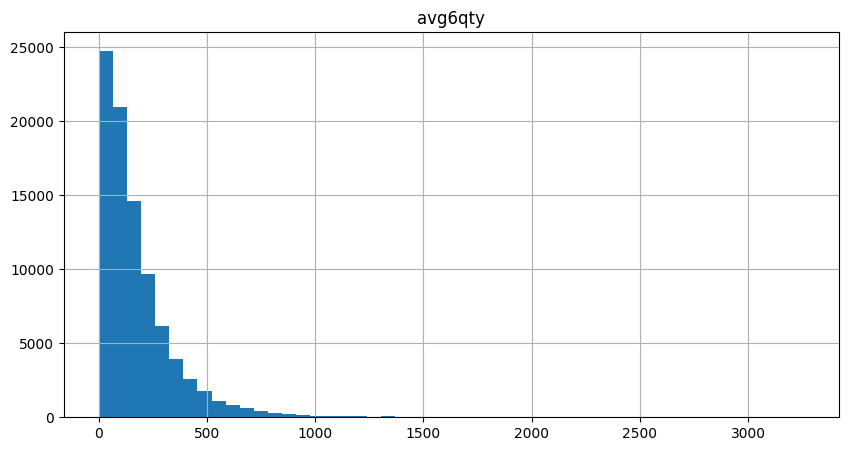

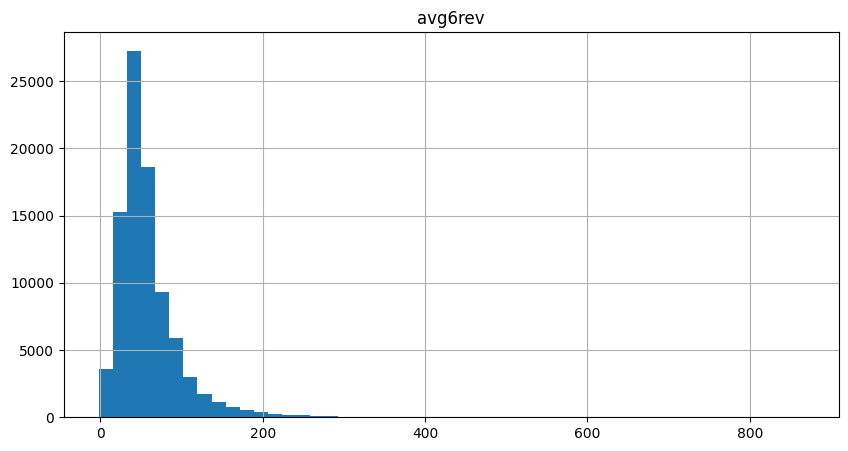

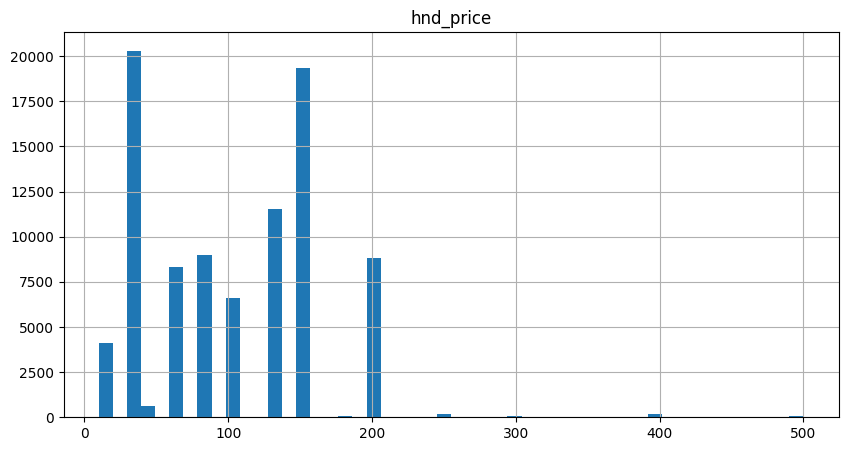

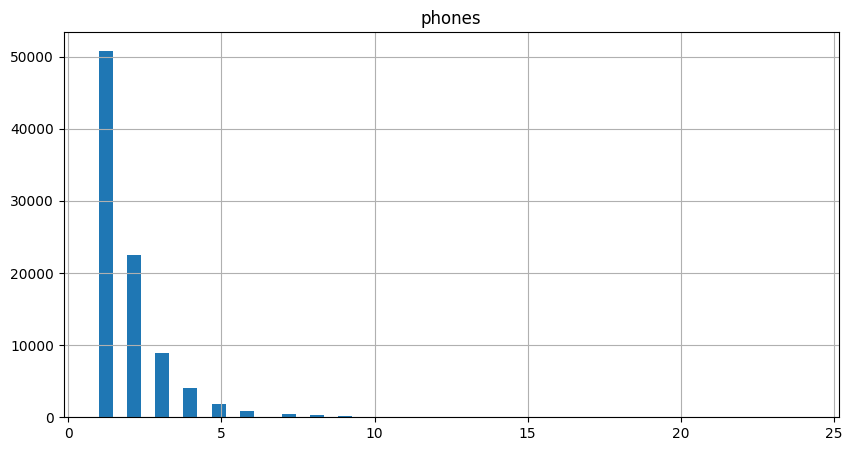

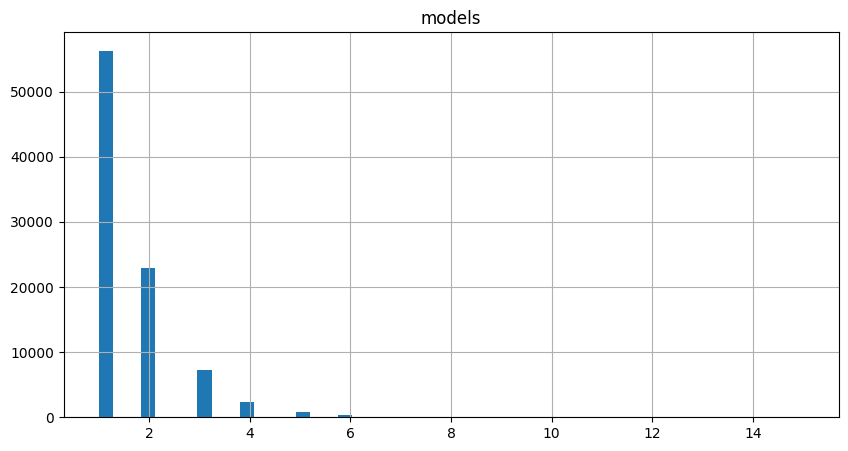

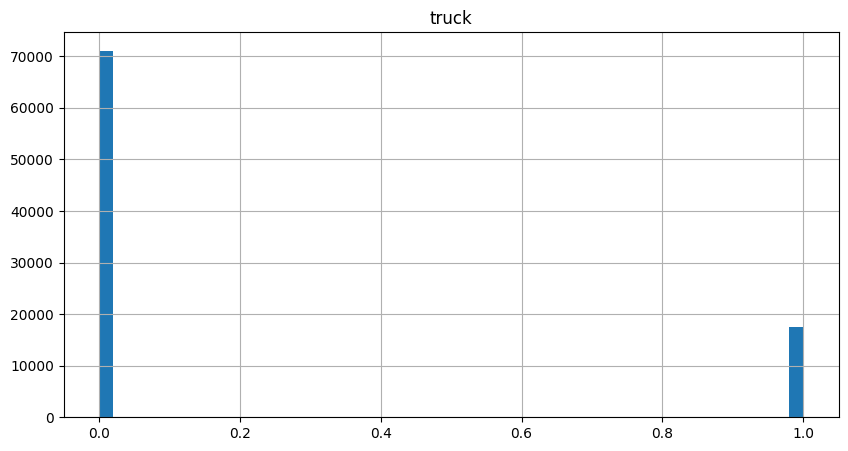

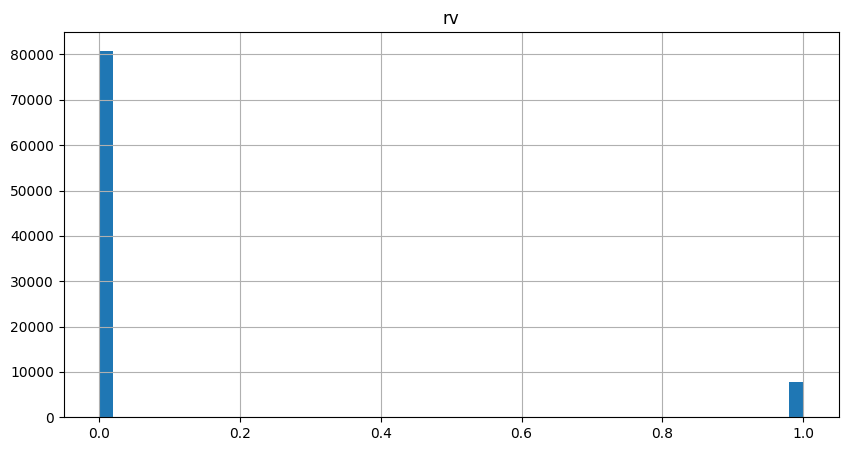

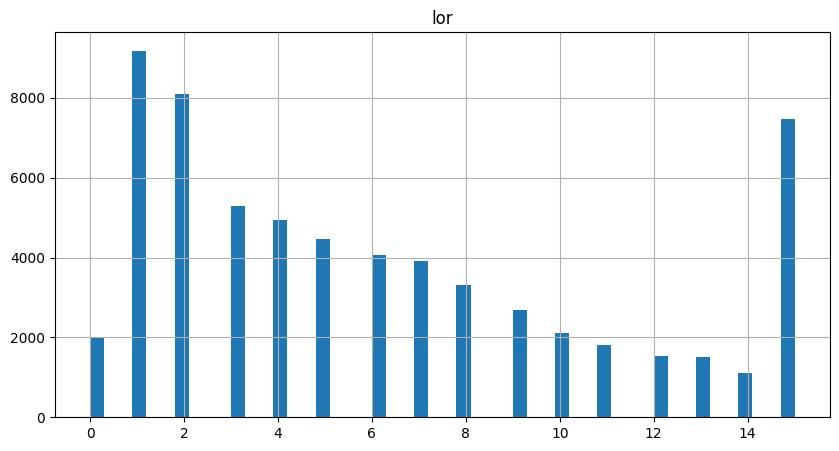

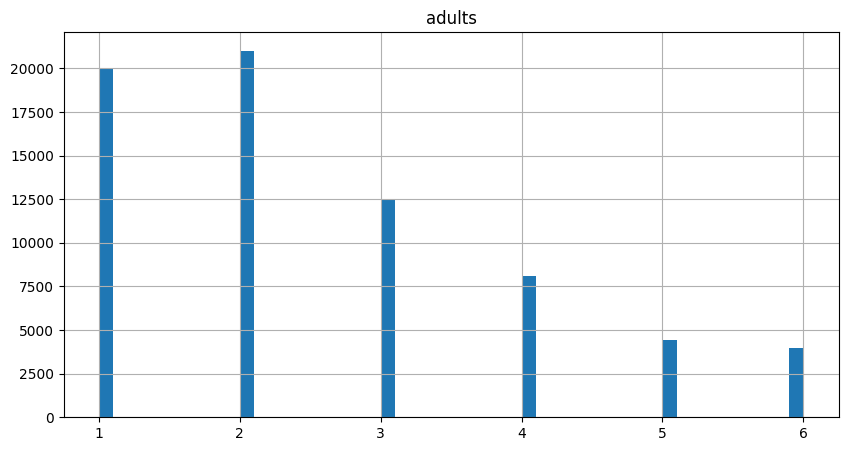

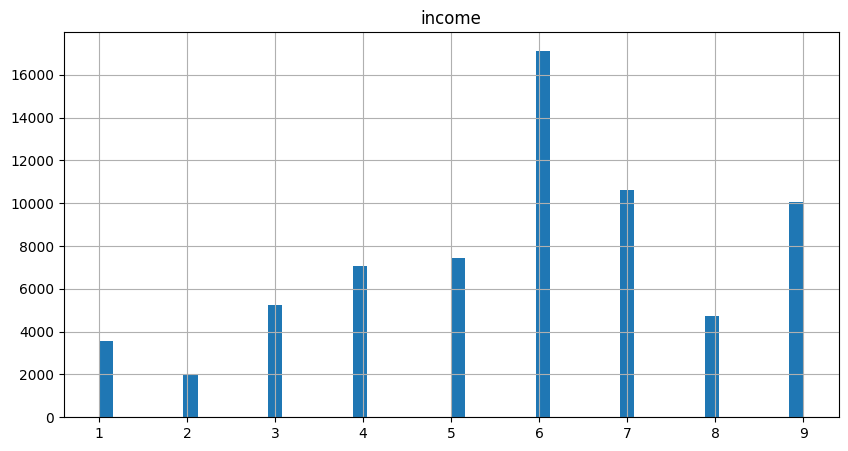

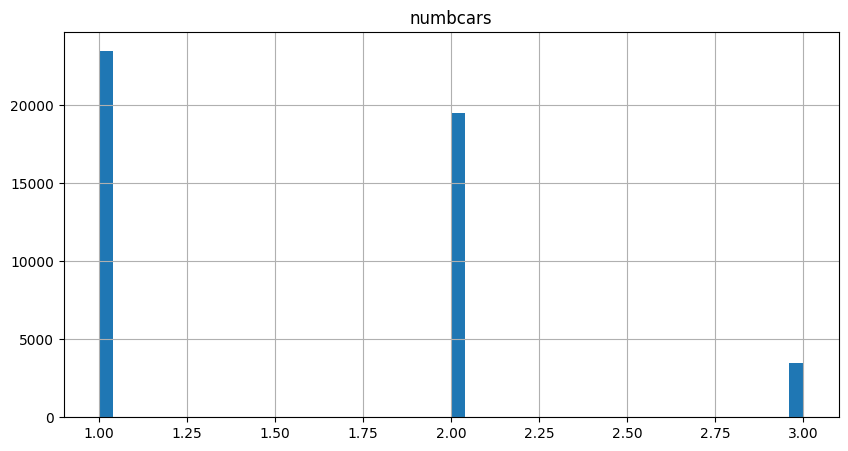

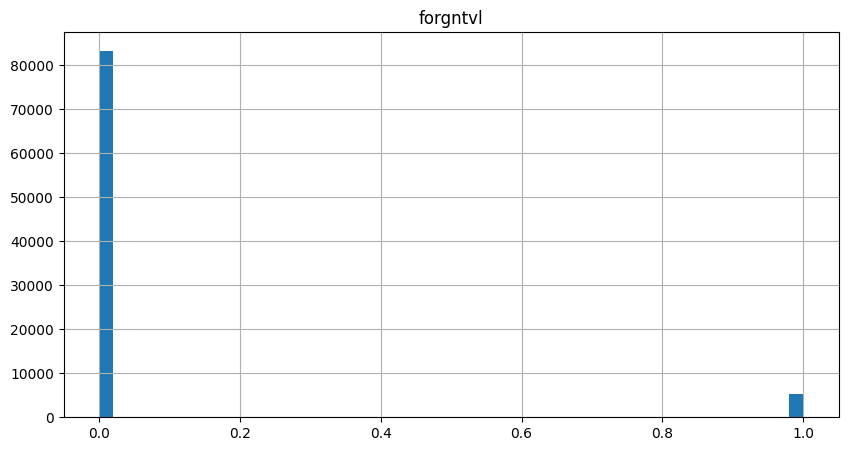

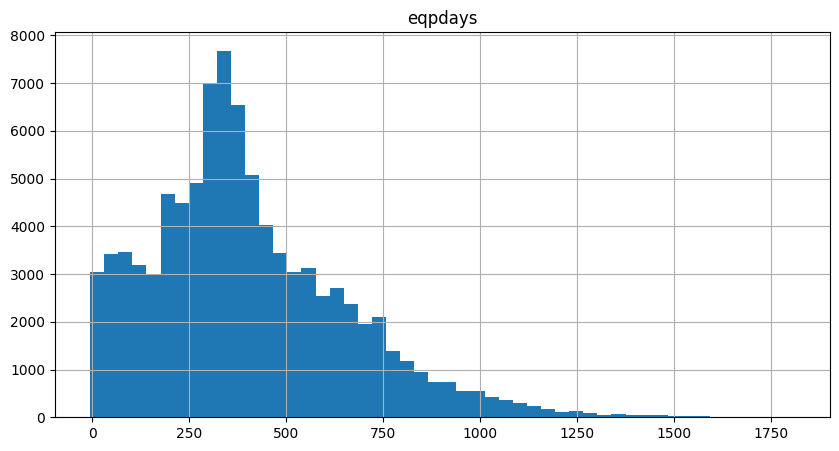

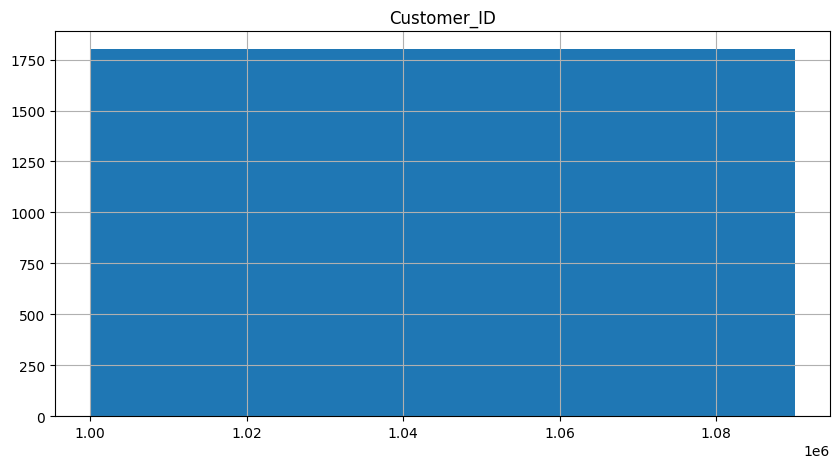

In [ ]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df_entrenar.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df_entrenar[col].hist(bins=50)
    plt.title(col)
    plt.show()




In [ ]:
#Después de ver los histogramas de las columnas numéricas de df_entrenar nos damos cuenta que la myoría de las
#columnas tienen sus valores muy cercanos al 0.
#También nos damos cuenta de que en la columna "change_mou" (Cambio porcentual en los minutos mensuales de uso vs promedio de los tres meses anteriores)
#hay valores negativos.

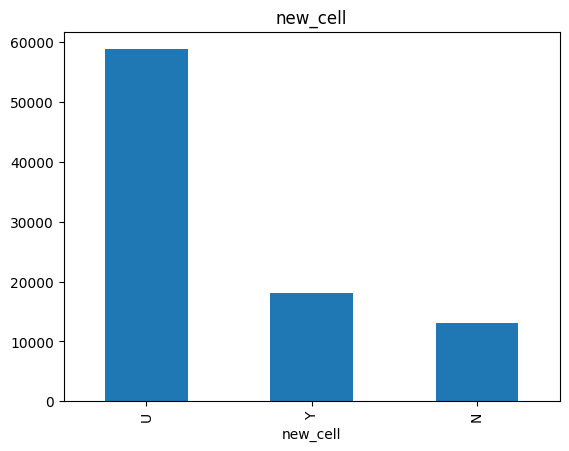

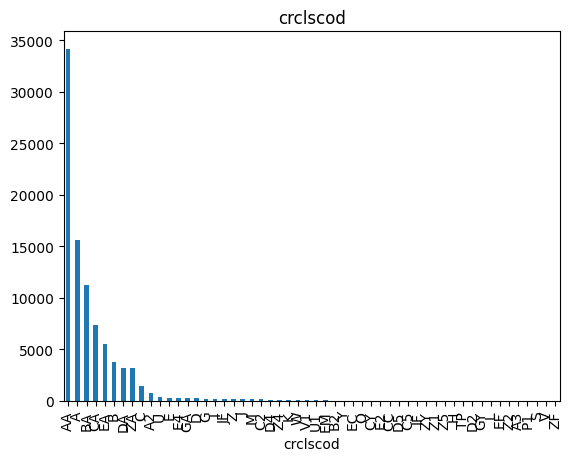

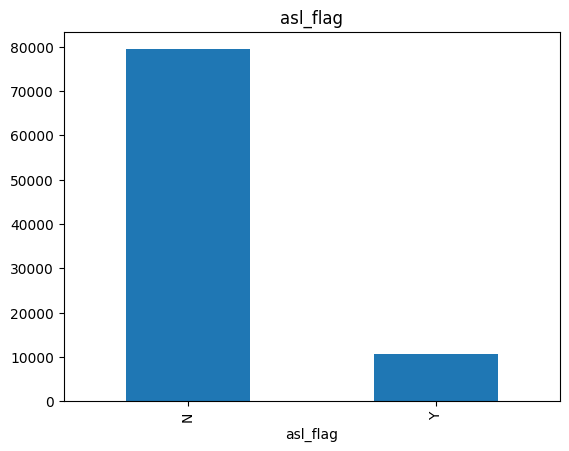

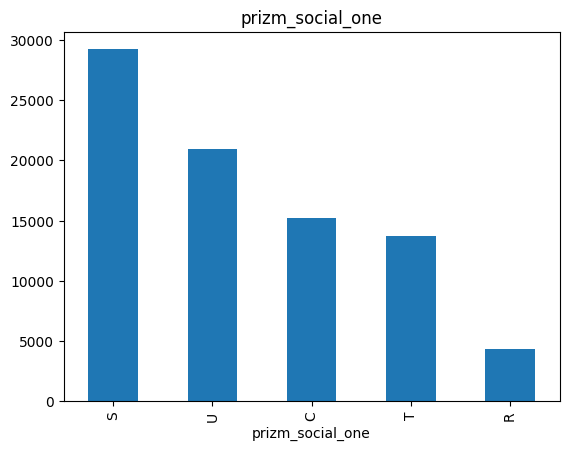

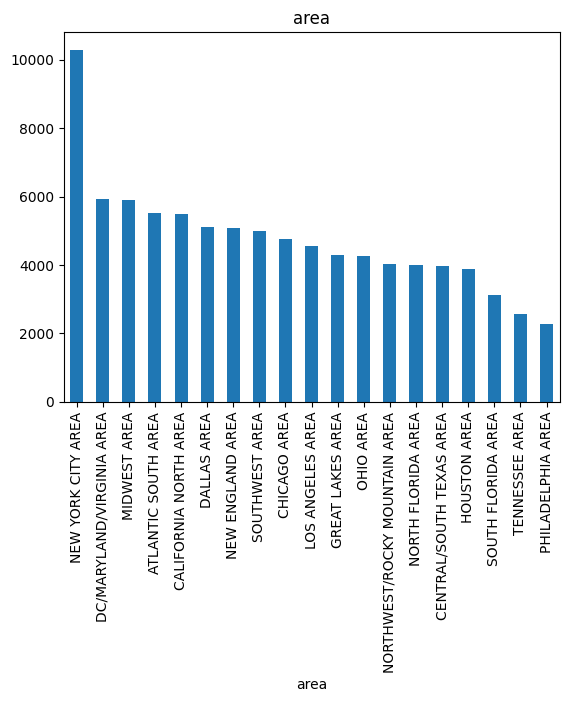

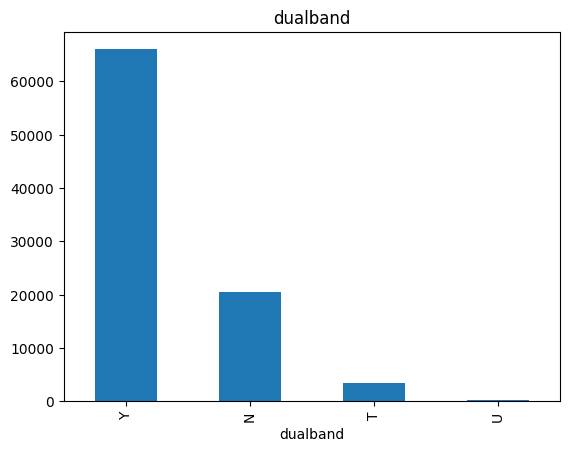

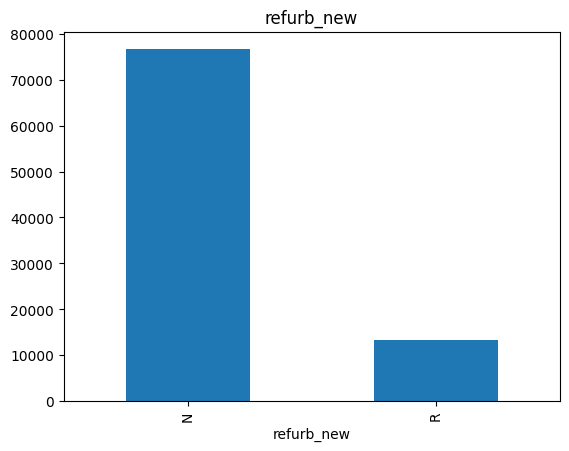

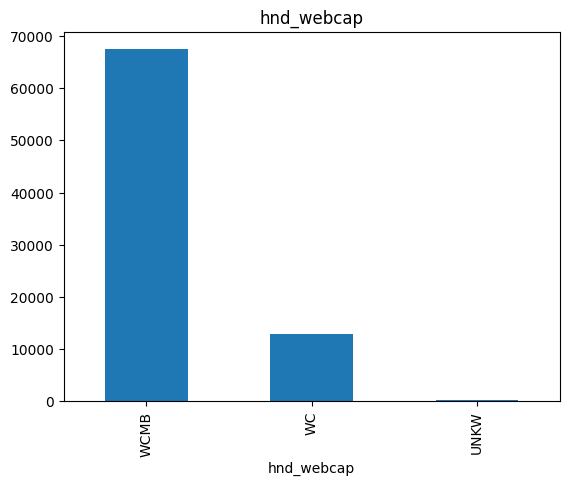

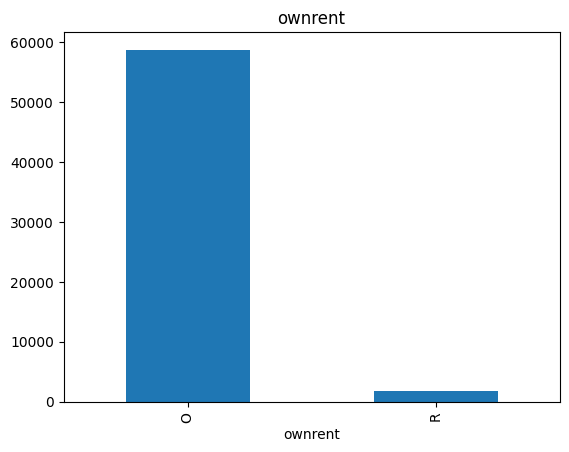

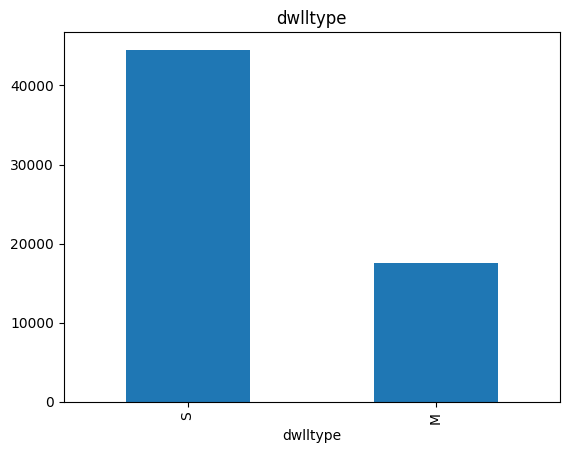

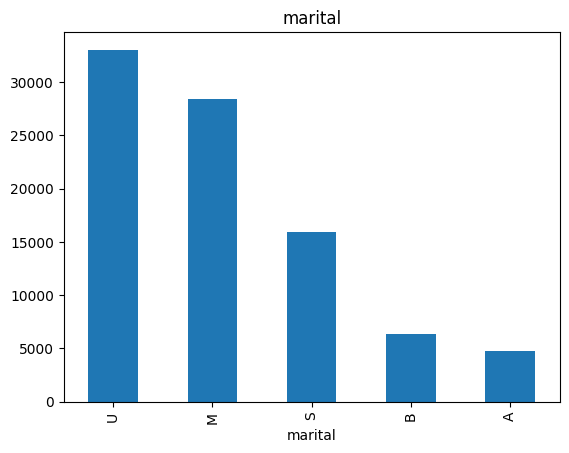

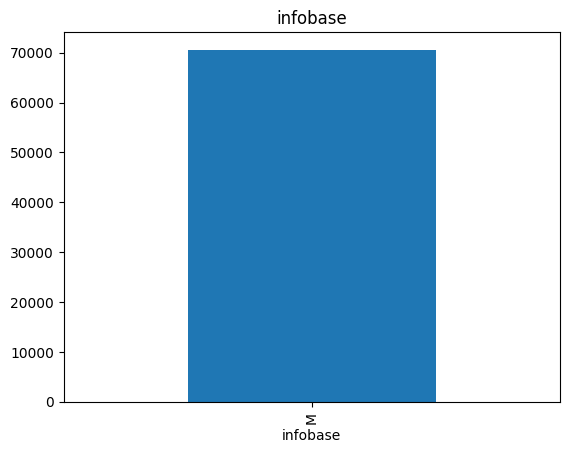

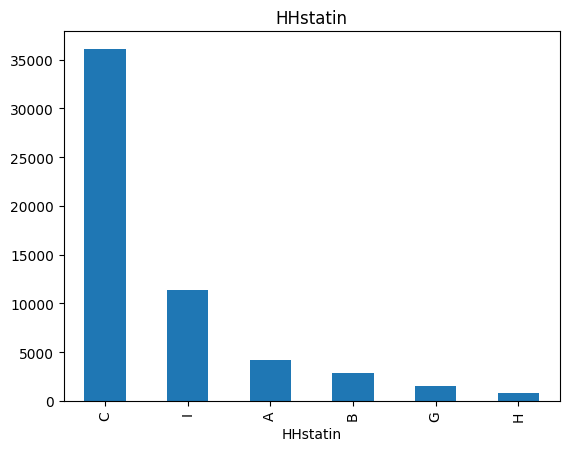

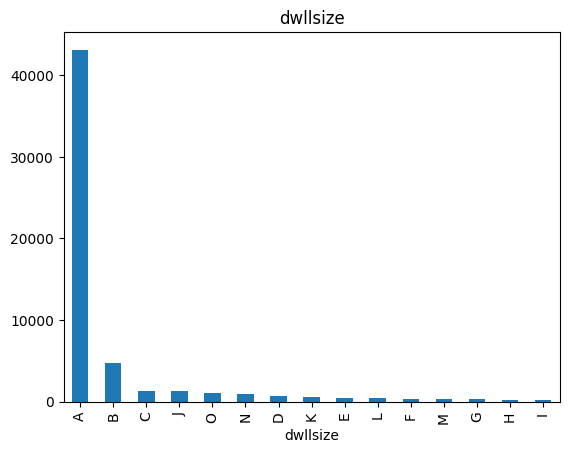

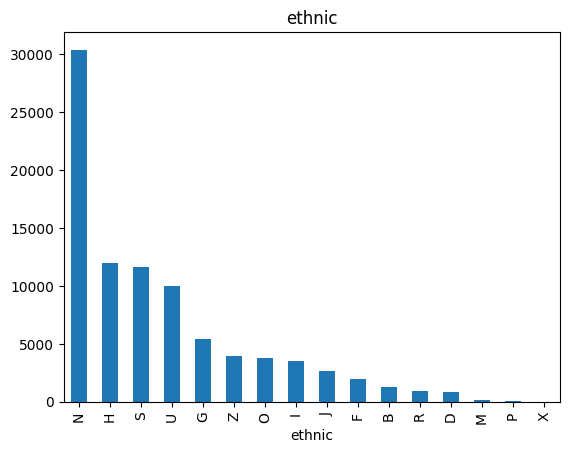

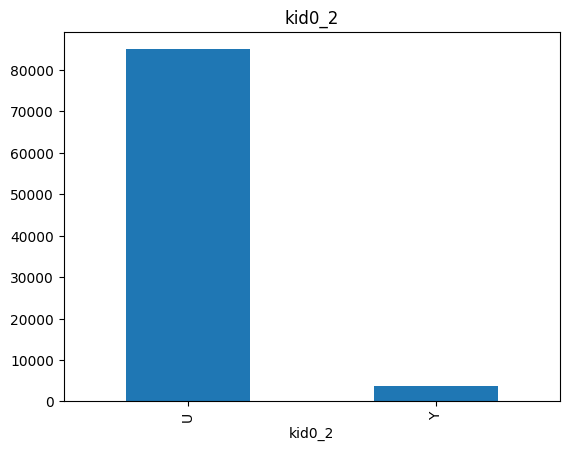

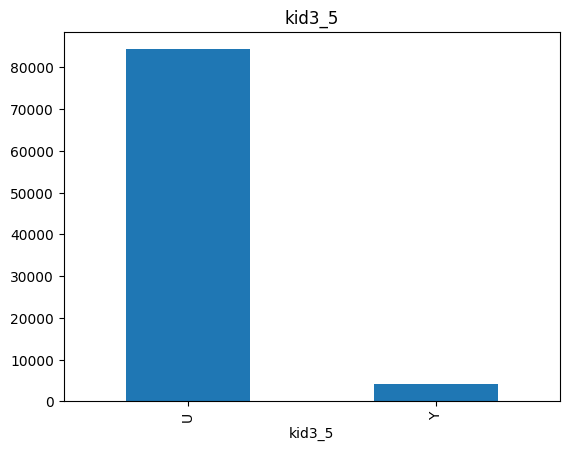

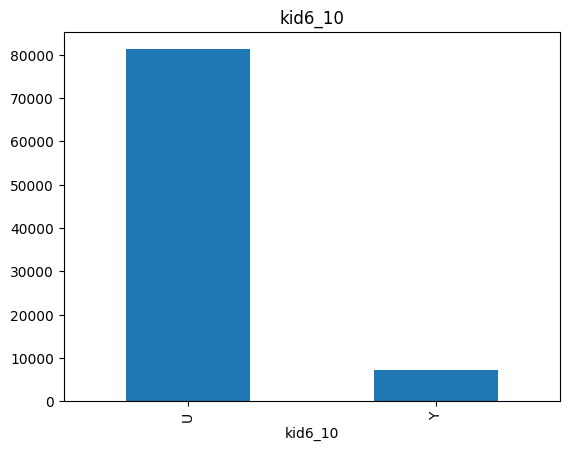

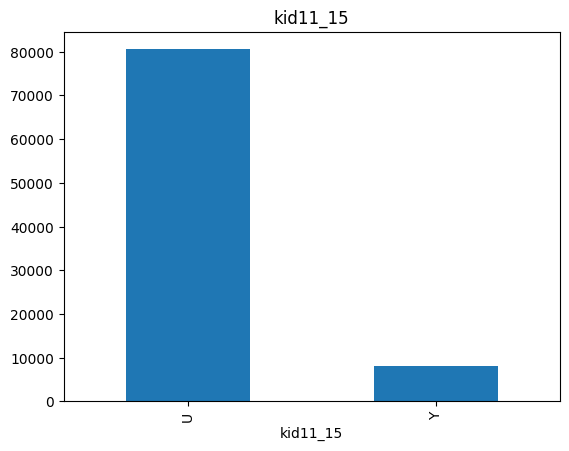

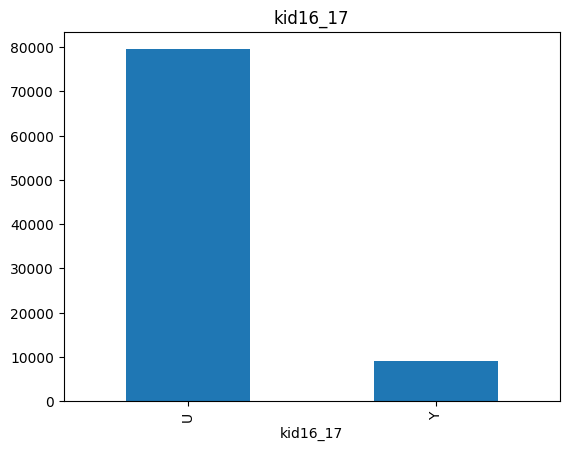

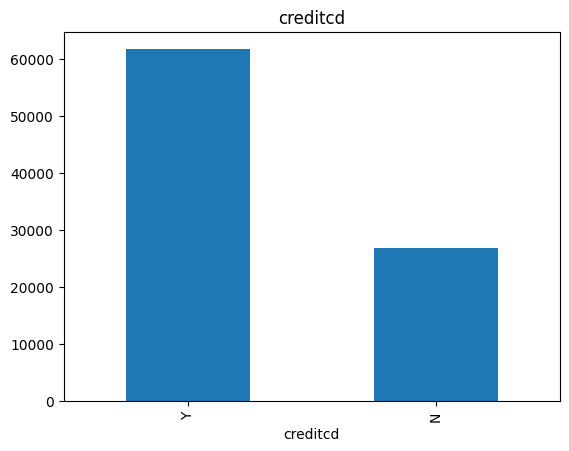

In [ ]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns = df_entrenar.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_entrenar[column].value_counts().plot(kind='bar', title=column)
    plt.show()

In [ ]:
#Tras analizar las columnas categóricas vemos que la gran mayoría no tienen datos fuera de lo común pero que hay columans
#como "infobase" que solo tienen una variable y el resto son nulos.
#Otro dato a tener en cuenta es que según los datos no se tiene mucha infroamción sobre el número de hijos de los clientes.

###Analisis Univariable df_predecir

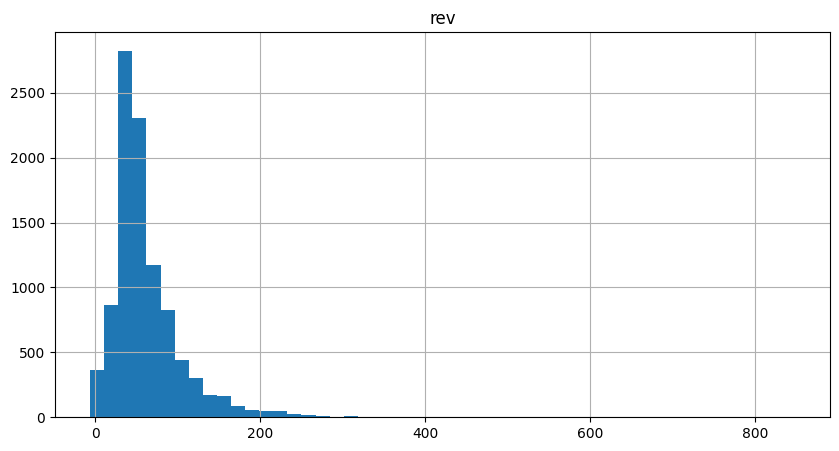

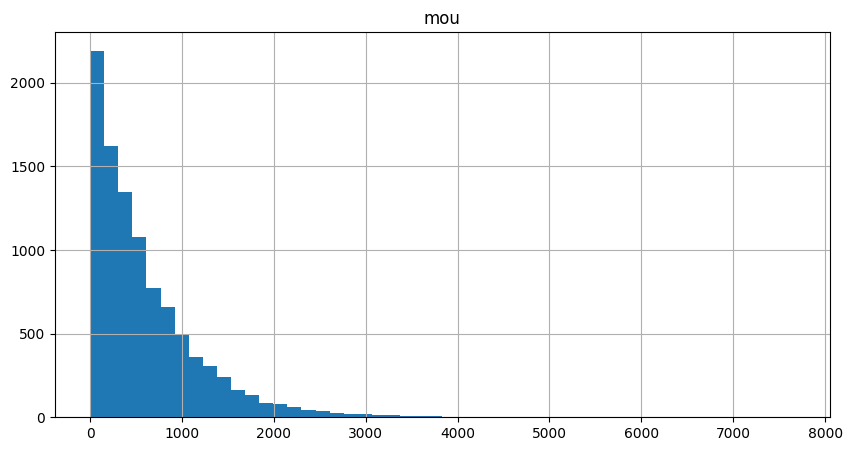

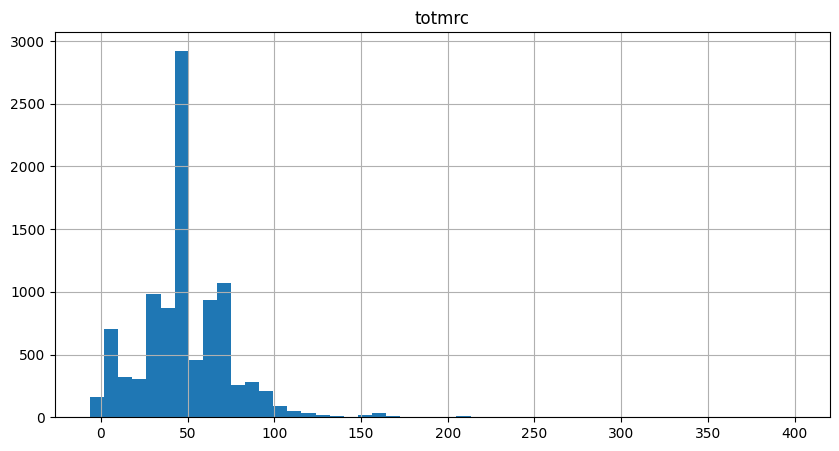

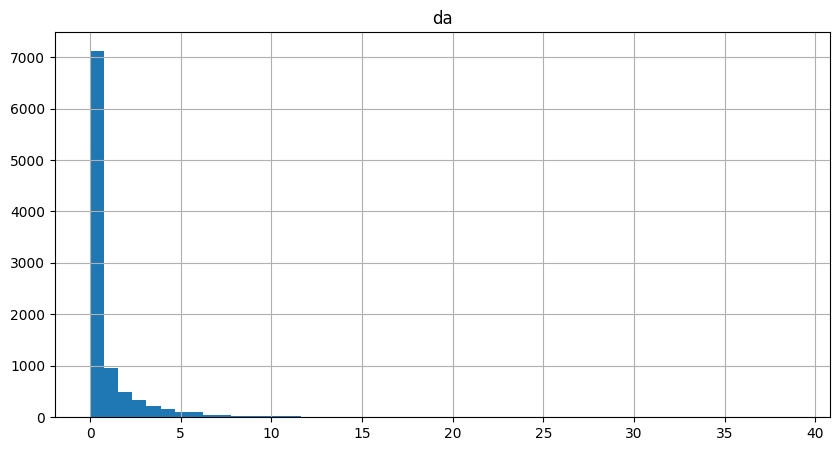

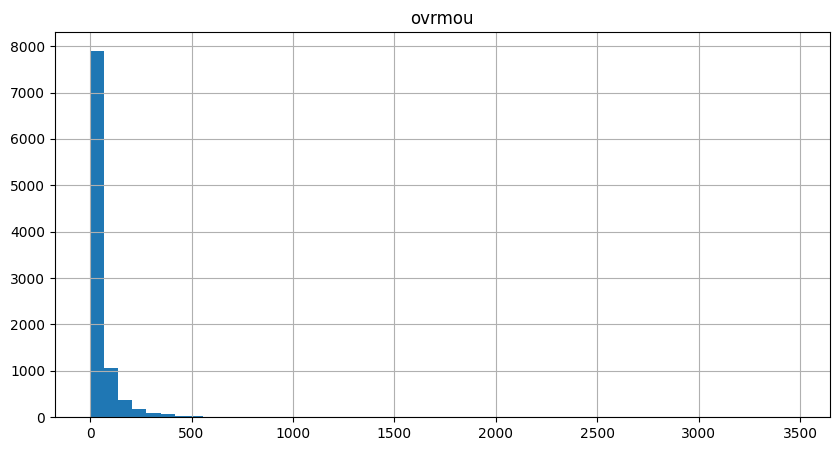

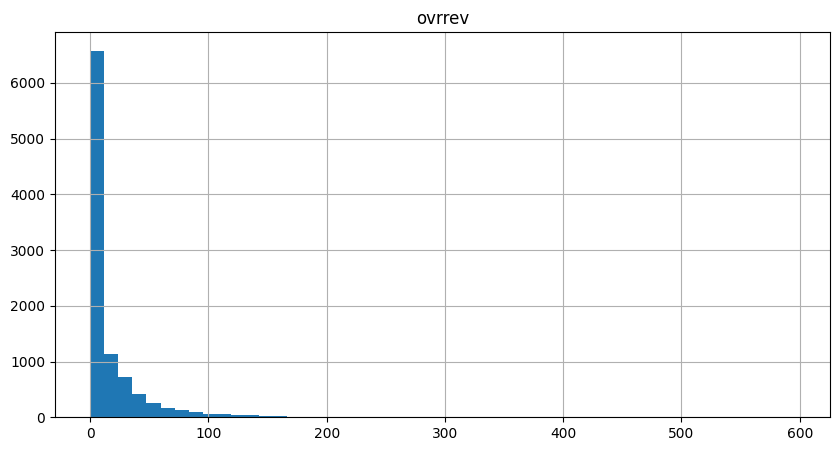

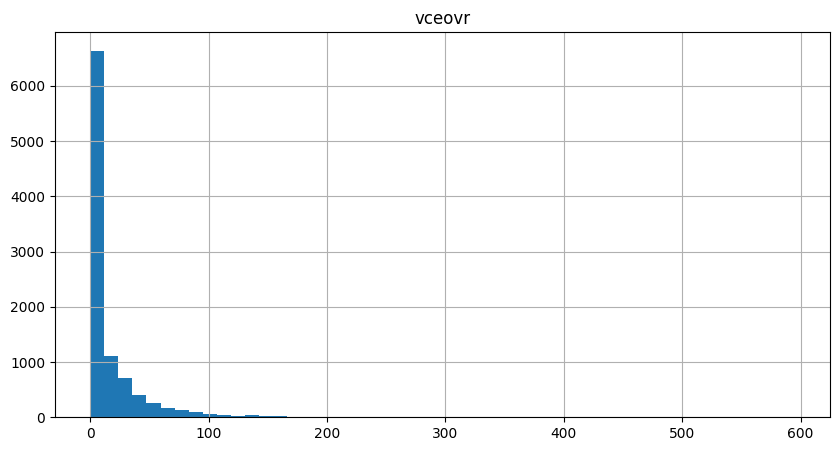

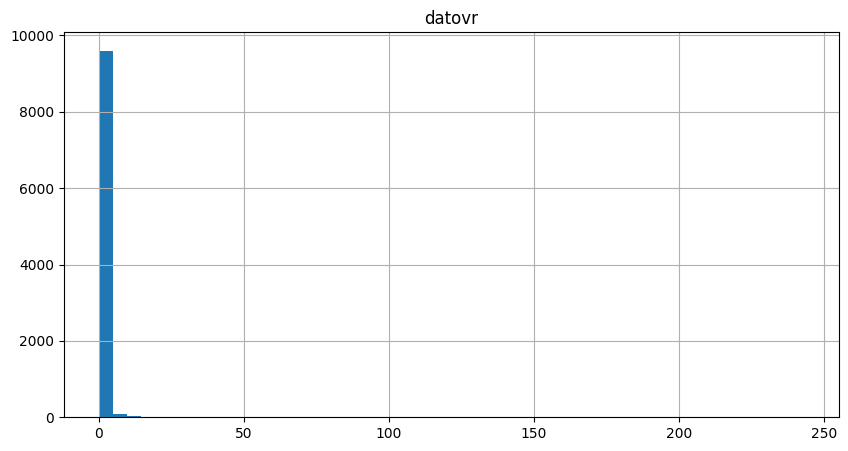

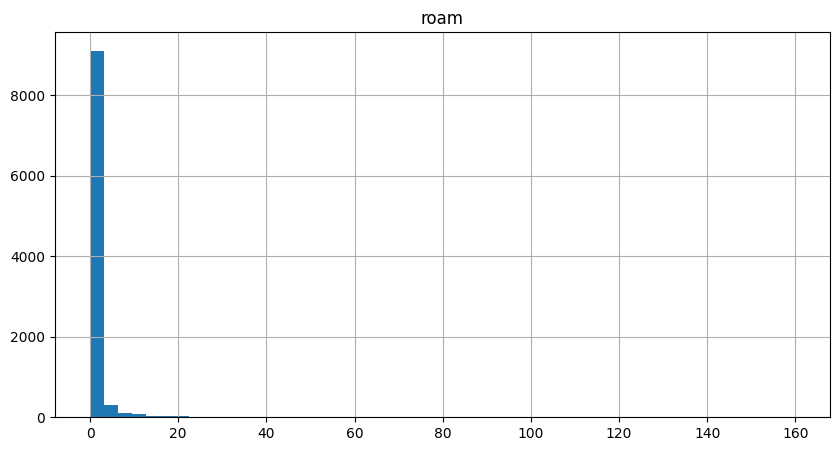

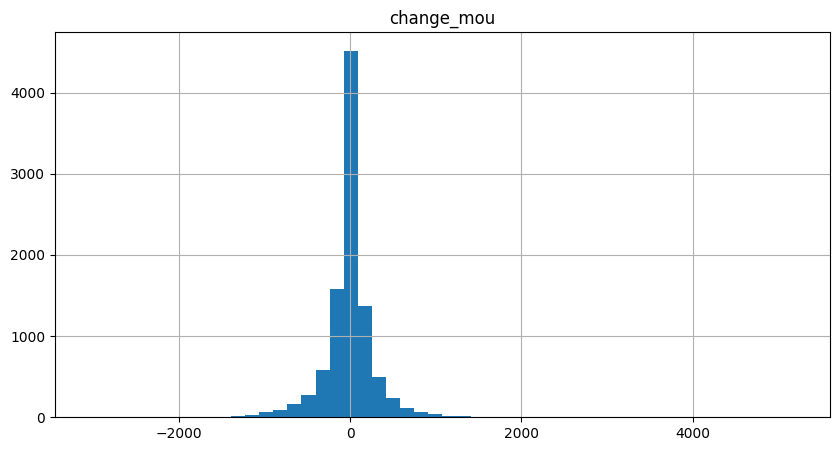

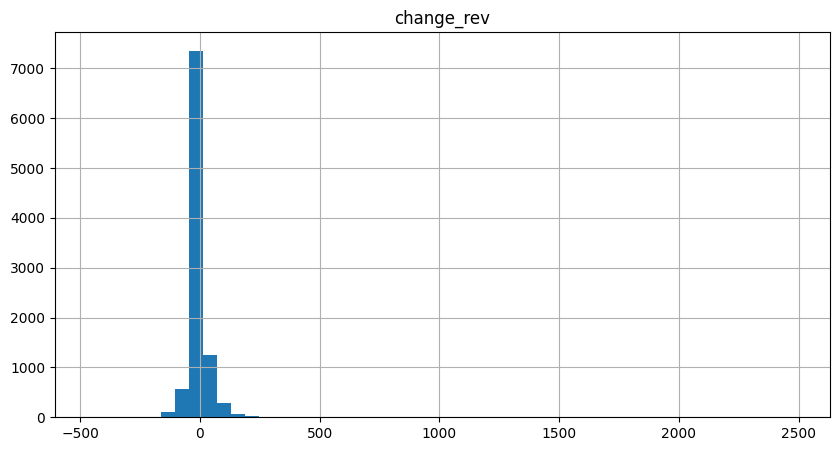

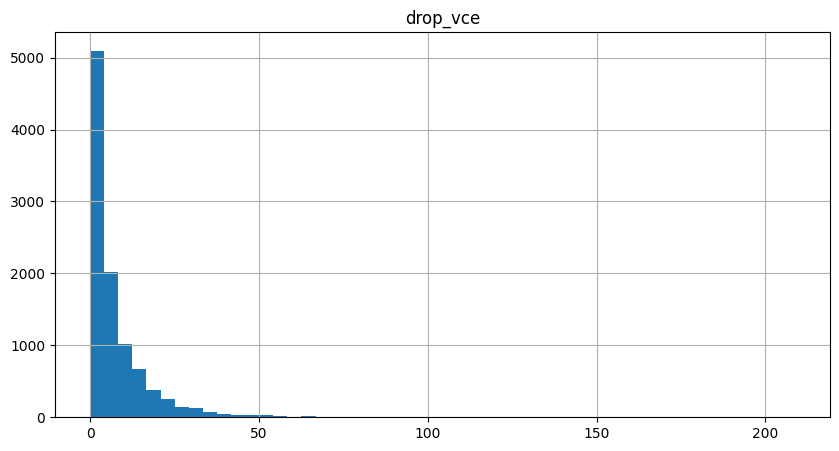

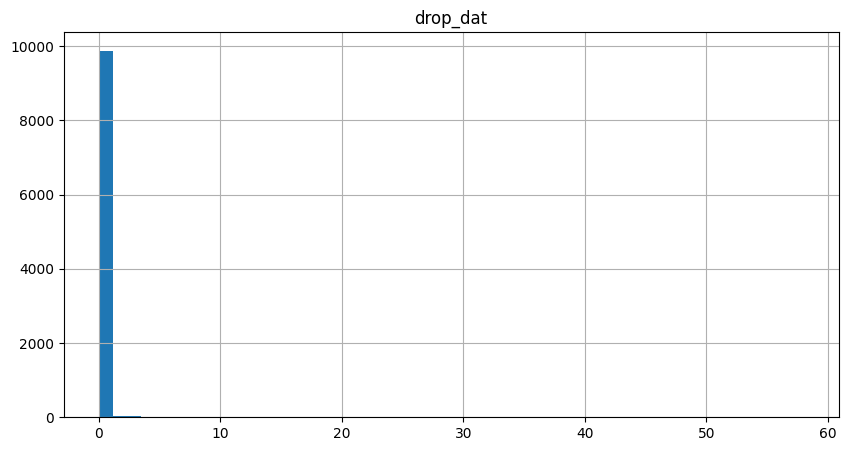

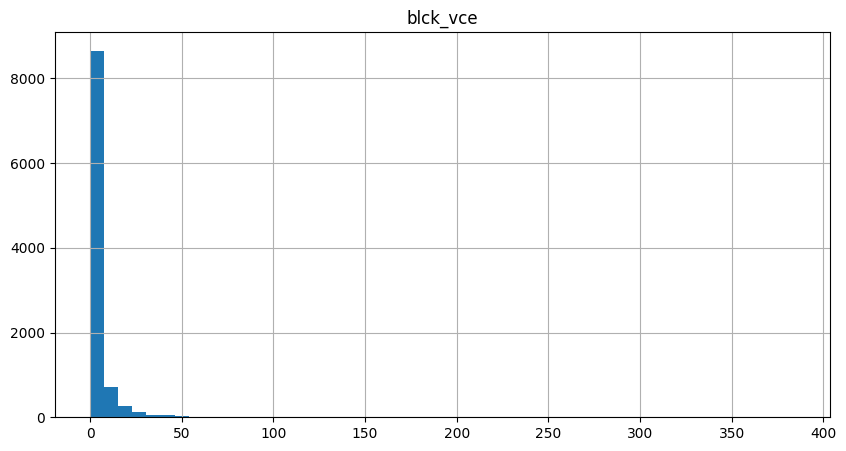

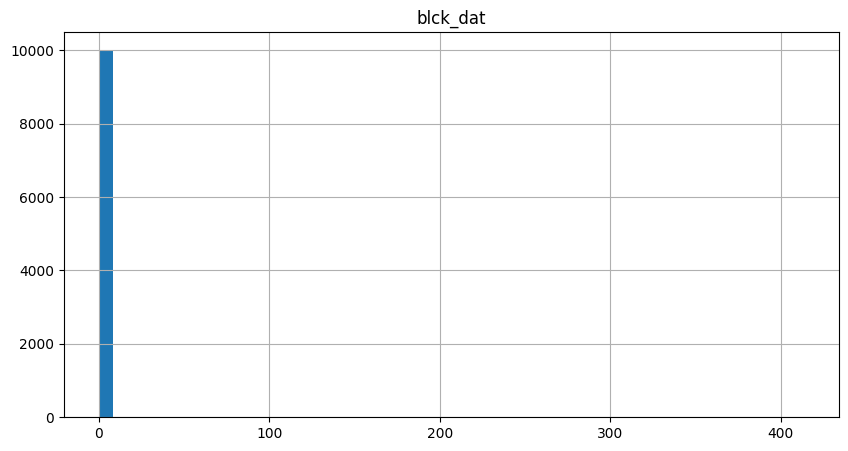

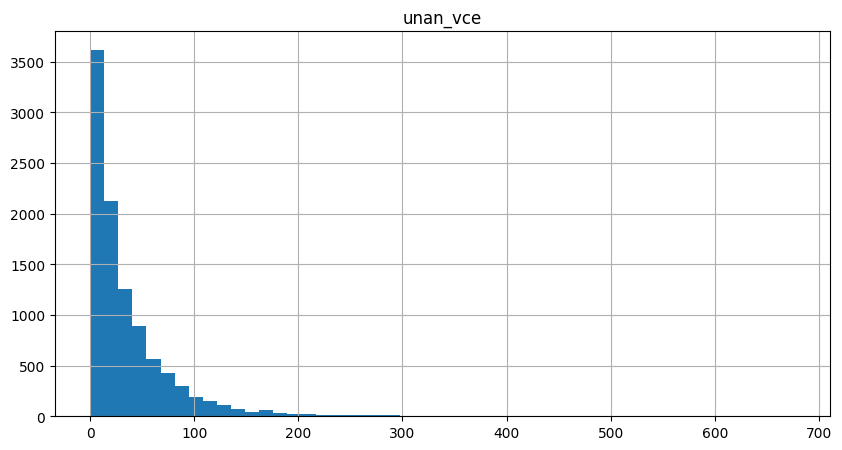

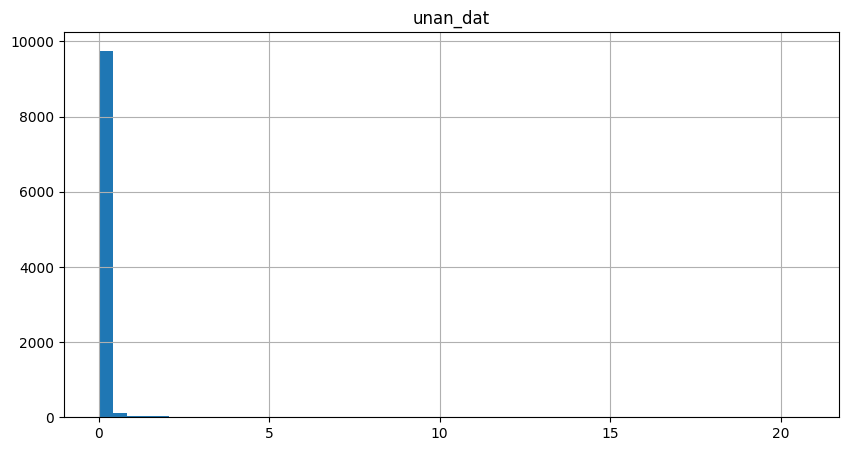

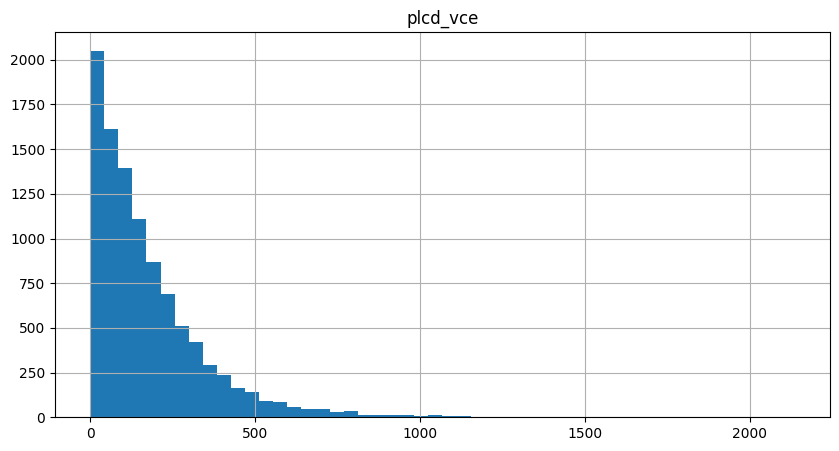

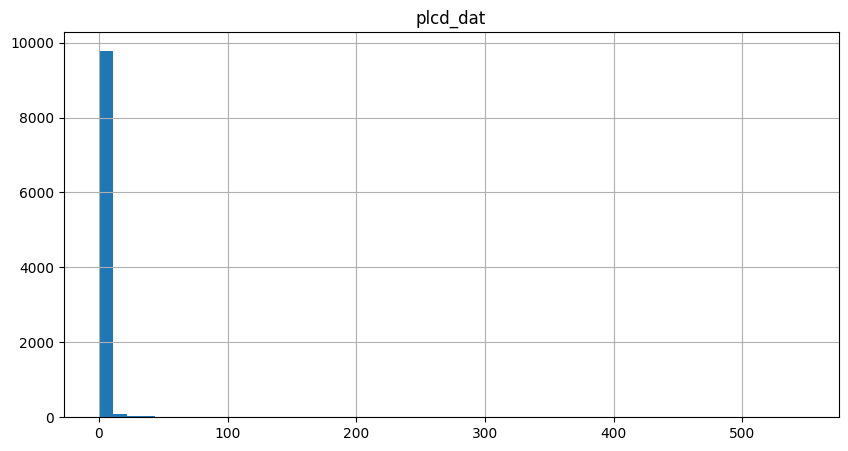

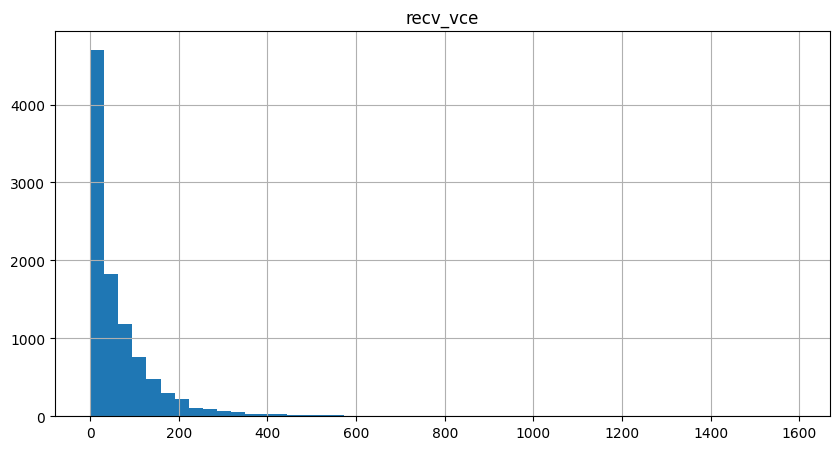

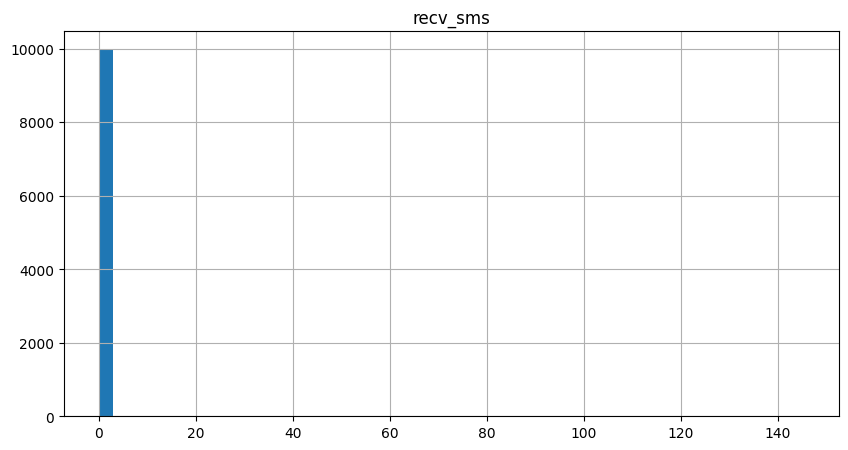

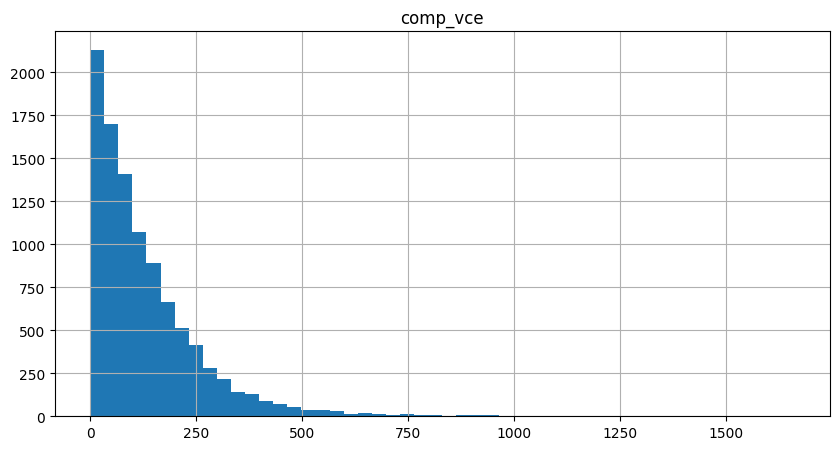

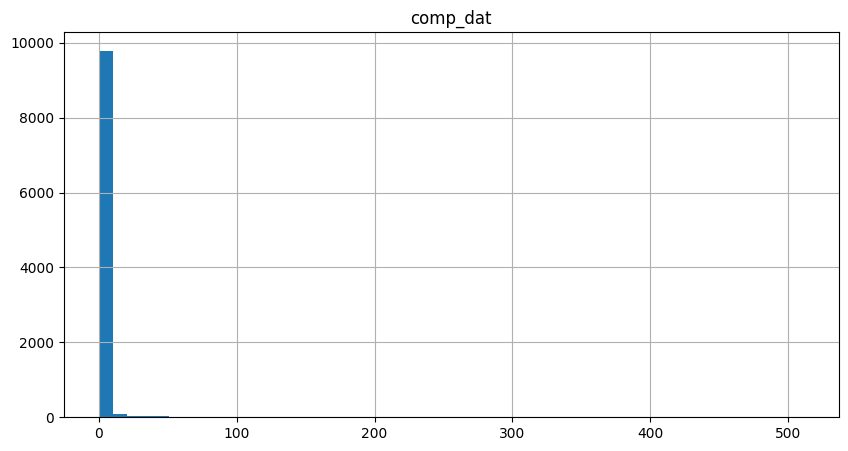

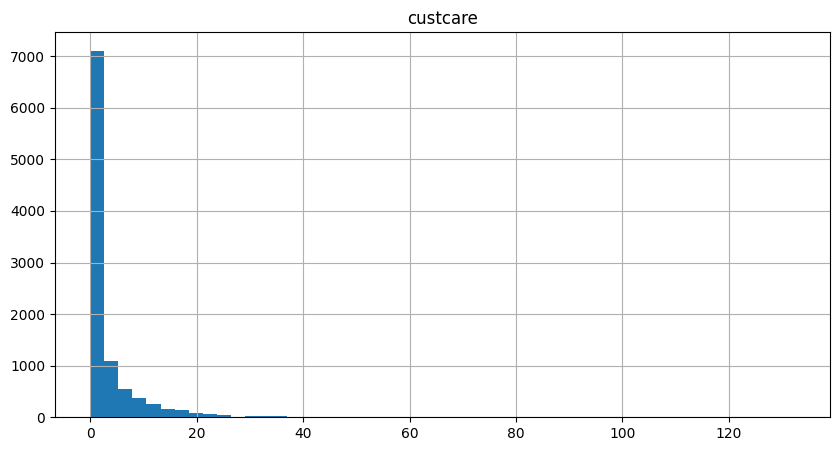

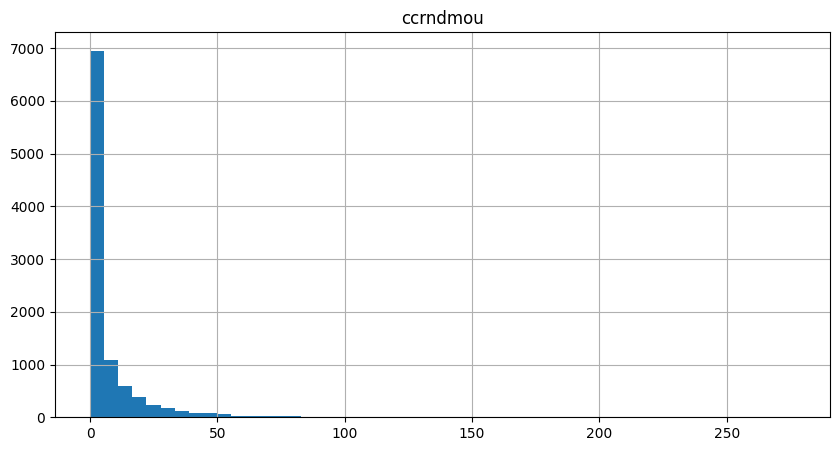

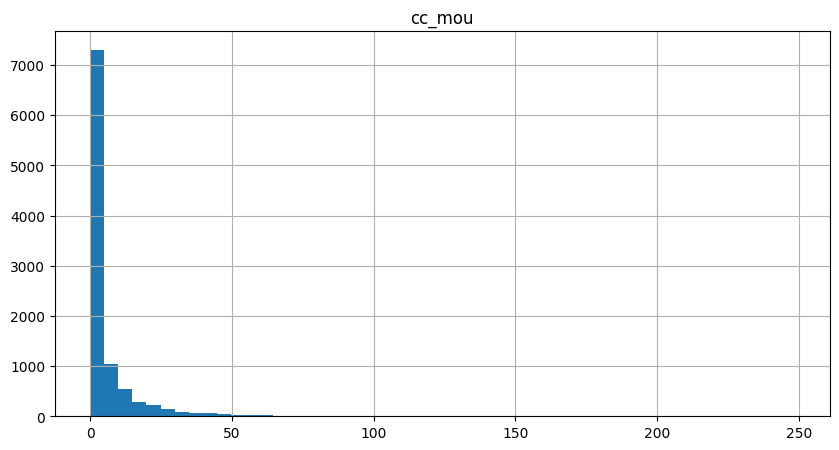

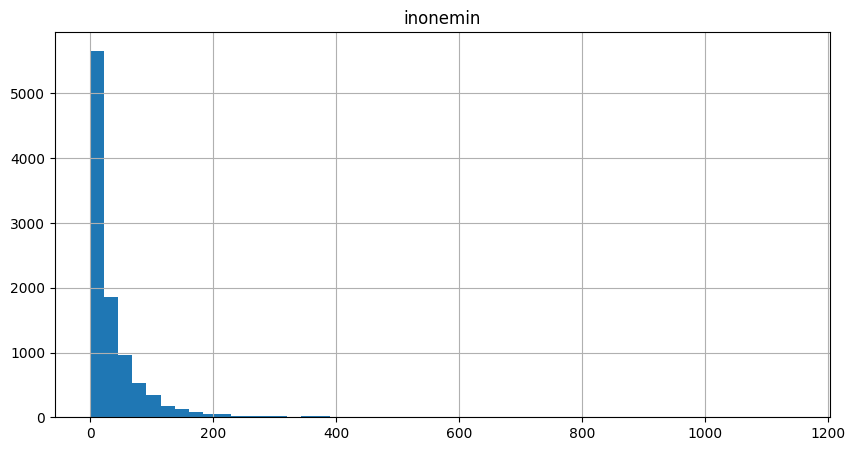

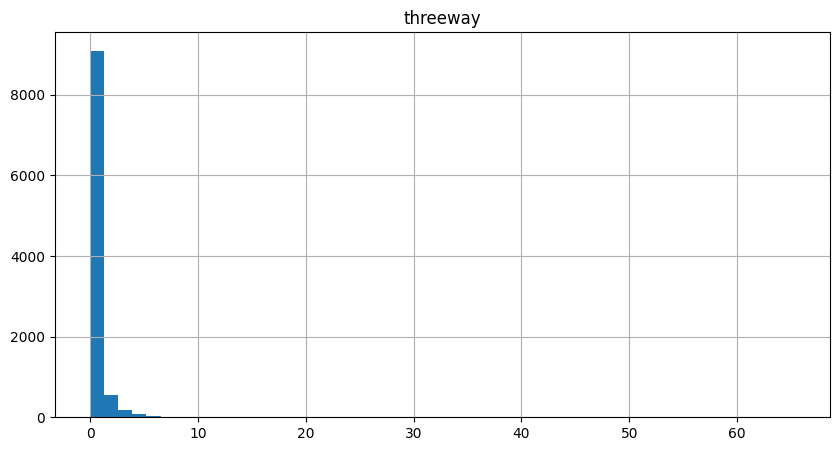

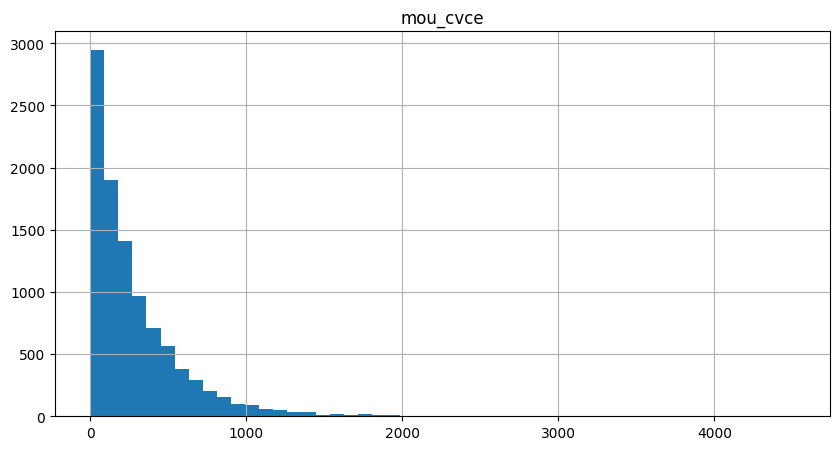

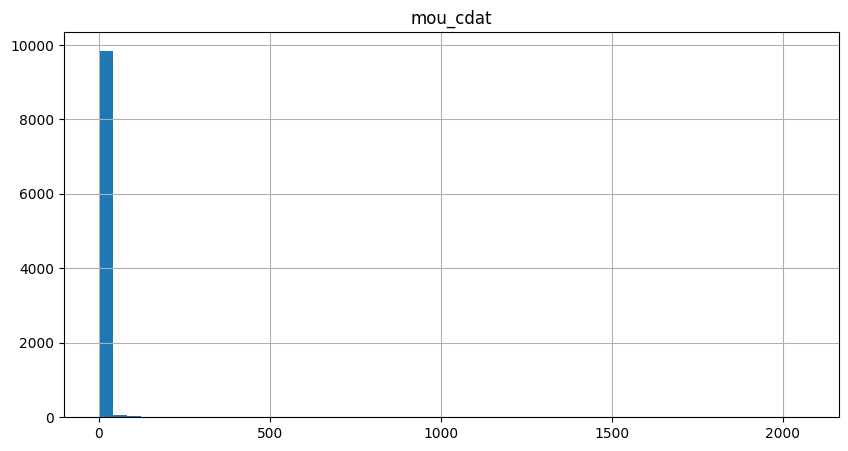

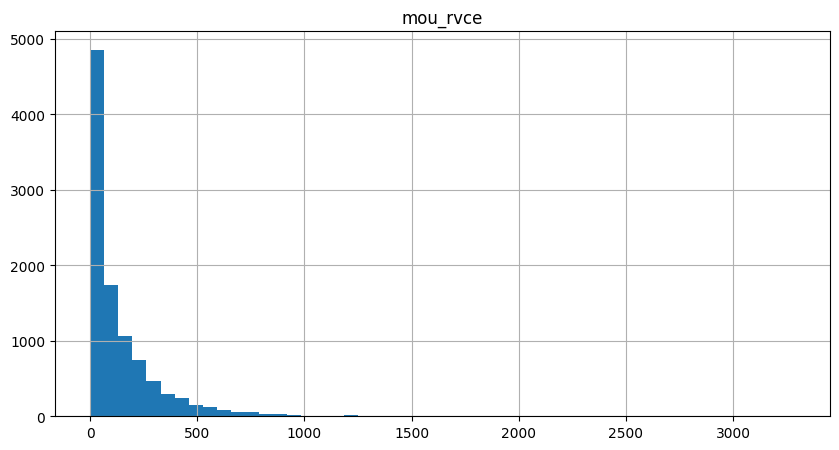

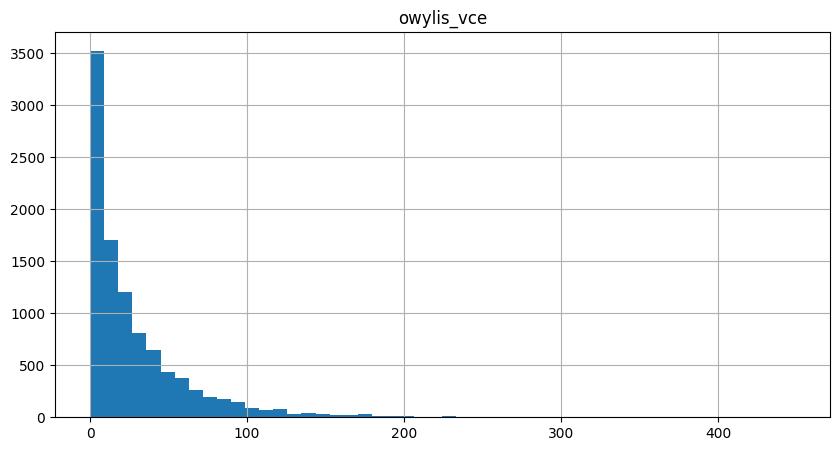

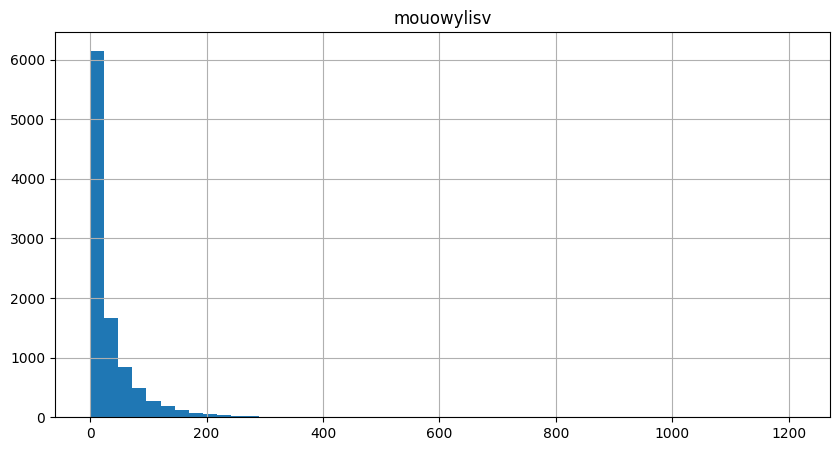

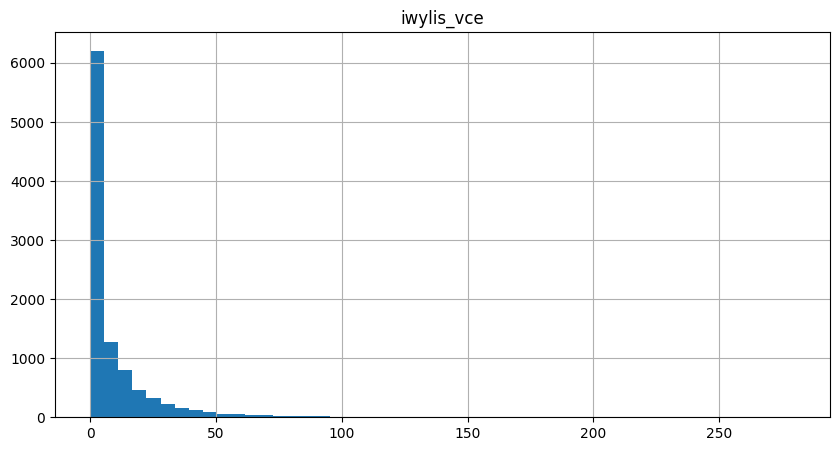

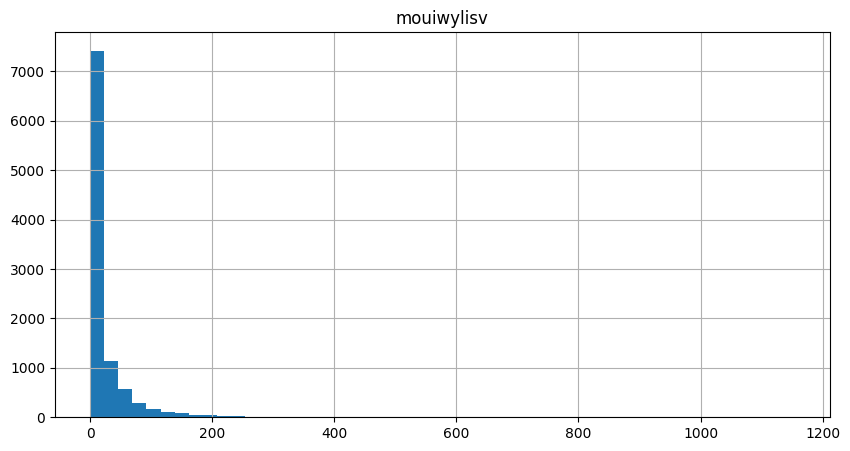

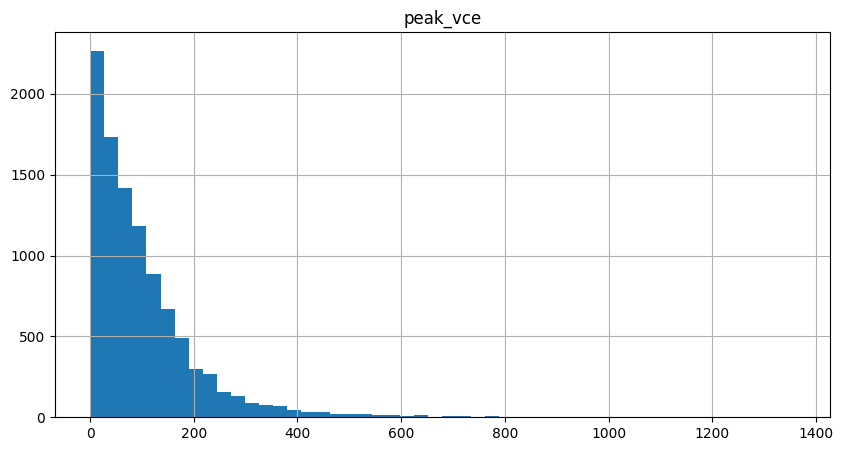

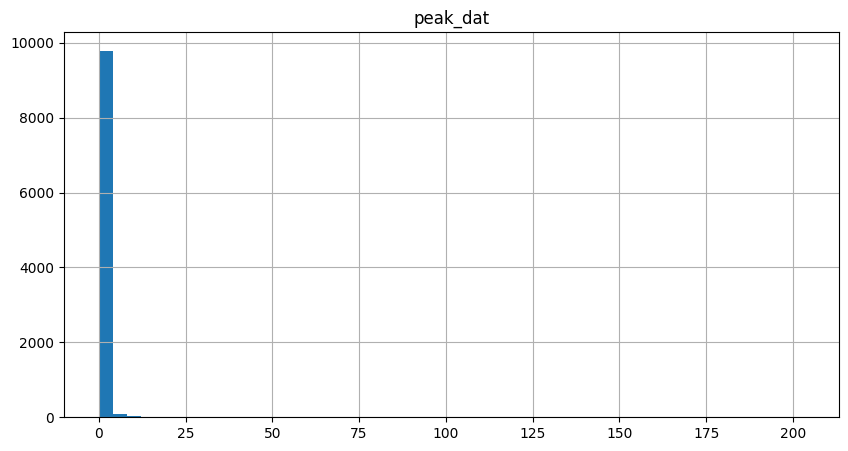

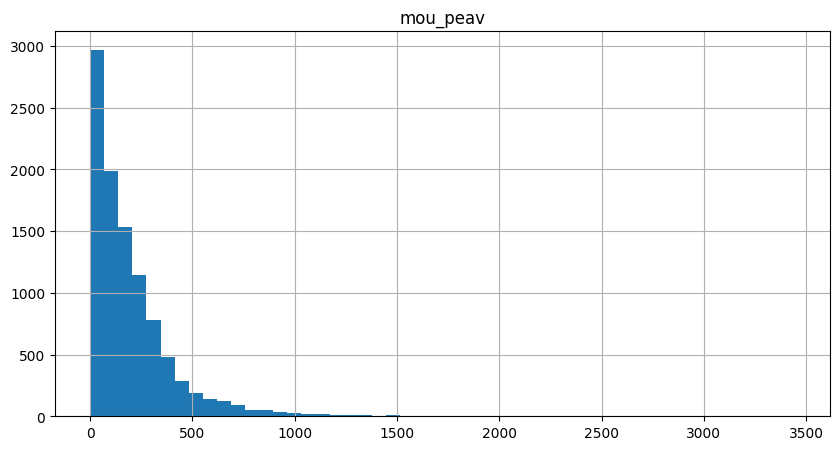

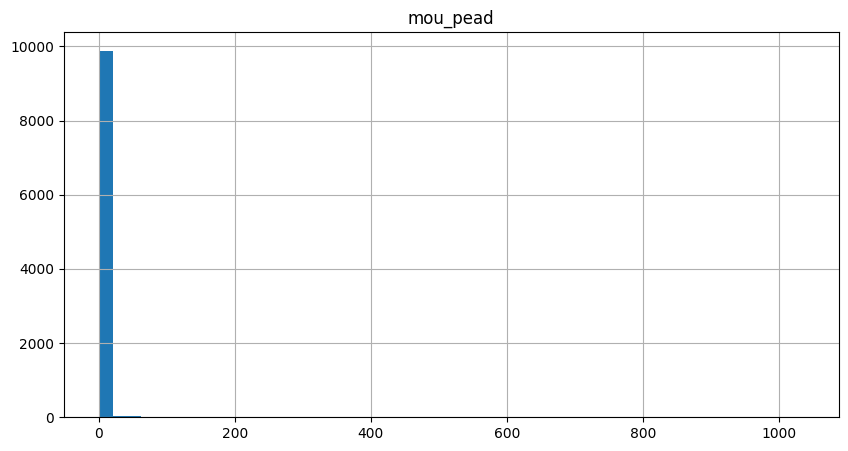

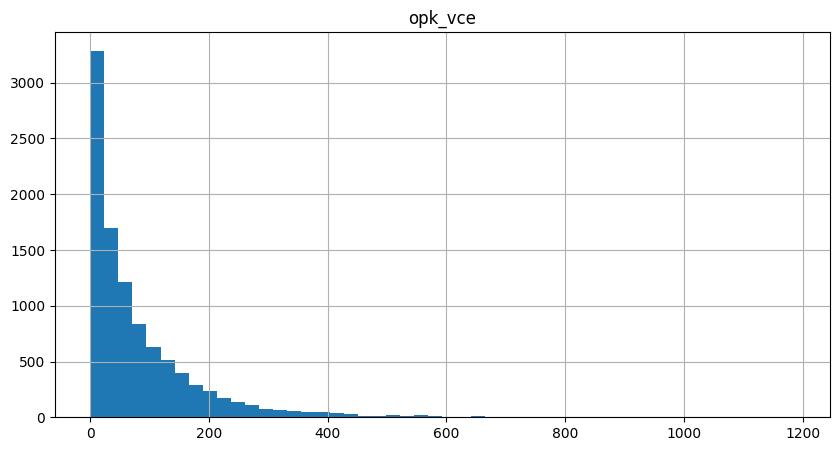

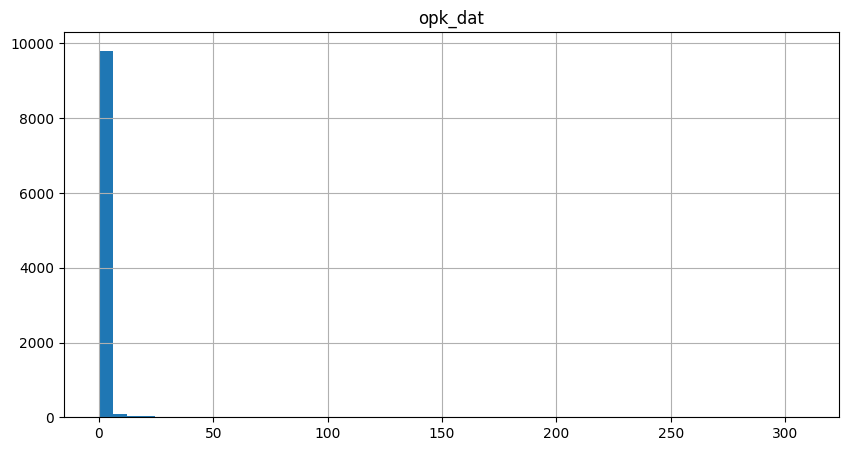

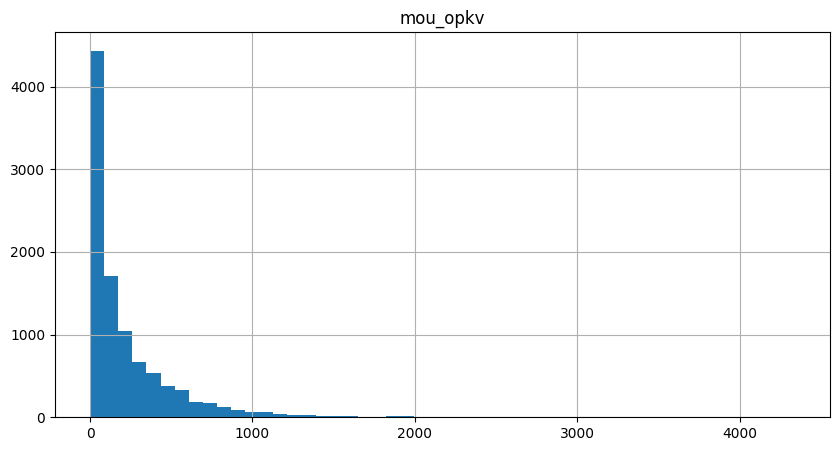

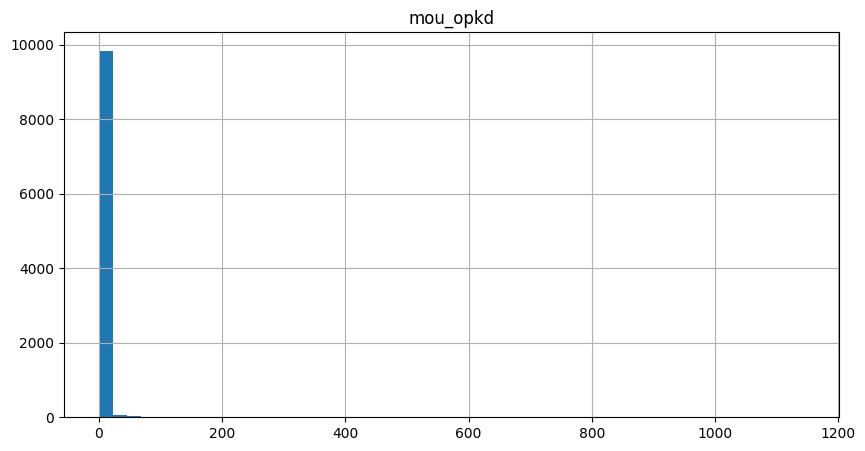

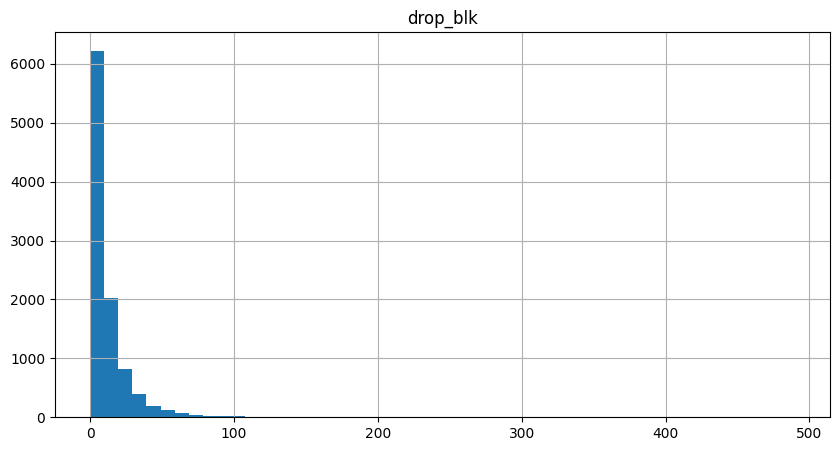

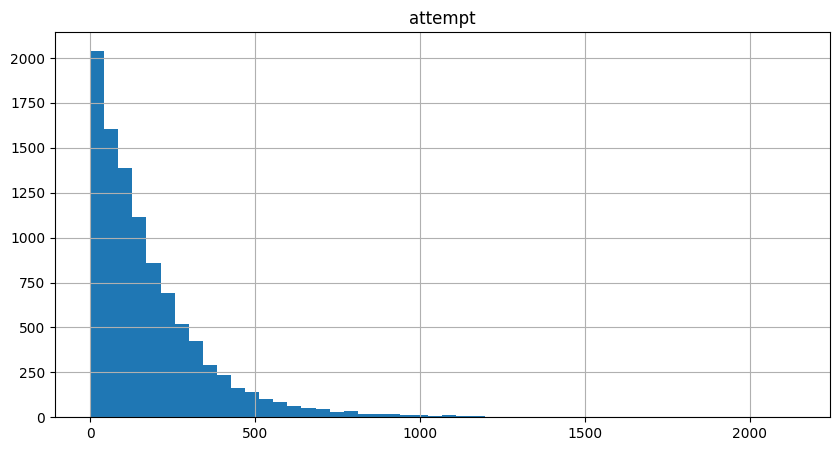

KeyboardInterrupt: 

In [ ]:
# Creamos gráficos de barras para todas las columnas numéricas
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df_predecir.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df_predecir[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [ ]:
#Después de ver los histogramas de las columnas numéricas de df_predecir nos damos cuenta que la myoría de las
#columnas tienen sus valores muy cercanos al 0.
#También nos damos cuenta de que en la columna "change_mou" (Cambio porcentual en los minutos mensuales de uso vs promedio de los tres meses anteriores)
#hay valores negativos.

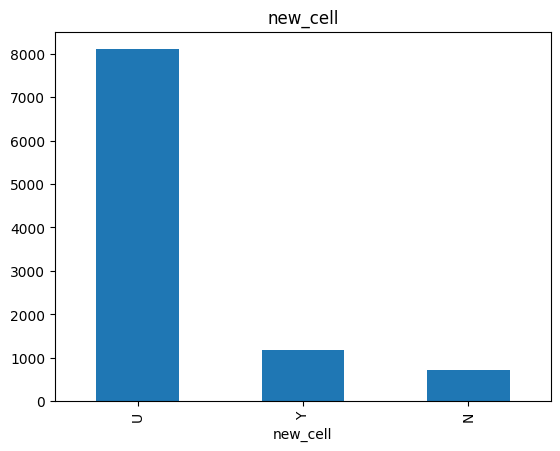

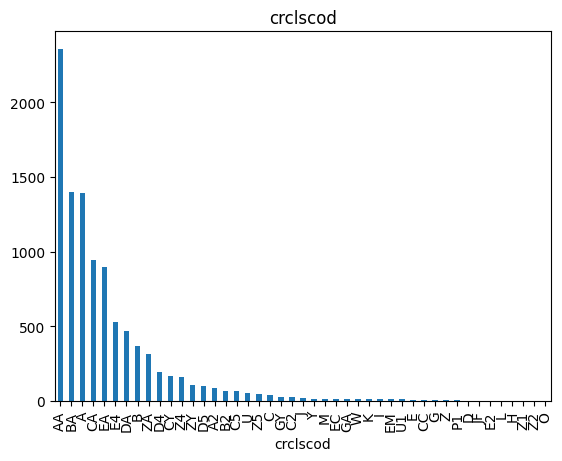

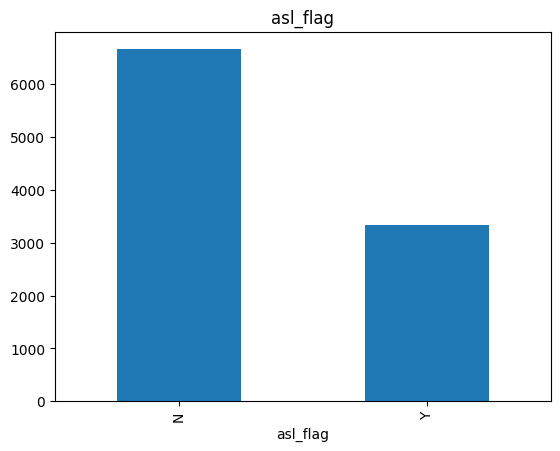

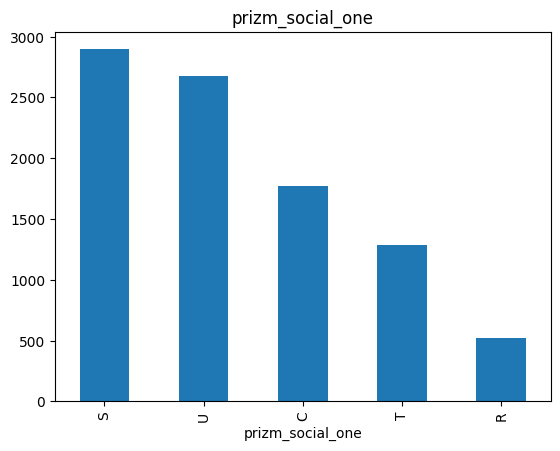

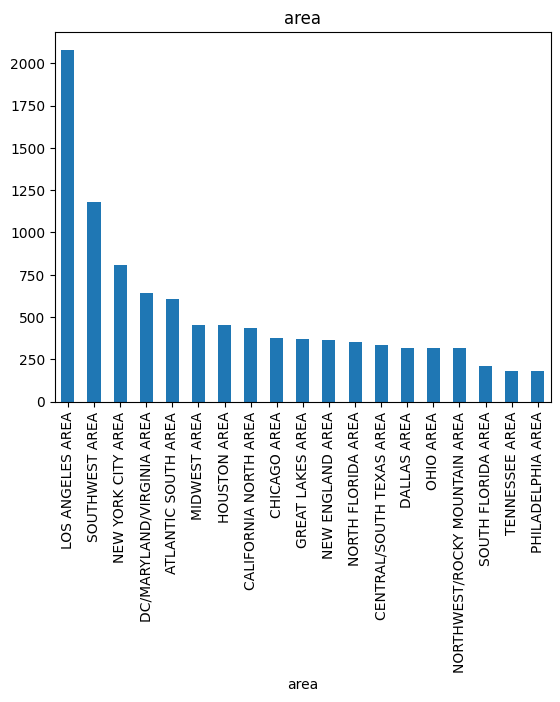

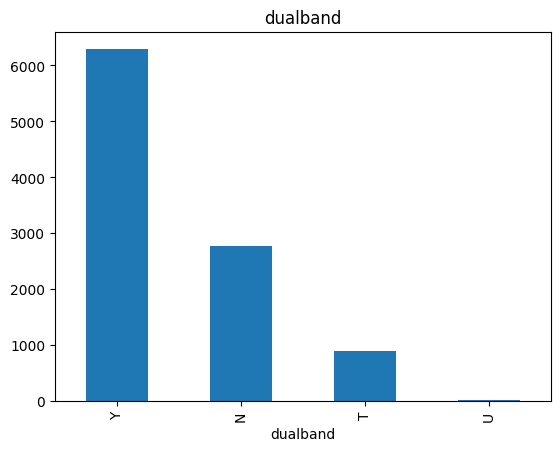

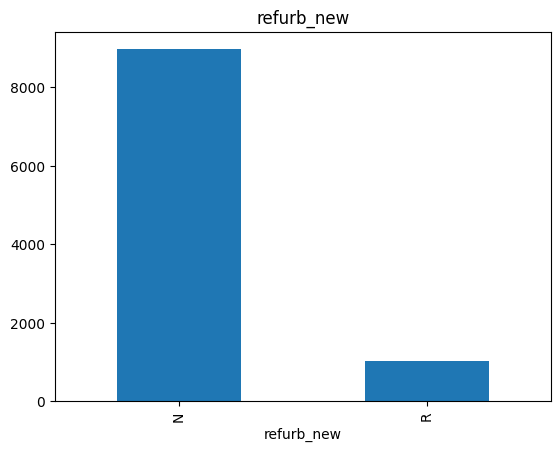

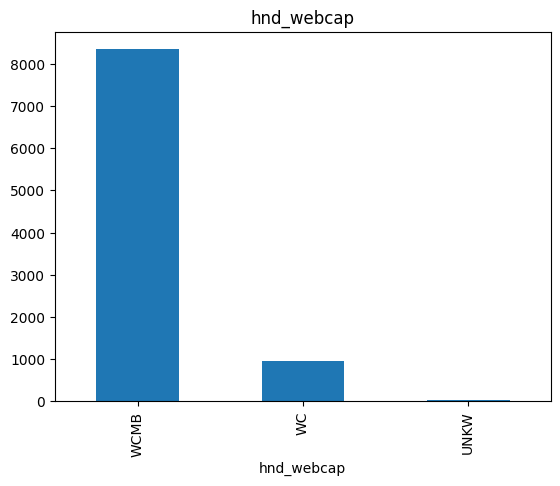

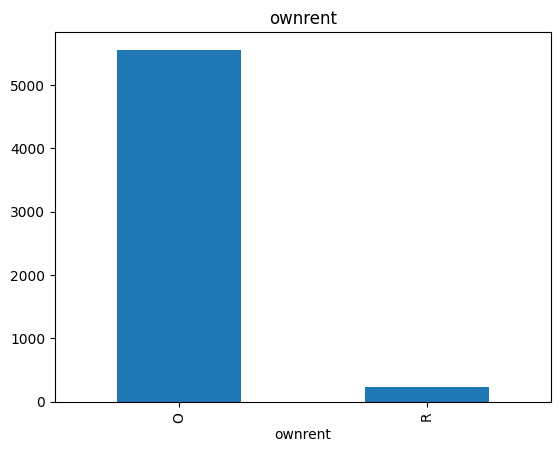

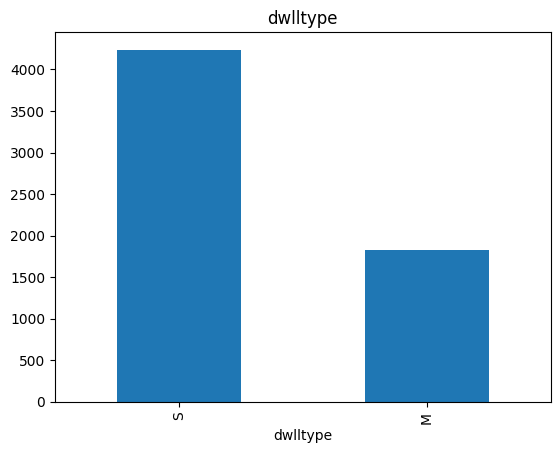

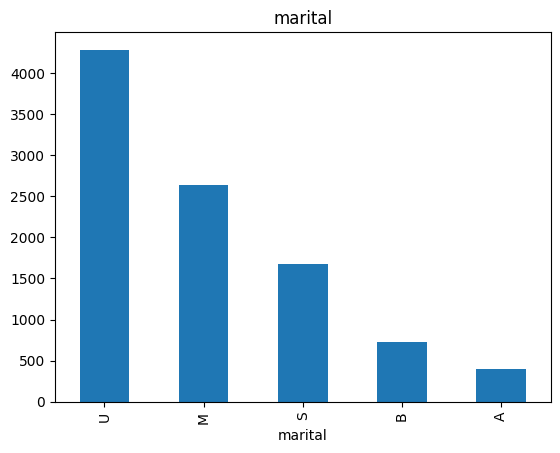

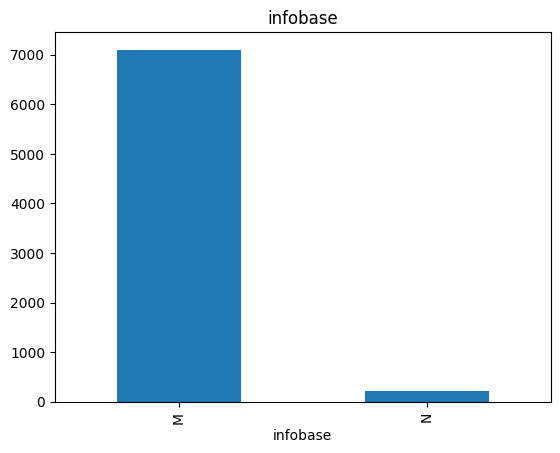

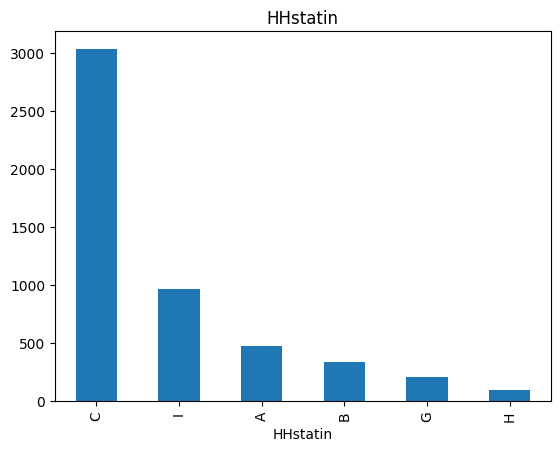

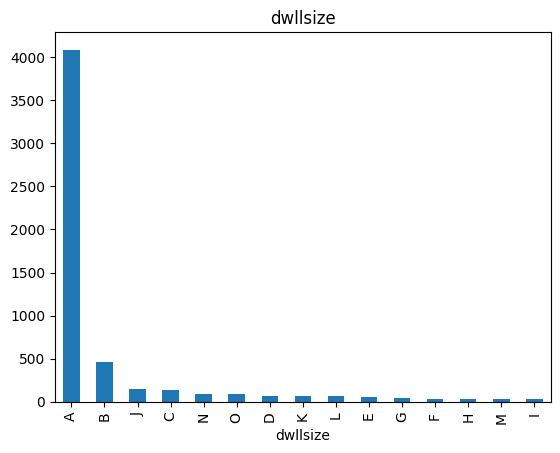

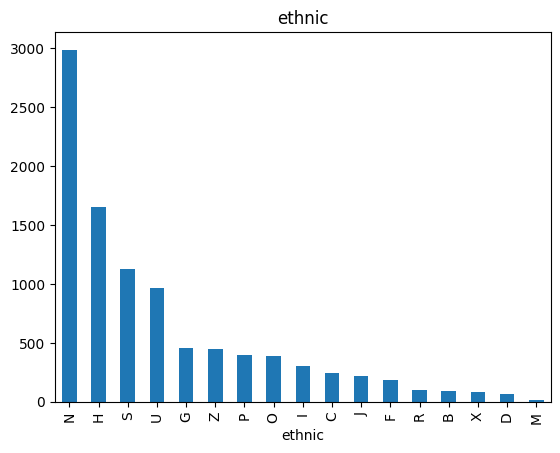

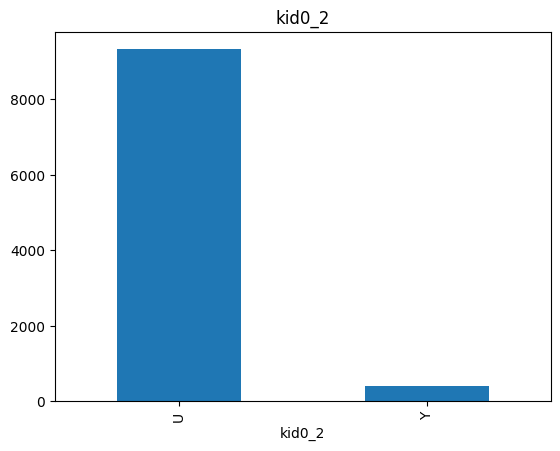

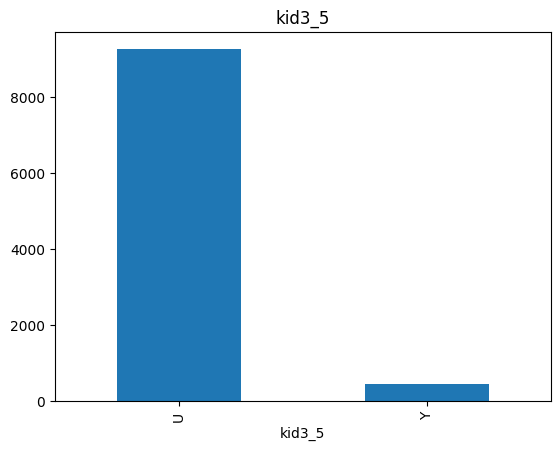

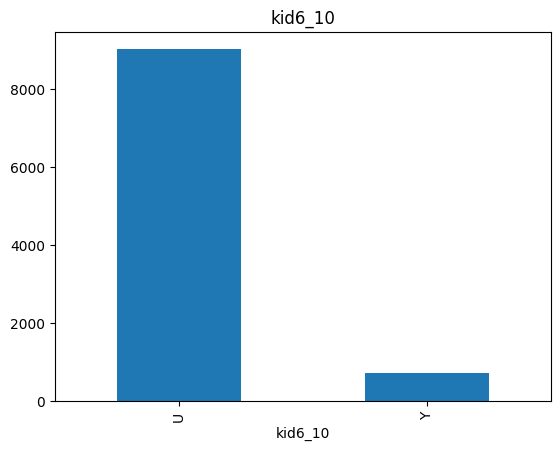

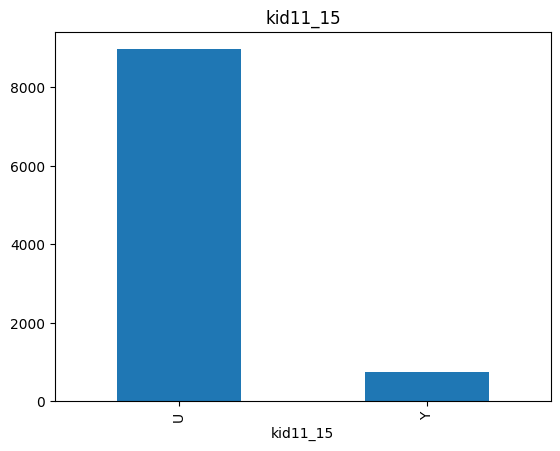

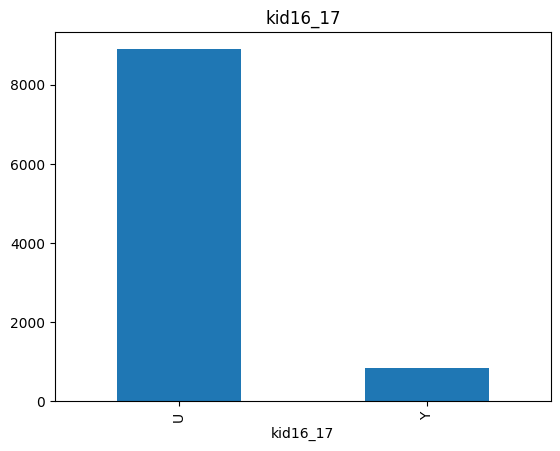

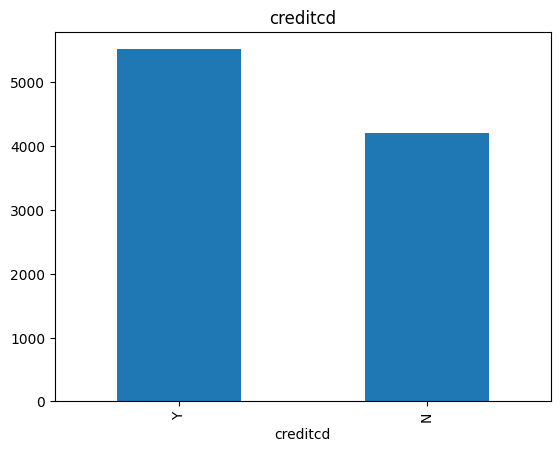

In [ ]:
# Creamos gráficos de barras para todas las columnas categóricas
categorical_columns = df_predecir.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_predecir[column].value_counts().plot(kind='bar', title=column)
    plt.show()

In [ ]:
#Tras analizar las columnas categóricas vemos que la gran mayoría no tienen datos fuera de lo común pero que hay columans
#como "infobase" que solo tienen una variable y el resto son nulos.
#Otro dato a tener en cuenta es que según los datos no se tiene mucha infroamción sobre el número de hijos de los clientes.

## Analisis Variable-Target

* Relacion target-variable

In [ ]:
#A continuación, vamos a comparar las diferentes varibales con el target.

###Analisis-Target df_entrenar

<Axes: xlabel='months', ylabel='churn'>

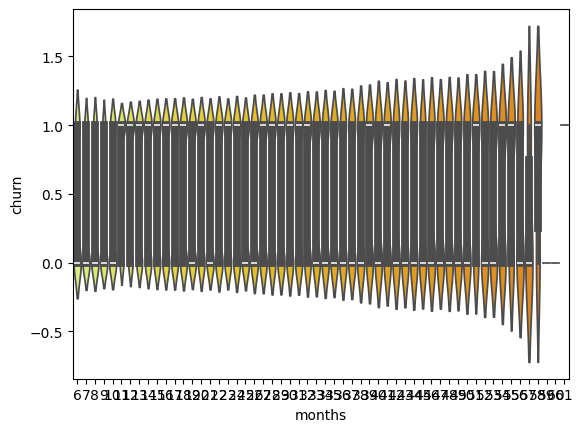

In [ ]:
sns.violinplot(x="months",y="churn", data=df_entrenar, palette="Wistia")

<Axes: xlabel='actvsubs', ylabel='churn'>

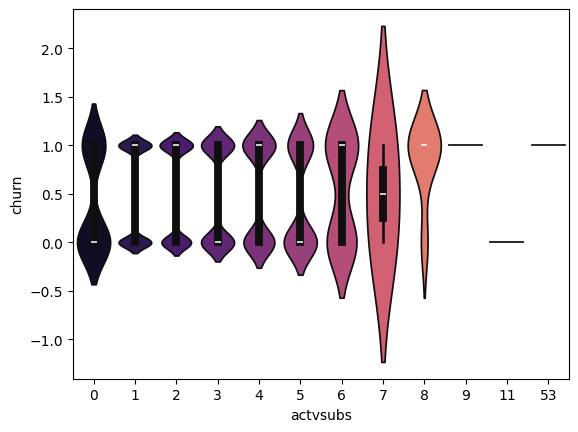

In [ ]:
sns.violinplot(x="actvsubs",y="churn", data=df_entrenar, palette="magma")

<Axes: xlabel='new_cell', ylabel='churn'>

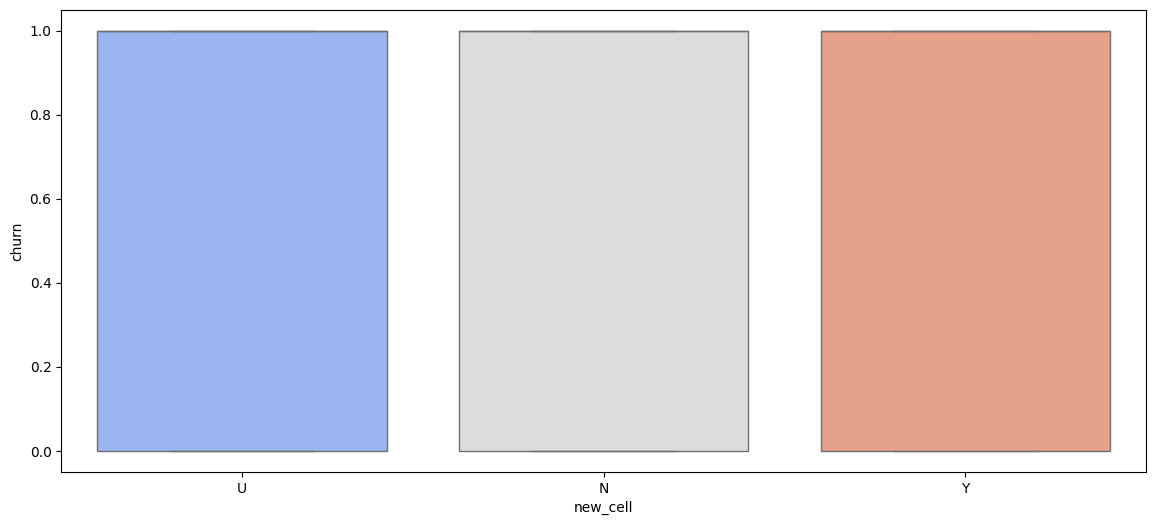

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x="new_cell",y="churn",  data=df_entrenar, palette="coolwarm")

<Axes: xlabel='asl_flag', ylabel='churn'>

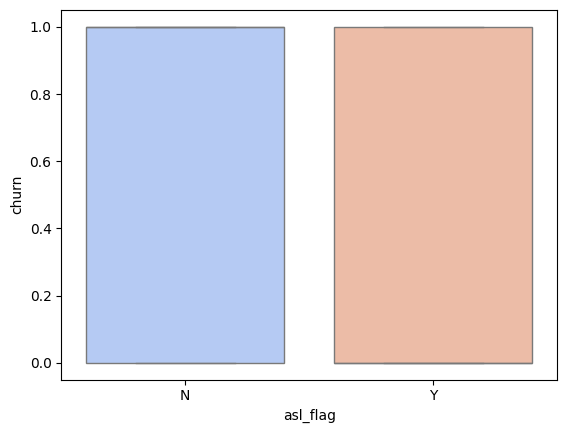

In [ ]:
sns.boxplot(x="asl_flag",y="churn",  data=df_entrenar, palette="coolwarm")

In [ ]:
sns.scatterplot(x="totrev", y="churn", hue="months",data=df_entrenar)

<Axes: xlabel='totrev', ylabel='churn'>

Error in callback <function flush_figures at 0x7ff6f2133a30> (for post_execute):


KeyboardInterrupt: 

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [418]:
#PRIMERO HAY QUE ORDENAR LA COLUMNA CUSTOMER_ID Y DESPUÉS QUITARLA PARA VOLVER A PONERLA AL FINAL PARA QUE NO SE PIERDA EL ORDEN

In [419]:
# Reordenar las columnas
df_entrenar = df_entrenar[['Customer_ID'] + [col for col in df_entrenar.columns if col != 'Customer_ID']]

In [420]:
# Reordenar las columnas
df_predecir = df_predecir[['Customer_ID'] + [col for col in df_predecir.columns if col != 'Customer_ID']]

In [421]:
#Vamos a ver si hay duplciados, filas vacias, columnas vacias o filas sin target. EN LOS DOS DATAFRAME

In [422]:
df_entrenar[df_entrenar.duplicated(keep=False)]
#Vemos que no hay ningún duplicado en el dataframe df_entrenar

,Customer_ID,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [423]:
df_predecir[df_predecir.duplicated(keep=False)]
#Vemos que no hay ningún duplicado en el dataframe df_predecir

,Customer_ID,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [424]:
#Vamos a comprobar si hay o no columnas enteras con nulos o con al menos un 70% de nulos en ellas.

In [425]:
#df_entrenar

In [426]:
# Identificar columnas completamente vacías
columns_all_null = df_entrenar.columns[df_entrenar.isnull().all()].tolist()

# Identificar columnas con al menos 70% de valores nulos
columns_70_percent_null = df_entrenar.columns[df_entrenar.isnull().mean() >= 0.7].tolist()


In [427]:
# Mostrar las columnas
columns_all_null
columns_70_percent_null

[]

In [428]:
#Hemos visto que no hay columnas enteras o que tengan al menos un 70% de nulos.

In [429]:
#df_predecir

In [430]:
# Identificar columnas completamente vacías
columns_all_null_1 = df_entrenar.columns[df_entrenar.isnull().all()].tolist()

# Identificar columnas con al menos 70% de valores nulos
columns_70_percent_null_1 = df_entrenar.columns[df_entrenar.isnull().mean() >= 0.7].tolist()

In [431]:
#Mostrar las columnas
columns_all_null_1
columns_70_percent_null_1

[]

In [432]:
#Hemos visto que no hay columnas enteras o que tengan al menos un 70% de nulos.

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

##Nulos df_entrenar

In [433]:
#Queremos ver una lista de todas las columnas y sus nulos.

In [434]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [435]:
df_entrenar.isnull().sum()

Customer_ID             0
rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            595
change_rev            595
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav    

In [436]:
#Vamos a borrar nulos, solo en aquellas columans con 1500 nulos o menos. Porque representan el 1% o menos de la base de datos.

In [437]:
# Definir el umbral de nulos
umbral_nulos = 1500

# Identificar las columnas que tienen nulos entre 1 y 1500
columnas_a_limpiar = df_entrenar.columns[(df_entrenar.isnull().sum() > 0) & (df_entrenar.isnull().sum() <= umbral_nulos)]

# Eliminar las filas con valores nulos en las columnas identificadas
df_entrenar = df_entrenar.dropna(subset=columnas_a_limpiar)

columnas_a_limpiar



Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'truck', 'rv', 'marital', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5',
       'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [438]:
df_entrenar.isnull().sum()

Customer_ID             0
rev                     0
mou                     0
totmrc                  0
da                      0
ovrmou                  0
ovrrev                  0
vceovr                  0
datovr                  0
roam                    0
change_mou              0
change_rev              0
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav    

In [439]:
#Vamos a rellenar los nulos de las columnas prizm_social_one e income. Rellenamos los nulos de la columna prizm_social_one en base a la columna income y viceversa
#Para las variables de la columna prizm_social_one

# 1. Calculate the average income for each prizm_social_one group
average_income_by_social = df_entrenar.groupby('prizm_social_one')['income'].mean()

In [440]:
average_income_by_social

prizm_social_one
C    5.445716
R    5.191052
S    6.331344
T    6.154543
U    5.269104
Name: income, dtype: float64

In [441]:
# Create a Series from this dictionary to easily use it in calculations
average_income_by_social_series = pd.Series(average_income_by_social)
# 1. Fill missing values in the income column
def fill_income(row):
    if pd.isnull(row['income']):
        if row['prizm_social_one'] in average_income_by_social_series:
            return average_income_by_social_series[row['prizm_social_one']]
    return row['income']
df_entrenar['income'] = df_entrenar.apply(fill_income, axis=1)
# 2. Fill missing values in the prizm_social_one column based on income brackets
def impute_prizm_social(row):
    if pd.isnull(row['prizm_social_one']):
        if pd.notnull(row['income']):
            if row['income'] < average_income_by_social['R']:
                return 'R'  # Assign 'R' for the lowest income bracket
            elif row['income'] < average_income_by_social['U']:
                return 'U'  # Adjust based on your understanding of social classes and income
            elif row['income'] < average_income_by_social['C']:
                return 'C'
            elif row['income'] < average_income_by_social['T']:
                return 'T'
            else:
                return 'S'  # Assign 'S' for the highest income bracket
    return row['prizm_social_one']
df_entrenar['prizm_social_one'] = df_entrenar.apply(impute_prizm_social, axis=1)

In [442]:
df_entrenar.isnull().sum()

Customer_ID             0
rev                     0
mou                     0
totmrc                  0
da                      0
ovrmou                  0
ovrrev                  0
vceovr                  0
datovr                  0
roam                    0
change_mou              0
change_rev              0
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav    

In [443]:
#Vemos que en la columna prizm_social_one y en la columna income hay filas con nulos en las dos columnas, por lo tanto no podemos imputar esos nulos.
#Finalmente, hemos decidido eliminar los 3380 nulos que hay en cada una de las dos columnas
df_entrenar = df_entrenar.dropna(subset=['income', 'prizm_social_one'])

In [444]:
# Vamos a imputar los nulos de la columna hnd_webcap, rellenaremos los nulos con la palabra "Unknown"
df_entrenar['hnd_webcap'].fillna('Unknown', inplace=True)

In [445]:
# Vamos a imputar los nulos de la columna infobase, rellenaremos los nulos con la palabra "NM", es decir, No Members. Estamos añadiendo una etiqueta a los nulos.
df_entrenar['infobase'].fillna('NM', inplace=True)

In [446]:
#Vamos a imputar los datos de las columnas ownrent, lor, dwlltype, adults, numbcars, HHstatin, dwllsize. Vamosa  rellenar los nulos con una nueva etiqueta "Unknown"

In [447]:
# Lista de columnas a rellenar con 'Unknown'
columnas_etiqueta = ['ownrent', 'lor', 'dwlltype', 'adults', 'numbcars', 'HHstatin', 'dwllsize']

# Rellenar los valores nulos en las columnas especificadas solo si existen
for col in columnas_etiqueta:
    if col in df_entrenar.columns:
        df_entrenar[col].fillna('Unknown', inplace=True)

In [448]:
#Podemos rellenar los nulos de estas columnas con la media: lor, adults, numbcars

In [449]:
#Comprobamos que ya no existen nulos en las columnas.

In [450]:
df_entrenar.isnull().sum()

Customer_ID         0
rev                 0
mou                 0
totmrc              0
da                  0
ovrmou              0
ovrrev              0
vceovr              0
datovr              0
roam                0
change_mou          0
change_rev          0
drop_vce            0
drop_dat            0
blck_vce            0
blck_dat            0
unan_vce            0
unan_dat            0
plcd_vce            0
plcd_dat            0
recv_vce            0
recv_sms            0
comp_vce            0
comp_dat            0
custcare            0
ccrndmou            0
cc_mou              0
inonemin            0
threeway            0
mou_cvce            0
mou_cdat            0
mou_rvce            0
owylis_vce          0
mouowylisv          0
iwylis_vce          0
mouiwylisv          0
peak_vce            0
peak_dat            0
mou_peav            0
mou_pead            0
opk_vce             0
opk_dat             0
mou_opkv            0
mou_opkd            0
drop_blk            0
attempt   

##Nulos df_predecir

In [451]:
df_predecir.isnull().sum()

Customer_ID            0
rev                  223
mou                  223
totmrc               223
da                   223
ovrmou               223
ovrrev               223
vceovr               223
datovr               223
roam                 223
change_mou           296
change_rev           296
drop_vce               0
drop_dat               0
blck_vce               0
blck_dat               0
unan_vce               0
unan_dat               0
plcd_vce               0
plcd_dat               0
recv_vce               0
recv_sms               0
comp_vce               0
comp_dat               0
custcare               0
ccrndmou               0
cc_mou                 0
inonemin               0
threeway               0
mou_cvce               0
mou_cdat               0
mou_rvce               0
owylis_vce             0
mouowylisv             0
iwylis_vce             0
mouiwylisv             0
peak_vce               0
peak_dat               0
mou_peav               0
mou_pead               0


In [452]:
#Para que todo quede igual debemos tratar los nulos de la misma forma que en df_entrenar

In [453]:
# Vamos a imputar los nulos de la columna infobase, rellenaremos los nulos con la palabra "NM", es decir, No Members. Estamos añadiendo una etiqueta a los nulos.
df_predecir['infobase'].fillna('NM', inplace=True)

In [455]:
# Lista de columnas a rellenar con 'Unknown'
columnas_etiqueta_1 = ['ownrent', 'lor', 'dwlltype', 'adults', 'numbcars', 'HHstatin', 'dwllsize', 'hnd_webcap', 'hnd_webcap']

# Rellenar los valores nulos en las columnas especificadas solo si existen
for col in columnas_etiqueta_1:
    if col in df_predecir.columns:
        df_predecir[col].fillna('Unknown', inplace=True)

In [456]:
#Vamos a borrar nulos, solo en aquellas columans con 1500 nulos o menos. Porque representan el 1% o menos de la base de datos.

In [457]:
# Definir el umbral de nulos
umbral_nulos_1 = 1500

# Identificar las columnas que tienen nulos entre 1 y 1500
columnas_a_limpiar_1 = df_predecir.columns[(df_predecir.isnull().sum() > 0) & (df_predecir.isnull().sum() <= umbral_nulos_1)]

# Eliminar las filas con valores nulos en las columnas identificadas
df_predecir = df_predecir.dropna(subset=columnas_a_limpiar_1)

In [458]:
df_predecir = df_predecir.dropna(subset=["income"])

In [459]:
df_predecir.isnull().sum()

Customer_ID         0
rev                 0
mou                 0
totmrc              0
da                  0
ovrmou              0
ovrrev              0
vceovr              0
datovr              0
roam                0
change_mou          0
change_rev          0
drop_vce            0
drop_dat            0
blck_vce            0
blck_dat            0
unan_vce            0
unan_dat            0
plcd_vce            0
plcd_dat            0
recv_vce            0
recv_sms            0
comp_vce            0
comp_dat            0
custcare            0
ccrndmou            0
cc_mou              0
inonemin            0
threeway            0
mou_cvce            0
mou_cdat            0
mou_rvce            0
owylis_vce          0
mouowylisv          0
iwylis_vce          0
mouiwylisv          0
peak_vce            0
peak_dat            0
mou_peav            0
mou_pead            0
opk_vce             0
opk_dat             0
mou_opkv            0
mou_opkd            0
drop_blk            0
attempt   

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

##Encoding categóricos df_entrenar

In [460]:
#EN ESTE PRIMER MODELO APLCIAREMOS ONE HOT ENCODING U ORDINAL ENCODING
#DESPUES HAREMOS LAS CORRELACIONES Y ELIMINAREMOS UNICAMENTE AQUELLAS COLUMNAS MUY CORREALCIONADAS ENTRE SI

In [461]:
# 0: Identificar columnas categóricas y numéricas
columnas_categoricas = df_entrenar.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df_entrenar.select_dtypes(include=['int', 'float']).columns.tolist()

In [462]:
columnas_categoricas

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'lor',
 'dwlltype',
 'marital',
 'adults',
 'infobase',
 'numbcars',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [463]:
#Con este código comprobamos las variables que hay dentro de todas las columnas categóricas.
#Esto nos servirá para decidir si hacemos One Hot Encoding u Ordinal Encoding en las columnas.
for col in columnas_categoricas:
    unique_values = df_entrenar[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in new_cell: ['U' 'Y' 'N']
Unique values in crclscod: ['A' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'EA' 'J' 'E4' 'W' 'DA' 'Y'
 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'E2' 'A3' 'V1' 'CY' 'EC' 'Z2'
 'ZY' 'P1' 'IF' 'ZF' 'EF']
Unique values in asl_flag: ['N' 'Y']
Unique values in prizm_social_one: ['S' 'T' 'U' 'C' 'R']
Unique values in area: ['NORTHWEST/ROCKY MOUNTAIN AREA' 'GREAT LAKES AREA' 'CHICAGO AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
Unique values in dualband: ['Y' 'N' 'T']
Unique values in refurb_new: ['N' 'R']
Unique values in hnd_webcap: ['WCMB' 'Unknown' 'WC']
Unique values in ownrent: ['O' 'Unknown' 'R']
Uni

In [464]:
#One Hot Encoding

In [465]:
columnas_dummies = ["area", "asl_flag", "infobase", "dualband", "prizm_social_one", "refurb_new", "marital", "HHstatin", "dwllsize", "ethnic", "kid0_2", "kid3_5", "kid6_10", "kid11_15", "kid16_17", "creditcd"]

In [466]:
df_entrenar = pd.get_dummies(data=df_entrenar, columns=columnas_dummies, dtype=int)

In [467]:
#Ordinal Encoding

In [468]:
columnas_ordinal = ["new_cell", "crclscod", "hnd_webcap", "ownrent", "lor", "dwlltype", "adults", "numbcars"]

In [469]:
# 1: Creamos OE para new_cell ('U' 'Y' 'N')
oenew_cell = OrdinalEncoder(categories=[['U','N','Y']])
# 2: Aplicamos el OE
df_entrenar['new_cell_oe']=oenew_cell.fit_transform(df_entrenar[['new_cell']])
# 3: eliminamos la columna:
del(df_entrenar['new_cell'])
columnas_ordinal.remove('new_cell')

In [470]:
# 1: Creamos OE para crclscod ('A' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'EA' 'J' 'E4' 'W' 'DA' 'Y'
 #'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 #'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'E2' 'A3' 'V1' 'CY' 'EC' 'Z2'
 #'ZY' 'P1' 'IF' 'ZF' 'EF')
oecrclscod = OrdinalEncoder(categories=[['ZY', 'ZF', 'ZA', 'Z5', 'Z4', 'Z2', 'Z1', 'Z', 'Y', 'W', 'V1', 'V', 'U1', 'U', 'TP', 'P1', 'O', 'M', 'K', 'JF', 'J', 'IF', 'I', 'H', 'GY', 'GA', 'G', 'EM', 'EF', 'E4', 'E2', 'E', 'EC', 'EA', 'DA', 'D5', 'D4', 'D2', 'D', 'CY', 'CC', 'CA', 'C5', 'C2', 'C', 'BA', 'B2', 'B', 'AA', 'A3', 'A2', 'A']])
# 2: Aplicamos el OE
df_entrenar['crclscod_oe']=oecrclscod.fit_transform(df_entrenar[['crclscod']])
# 3: eliminamos la columna:
del(df_entrenar['crclscod'])
columnas_ordinal.remove('crclscod')

In [471]:
# 1: Creamos OE para hnd_webcap ('Unknown' 'WC' 'WCMB')
oehnd_webcap = OrdinalEncoder(categories=[['Unknown','WC','WCMB']])
# 2: Aplicamos el OE
df_entrenar['hnd_webcap_oe']=oehnd_webcap.fit_transform(df_entrenar[['hnd_webcap']])
# 3: eliminamos la columna:
del(df_entrenar['hnd_webcap'])
columnas_ordinal.remove('hnd_webcap')

In [472]:
# 1: Creamos OE para ownrent ('Unknown' 'R' 'O')
oeownrent = OrdinalEncoder(categories=[['Unknown','R','O']])
# 2: Aplicamos el OE
df_entrenar['ownrent_oe']=oeownrent.fit_transform(df_entrenar[['ownrent']])
# 3: eliminamos la columna:
del(df_entrenar['ownrent'])
columnas_ordinal.remove('ownrent')

In [473]:
# 1: Creamos OE para lor ('Unknown', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0)
oelor = OrdinalEncoder(categories=[['Unknown', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]])
# 2: Aplicamos el OE
df_entrenar['lor_oe']=oelor.fit_transform(df_entrenar[['lor']])
# 3: eliminamos la columna:
del(df_entrenar['lor'])
columnas_ordinal.remove('lor')

In [474]:
# 1: Creamos OE para dwlltype ('Unknown' 'S' 'M')
oedwlltype = OrdinalEncoder(categories=[['Unknown','S','M']])
# 2: Aplicamos el OE
df_entrenar['dwlltype_oe']=oedwlltype.fit_transform(df_entrenar[['dwlltype']])
# 3: eliminamos la columna:
del(df_entrenar['dwlltype'])
columnas_ordinal.remove('dwlltype')

In [475]:
# 1: Creamos OE para adults ('Unknown', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)
oeadults = OrdinalEncoder(categories=[['Unknown', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]])
# 2: Aplicamos el OE
df_entrenar['adults_oe']=oeadults.fit_transform(df_entrenar[['adults']])
# 3: eliminamos la columna:
del(df_entrenar['adults'])
columnas_ordinal.remove('adults')

In [476]:
# 1: Creamos OE para numbcars ('Unknown', 1.0, 2.0, 3.0)
oenumbcars = OrdinalEncoder(categories=[['Unknown', 1.0, 2.0, 3.0]])
# 2: Aplicamos el OE
df_entrenar['numbcars_oe']=oenumbcars.fit_transform(df_entrenar[['numbcars']])
# 3: eliminamos la columna:
del(df_entrenar['numbcars'])
columnas_ordinal.remove('numbcars')

In [477]:
#Vamos a a eliminar esta columna porque nos da muchos problemas a la hora de hacer el modelo.
#Tampoco sabemos qué significa cada variable de esa columna.
#df_entrenar.drop(columns=['crclscod'], inplace=True)

In [478]:
#Solo hay 4 clientes con ethnic_X así que eliminamos esa columna
#df_entrenar.drop(columns=['ethnic_X'], inplace=True)

###Eliminar columnas duales df_entrenar

asl_flag: ['N', 'Y']
kid0_2: ['U', 'Y']
kid3_5: ['U', 'Y']
kid6_10: ['U', 'Y']
kid11_15: ['U', 'Y']
kid16_17: ['U', 'Y']
creditcd: ['Y', 'N']
refurb_new: ['N' 'R']
infobase: ['M' 'NM']

In [479]:
# Lista de columnas duales
columnas_duales_eliminar = ['asl_flag_N', 'kid0_2_U', 'kid3_5_U', 'kid6_10_U', 'kid11_15_U', 'kid16_17_U', 'creditcd_N', 'refurb_new_R', 'infobase_NM']

# Eliminar las columnas duales del dataframe
df_entrenar.drop(columns=columnas_duales_eliminar, inplace=True)

##Encoding categóricos df_predecir

In [480]:
# 0: Identificar columnas categóricas y numéricas
columnas_categoricas_1 = df_predecir.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_1 = df_predecir.select_dtypes(include=['int', 'float']).columns.tolist()

In [481]:
columnas_categoricas_1

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'lor',
 'dwlltype',
 'marital',
 'adults',
 'infobase',
 'numbcars',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [482]:
#Con este código comprobamos las variables que hay dentro de todas las columnas categóricas.
#Esto nos servirá para decidir si hacemos One Hot Encoding u Ordinal Encoding en las columnas.
for col in columnas_categoricas_1:
    unique_values = df_predecir[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in new_cell: ['U' 'Y' 'N']
Unique values in crclscod: ['AA' 'A' 'CA' 'DA' 'B' 'BA' 'EA' 'GA' 'ZA' 'C' 'CY' 'D4' 'C5' 'W' 'D5'
 'E4' 'Z5' 'Z4' 'U' 'D' 'E' 'Z' 'M' 'EM' 'EC' 'A2' 'CC' 'U1' 'B2' 'C2' 'G'
 'E2' 'J' 'L' 'ZY' 'GY' 'Y' 'I']
Unique values in asl_flag: ['N' 'Y']
Unique values in prizm_social_one: ['C' 'T' 'S' 'U' 'R']
Unique values in area: ['ATLANTIC SOUTH AREA' 'CENTRAL/SOUTH TEXAS AREA' 'LOS ANGELES AREA'
 'CALIFORNIA NORTH AREA' 'SOUTH FLORIDA AREA' 'DALLAS AREA'
 'NEW YORK CITY AREA' 'NORTHWEST/ROCKY MOUNTAIN AREA' 'NORTH FLORIDA AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'GREAT LAKES AREA' 'NEW ENGLAND AREA'
 'CHICAGO AREA' 'SOUTHWEST AREA' 'HOUSTON AREA' 'MIDWEST AREA'
 'TENNESSEE AREA' 'OHIO AREA' 'PHILADELPHIA AREA']
Unique values in dualband: ['Y' 'N' 'T']
Unique values in refurb_new: ['N' 'R']
Unique values in hnd_webcap: ['WCMB' 'Unknown' 'WC']
Unique values in ownrent: ['R' 'O' 'Unknown']
Unique values in lor: ['Unknown' 13.0 3.0 1.0 4.0 6.0 2.0 15.0 7.0 5.0 

In [483]:
# Como hay las mismas columnas categóricas en df_entrenar y df_predecir haremos lo mismo que antes.

In [484]:
#One Hot Encoding

In [485]:
columnas_dummies_1 = ["area", "asl_flag", "infobase", "dualband", "prizm_social_one", "refurb_new", "marital", "HHstatin", "dwllsize", "ethnic", "kid0_2", "kid3_5", "kid6_10", "kid11_15", "kid16_17", "creditcd"]

In [486]:
df_predecir = pd.get_dummies(data=df_predecir, columns=columnas_dummies_1, dtype=int)

In [487]:
#Ordinal Encoding

In [488]:
columnas_ordinal_1 = ["new_cell", "crclscod", "hnd_webcap", "ownrent", "lor", "dwlltype", "adults", "numbcars"]

In [489]:
# 1: Creamos OE para new_cell ('U' 'Y' 'N')
oenew_cell = OrdinalEncoder(categories=[['U', 'N', 'Y']])

# Verificar si la columna 'new_cell' existe en df_predecir y Aplicamos el OE
if 'new_cell' in df_predecir.columns:
    # Aplicar el OrdinalEncoder a la columna 'new_cell'
    df_predecir['new_cell_oe'] = oenew_cell.fit_transform(df_predecir[['new_cell']])

    # Eliminar la columna original 'new_cell'
    del df_predecir['new_cell']

In [490]:
# 1: Creamos OE para crclscod ('A' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'EA' 'J' 'E4' 'W' 'DA' 'Y'
 #'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 #'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'E2' 'A3' 'V1' 'CY' 'EC' 'Z2'
 #'ZY' 'P1' 'IF' 'ZF' 'EF')
oecrclscod = OrdinalEncoder(categories=[['ZY', 'ZF', 'ZA', 'Z5', 'Z4', 'Z2', 'Z1', 'Z', 'Y', 'W', 'V1', 'V', 'U1', 'U', 'TP', 'P1', 'O', 'M', 'K', 'JF', 'J', 'IF', 'I', 'H', 'GY', 'GA', 'G', 'EM', 'EF', 'E4', 'E2', 'E', 'EC', 'EA', 'DA', 'D5', 'D4', 'D2', 'D', 'CY', 'CC', 'CA', 'C5', 'C2', 'C', 'BA', 'B2', 'B', 'AA', 'A3', 'A2', 'A']])
# 2: Verificar si la columna 'new_cell' existe en df_predecir y Aplicamos el OE
if 'new_cell' in df_predecir.columns:
  df_predecir['crclscod_oe']=oecrclscod.fit_transform(df_predecir[['crclscod']])
# 3: eliminamos la columna:
del(df_predecir['crclscod'])
columnas_ordinal_1.remove('crclscod')

In [491]:
# 1: Creamos OE para hnd_webcap ('Unknown' 'WC' 'WCMB')
oehnd_webcap = OrdinalEncoder(categories=[['Unknown','WC','WCMB']])
# 2: Aplicamos el OE
df_predecir['hnd_webcap_oe']=oehnd_webcap.fit_transform(df_predecir[['hnd_webcap']])
# 3: eliminamos la columna:
del(df_predecir['hnd_webcap'])
columnas_ordinal_1.remove('hnd_webcap')

In [492]:
# 1: Creamos OE para ownrent ('Unknown' 'R' 'O')
oeownrent = OrdinalEncoder(categories=[['Unknown','R','O']])
# 2: Aplicamos el OE
df_predecir['ownrent_oe']=oeownrent.fit_transform(df_predecir[['ownrent']])
# 3: eliminamos la columna:
del(df_predecir['ownrent'])
columnas_ordinal_1.remove('ownrent')

In [493]:
# 1: Creamos OE para lor ('Unknown', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0)
oelor = OrdinalEncoder(categories=[['Unknown', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]])
# 2: Aplicamos el OE
df_predecir['lor_oe']=oelor.fit_transform(df_predecir[['lor']])
# 3: eliminamos la columna:
del(df_predecir['lor'])
columnas_ordinal_1.remove('lor')

In [494]:
# 1: Creamos OE para dwlltype ('Unknown' 'S' 'M')
oedwlltype = OrdinalEncoder(categories=[['Unknown','S','M']])
# 2: Aplicamos el OE
df_predecir['dwlltype_oe']=oedwlltype.fit_transform(df_predecir[['dwlltype']])
# 3: eliminamos la columna:
del(df_predecir['dwlltype'])
columnas_ordinal_1.remove('dwlltype')

In [495]:
# 1: Creamos OE para adults ('Unknown', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)
oeadults = OrdinalEncoder(categories=[['Unknown', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]])
# 2: Aplicamos el OE
df_predecir['adults_oe']=oeadults.fit_transform(df_predecir[['adults']])
# 3: eliminamos la columna:
del(df_predecir['adults'])
columnas_ordinal_1.remove('adults')

In [496]:
# 1: Creamos OE para numbcars ('Unknown', 1.0, 2.0, 3.0)
oenumbcars = OrdinalEncoder(categories=[['Unknown', 1.0, 2.0, 3.0]])
# 2: Aplicamos el OE
df_predecir['numbcars_oe']=oenumbcars.fit_transform(df_predecir[['numbcars']])
# 3: eliminamos la columna:
del(df_predecir['numbcars'])
columnas_ordinal_1.remove('numbcars')

In [497]:
#Podemos ver que ya no quedan columnas tipo object
columnas_object = df_predecir.select_dtypes(include=['object']).columns
columnas_object

Index([], dtype='object')

In [498]:
#Vamos a a eliminar esta columna porque nos da muchos problemas a la hora de hacer el modelo.
#Tampoco sabemos qué significa cada variable de esa columna.
#df_predecir.drop(columns=['crclscod'], inplace=True)

###Eliminar columnas duales df_predecir

asl_flag: ['N', 'Y']
kid0_2: ['U', 'Y']
kid3_5: ['U', 'Y']
kid6_10: ['U', 'Y']
kid11_15: ['U', 'Y']
kid16_17: ['U', 'Y']
creditcd: ['Y', 'N']
refurb_new: ['N' 'R']
infobase: ['M' 'NM']

In [499]:
# Lista de columnas duales
columnas_duales_eliminar_1 = ['asl_flag_N', 'kid0_2_U', 'kid3_5_U', 'kid6_10_U', 'kid11_15_U', 'kid16_17_U', 'creditcd_N', 'refurb_new_R', 'infobase_NM']

# Eliminar las columnas duales del dataframe
df_predecir.drop(columns=columnas_duales_eliminar_1, inplace=True)

KeyError: "['infobase_NM'] not found in axis"

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

##Correlación df_entrenar

In [ ]:
corr = df_entrenar.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
matrix_cor = df_entrenar.corr()

In [ ]:
umbral_correlacion = 0.92

# Encontrar las variables con una correlación mayor al umbral
variables_correlacionadas = []
for col in matrix_cor.columns:
    correlaciones = matrix_cor[col][matrix_cor[col] > umbral_correlacion].drop(labels=[col])
    if not correlaciones.empty:
        for idx in correlaciones.index:
            variables_correlacionadas.append((col, idx, correlaciones[idx]))

# Mostrar las variables correlacionadas
print("Variables correlacionadas:")
for var in variables_correlacionadas:
    print(f"{var[0]} está correlacionada con {var[1]} con una correlación de {var[2]:.2f}")


In [ ]:
#Eliminamos columnas muy correlacionadas (>=0.92)
#['adjmou', 'adjqty', 'adjrev', 'attempt', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avgmou', 'avgqty', 'cc_mou', 'ccrndmou', 'comp_dat', 'comp_vce', 'complete', 'inonemin', 'mou', 'mou_cdat', 'mou_opkd', 'ovrmou', 'ovrrev', 'peak_dat', 'plcd_dat', 'plcd_vce', 'recv_vce', 'rev', 'totcalls', 'totmou', 'totrev', 'vceovr']


Para eliminar las columnas altamente correlacionadas, primero identificaremos qué columna eliminar de cada par de columnas correlacionadas, basándonos en la correlación con la variable objetivo (churn), es decir, eliminaremos la columna que esté menos correlacionada con la target.

In [ ]:
#Probar de conectar el código de antes con el de abajo para ahorrarnos todas esas filas de código de abajo.

In [ ]:
# Calcular la correlación de cada columna con la target (churn)
correlation_with_target = df_entrenar.corr()['churn']

# Lista de pares de columnas correlacionadas y sus correlaciones
correlated_pairs = [
    ('rev', 'avg3rev', 0.97),
    ('mou', 'avg3mou', 0.99),
    ('mou', 'avg6mou', 0.95),
    ('ovrmou', 'ovrrev', 0.96),
    ('ovrmou', 'vceovr', 0.95),
    ('ovrrev', 'ovrmou', 0.96),
    ('ovrrev', 'vceovr', 1.00),
    ('vceovr', 'ovrmou', 0.95),
    ('vceovr', 'ovrrev', 1.00),
    ('plcd_vce', 'comp_vce', 0.99),
    ('plcd_vce', 'attempt', 1.00),
    ('plcd_vce', 'complete', 0.98),
    ('plcd_dat', 'comp_dat', 1.00),
    ('plcd_dat', 'opk_dat', 0.94),
    ('recv_vce', 'inonemin', 0.96),
    ('comp_vce', 'plcd_vce', 0.99),
    ('comp_vce', 'attempt', 0.98),
    ('comp_vce', 'complete', 1.00),
    ('comp_dat', 'plcd_dat', 1.00),
    ('comp_dat', 'opk_dat', 0.94),
    ('ccrndmou', 'cc_mou', 0.99),
    ('cc_mou', 'ccrndmou', 0.99),
    ('inonemin', 'recv_vce', 0.96),
    ('mou_cdat', 'mou_opkd', 0.96),
    ('opk_dat', 'plcd_dat', 0.94),
    ('opk_dat', 'comp_dat', 0.94),
    ('mou_opkd', 'mou_cdat', 0.96),
    ('attempt', 'plcd_vce', 1.00),
    ('attempt', 'comp_vce', 0.98),
    ('attempt', 'complete', 0.99),
    ('complete', 'plcd_vce', 0.98),
    ('complete', 'comp_vce', 1.00),
    ('complete', 'attempt', 0.99),
    ('totcalls', 'totmou', 0.94),
    ('totcalls', 'adjmou', 0.94),
    ('totcalls', 'adjqty', 1.00),
    ('totmou', 'totcalls', 0.94),
    ('totmou', 'adjmou', 1.00),
    ('totmou', 'adjqty', 0.94),
    ('totrev', 'adjrev', 1.00),
    ('adjrev', 'totrev', 1.00),
    ('adjmou', 'totcalls', 0.94),
    ('adjmou', 'totmou', 1.00),
    ('adjmou', 'adjqty', 0.94),
    ('adjqty', 'totcalls', 1.00),
    ('adjqty', 'totmou', 0.94),
    ('adjqty', 'adjmou', 0.94),
    ('avgmou', 'avg6mou', 0.94),
    ('avgqty', 'avg6qty', 0.94),
    ('avg3mou', 'mou', 0.99),
    ('avg3mou', 'avg6mou', 0.97),
    ('avg3qty', 'avg6qty', 0.97),
    ('avg3rev', 'rev', 0.97),
    ('avg6mou', 'mou', 0.95),
    ('avg6mou', 'avgmou', 0.94),
    ('avg6mou', 'avg3mou', 0.97),
    ('avg6qty', 'avgqty', 0.94),
    ('avg6qty', 'avg3qty', 0.97)
]

# Lista de columnas a eliminar
columns_to_drop = set()

# Decidir qué columna eliminar de cada par correlacionado
for col1, col2, _ in correlated_pairs:
    if col1 not in columns_to_drop and col2 not in columns_to_drop:
        if abs(correlation_with_target[col1]) < abs(correlation_with_target[col2]):
            columns_to_drop.add(col1)
        else:
            columns_to_drop.add(col2)

# Eliminar las columnas altamente correlacionadas
df_entrenar.drop(columns=columns_to_drop, inplace=True)

# Mostrar las columnas eliminadas
columns_to_drop



In [ ]:
#Resteamos los índices
df_entrenar.reset_index(drop=True,inplace=True)

##Correlación df_predecir

In [ ]:
corr_1 = df_predecir.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
umbral_correlacion_1 = 0.92

# Encontrar las variables con una correlación mayor al umbral
variables_correlacionadas = []
for col in matrix_cor.columns:
    correlaciones = matrix_cor[col][matrix_cor[col] > umbral_correlacion].drop(labels=[col])
    if not correlaciones.empty:
        for idx in correlaciones.index:
            variables_correlacionadas.append((col, idx, correlaciones[idx]))

# Mostrar las variables correlacionadas
print("Variables correlacionadas:")
for var in variables_correlacionadas:
    print(f"{var[0]} está correlacionada con {var[1]} con una correlación de {var[2]:.2f}")

In [ ]:
#Eliminamos columnas muy correlacionadas (>=0.92)
#Vamos a eliminar las mismas columnas que hemos eliminado en df_entrenar porque sino luego no habrán las mismas columnas en los dos dataframes

In [ ]:
columnas_eliminar = ['avg6qty', 'totrev', 'inonemin', 'rev', 'cc_mou', 'totcalls', 'comp_dat', 'attempt', 'vceovr', 'mou_opkd', 'totmou', 'adjqty', 'complete', 'plcd_dat', 'plcd_vce', 'ovrmou', 'avg3mou', 'avg6mou']

In [ ]:
df_predecir.drop(columns=columnas_eliminar, inplace=True)

In [ ]:
#Resteamos los índices
df_predecir.reset_index(drop=True,inplace=True)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
#La baja varianza se hace solo sobre los datos para entrenar (df_entrenar) para evitar cualquier tipo de sesgo o data leakage.

In [ ]:
#Importante NO olvidarse del .var()

In [ ]:
#El umbral de varianza de 0.1 es un punto de partida pero se puede aumentar

In [ ]:
varianzas = df_entrenar.var()

# Establece un umbral de varianza, por ejemplo, 0.1
umbral_varianza = 0.1

# Filtra las características que tienen una varianza menor que el umbral
columnas_baja_varianza = varianzas[varianzas < umbral_varianza].index

# Elimina esas columnas del DataFrame
#df_sin_baja_varianza = df.drop(columns=columnas_baja_varianza)

columnas_baja_varianza

In [ ]:
#Gracias a la baja varianza de las columnas kid3_5_U', 'kid3_5_Y', 'kid6_10_U', 'kid6_10_Y', 'kid11_15_U',
#'kid11_15_Y', 'kid16_17_U', 'kid16_17_Y' confirmamos que nuestra hipotesis inicial de que esas columnas no son relevantes es correcta.

# Guardar clean data

#Modelo

##Split X-y

In [ ]:
# se guarda un 30% de datos para el test y un 70% para el train
y = df_entrenar['churn']
X = df_entrenar.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##estandarización

In [ ]:
# se estandarizan las variables para evitar sesgo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train

# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
X_predecir = scaler.transform(df_predecir)

In [ ]:
# Supongamos que df_entrenar es tu DataFrame con las características y la columna objetivo 'churn'
#y = df_entrenar['churn']
#X = df_entrenar.drop('churn', axis=1)
# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear un escalador
#scaler = StandardScaler()
# Ajustar el escalador solo en el conjunto de entrenamiento y transformar el conjunto de entrenamiento
#X_train_scaled = scaler.fit_transform(X_train)
# Transformar el conjunto de prueba utilizando el mismo escalador
#X_test_scaled = scaler.transform(X_test)
# Supongamos que df_predecir es tu DataFrame para predicciones
#X_predecir = df_predecir # Asegúrate de que df_predecir es un DataFrame
# Si no es un DataFrame, conviértelo a DataFrame
#if not isinstance(X_predecir, pd.DataFrame):
  #X_predecir = pd.DataFrame(X_predecir)
# Identificar columnas faltantes en X_predecir
#columnas_faltantes = set(X_train.columns) - set(X_predecir.columns)
#print("Columnas faltantes en X_predecir:", columnas_faltantes)
# Agregar las columnas faltantes con valores NaN
#for col in columnas_faltantes:
  #X_predecir[col] = float('nan')
# Asegúrate de que X_predecir tenga las mismas columnas que X_train y en el mismo orden
#X_predecir = X_predecir[X_train.columns]
# Verificar que las dimensiones coincidan
#assert X_predecir.shape[1] == X_train.shape[1], "El número de características no coincide"
# Transformar el conjunto de predicción utilizando el mismo escalador
#X_predecir_scaled = scaler.transform(X_predecir)
#print("Estandarización completada exitosamente.")


In [ ]:
X_train.shape

In [ ]:
f1s = pd.DataFrame(columns=['Customer_ID', 'f1_score'])
f1s
#f1_score tiene en cuenta los falsos positivos y los falsos negativos. Es cuanto has acertado teniendo en cuenta los falsos positivos y negativos

##clasificación multiclase

In [ ]:
#HIPOTESIS PARA EL DOMING: CREEMOS QUE POR LA CANTIDAD DE VARIBALES QUE HAY EL MODELO ES SI O SI MULTICLASE Y NO DE REGRESIÓN

In [ ]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('SVC', SVC()))
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('RidgeClassifier', RidgeClassifier()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('XGBClassifier', XGBClassifier()))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False)))

In [ ]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(X_train, y_train)

  # predicción del test
  y_pred = modelo.predict(X_test)

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, y_pred, average='macro')
  #el average='macro' se usa cuando estamos haciendo modelos multiclases. Sino lo pones el modelo peta.

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

In [ ]:
#Ordenamos los modelos para saber cual tiene el nº más alto y por lo tanto es el mejor
f1s.sort_values('f1_score', ascending= False)

In [ ]:
 #Escogemos el modelo CatBoostClassifier porque es el que ha dado un mejor resultado

##regresión

In [ ]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Lasso', Lasso()))
modelos.append(('Ridge', Ridge()))
modelos.append(('ElasticNet', ElasticNet()))
modelos.append(('SGDRegressor', SGDRegressor()))
modelos.append(('SVC', SVC()))
modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('XGBRegressor', XGBRegressor(objective ='reg:squarederror')))
modelos.append(('CatBoostRegressor', CatBoostRegressor(verbose=False)))

In [ ]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(X_train, y_train)

  # predicción del test
  y_pred = modelo.predict(X_test)

  # pasamos las predicciones dataframe
  df_pred = pd.DataFrame(y_pred, columns=['prediccion'])

  # redeondeamos las predicciones
  df_pred['prediccion'] = round(df_pred['prediccion'], 0)

  # cambiamos los valores extremos
  df_pred['prediccion'] = df_pred['prediccion'].apply(lambda x: 0 if x < 0
                                                                else (5 if x > 5
                                                                      else int(x)))

  #lambda aplica una columna a cada fila del dataframe y le aplica una función.

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, df_pred['prediccion'], average='macro')

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

In [ ]:
#Ordenamos los modelos para saber cual tiene el nº más alto y por lo tanto es el mejor
f1s.sort_values('f1_score', ascending= False)


##predicción_1

In [ ]:
#Usaremos el mejor modelo "CatBoostClassifier"

In [ ]:
# definimos el modelo
modelo = CatBoostClassifier()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

In [ ]:
df_predecir

In [ ]:
#AHORA HAY QUE COMPROBAR EL % DE ACIERTO DEL MODELO

##predicción_2

In [ ]:
# definimos el modelo
modelo = GradientBoostingClassifier()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

##predicción_3

In [ ]:
# definimos el modelo
modelo = XGBClassifier()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

##predicción_4

In [ ]:
# definimos el modelo
modelo = RandomForestClassifier()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

##predicción_5

In [ ]:
# definimos el modelo
modelo = SVC()

# entrenamiento
modelo.fit(X_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(X_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))